# MMR 1차 작업

## 1. 개발 환경 세팅하기

In [1]:
!pip install koreanize_matplotlib
!pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import scipy.stats as stats
import statsmodels.api as sm

%config InlineBackend.figure_format = 'retina'

In [3]:
mmr_df = "C:/Users/PC/Downloads/난민 RAW.csv"

In [4]:
try:
    mmr_df = pd.read_csv(mmr_df, encoding='utf-8', on_bad_lines='skip')
    print("UTF-8 인코딩으로 데이터 로드에 성공했습니다.")
except UnicodeDecodeError:
    mmr_df = pd.read_csv(mmr_df, encoding='cp949', on_bad_lines='skip')
    print("CP949 인코딩으로 데이터 로드에 성공했습니다.")

UTF-8 인코딩으로 데이터 로드에 성공했습니다.


In [5]:
mmr_df

,mmr_id,game_id,player_id,puuid,champion_id,game_date,team_position,champions_killed,num_deaths,assists,...,gold_earned,exp,total_damage_dealt_to_champions,total_damage_dealt_to_buildings,vision_score,win,total_damage_taken,time_played,delete_yn,create_date
0,"19,696",1t_0530_0402,PLR_10,553a22e0-b2f0-5da2-aec6-6e7f95915f90,CHN_41,2025-05-30 4:02:00,JUNGLE,6,2,4,...,"14,447","15,149","22,094",65,27,Fail,"29,566","1,922",N,2025-05-30 04:46:36.535 +0900
1,"19,699",1t_0530_0402,PLR_203,0ddd0ebe-580d-5844-8084-6fb20f3405c7,CHN_99,2025-05-30 4:02:00,TOP,0,3,5,...,"9,688","13,720","20,893","2,029",28,Fail,"34,214","1,922",N,2025-05-30 04:46:36.535 +0900
2,"19,700",1t_0530_0402,PLR_34,33f3a7bd-b1bf-580e-b497-74a5e4eb06b0,CHN_19,2025-05-30 4:02:00,UTILITY,0,8,8,...,"6,902","9,344","5,419",282,94,Fail,"23,214","1,922",N,2025-05-30 04:46:36.535 +0900
3,"19,701",1t_0530_0402,PLR_50,97662289-6718-553c-a76c-924c0fe0863a,CHN_87,2025-05-30 4:02:00,MIDDLE,4,10,2,...,"10,498","14,216","16,758",273,13,Fail,"23,643","1,922",N,2025-05-30 04:46:36.535 +0900
4,"19,702",1t_0530_0402,PLR_154,b93d2ed6-9ca0-5ac5-9b4d-8fd7a47fc825,CHN_138,2025-05-30 4:02:00,UTILITY,2,5,19,...,"8,505","11,604","8,990",427,90,Win,"17,578","1,922",N,2025-05-30 04:46:36.535 +0900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19695,209,2t_0203_2205,PLR_154,b93d2ed6-9ca0-5ac5-9b4d-8fd7a47fc825,CHN_31,2025-02-03 22:05:00,UTILITY,3,7,15,...,"11,550","13,461","24,591","2,597",136,Win,"27,069","2,381",N,2025-02-19 11:38:29.431 +0900
19696,210,2t_0203_2205,PLR_67,81880ab0-788c-5e09-a970-e710411e24b8,CHN_92,2025-02-03 22:05:00,MIDDLE,7,2,9,...,"15,872","20,992","26,192","9,555",49,Win,"21,142","2,381",N,2025-02-19 11:38:29.431 +0900
19697,202,2t_0203_2205,PLR_83,fc9831bd-f539-5fd2-835c-e164736aa37b,CHN_12,2025-02-03 22:05:00,MIDDLE,3,6,3,...,"12,782","18,586","19,980","1,807",43,Fail,"20,181","2,381",N,2025-02-19 11:38:29.431 +0900
19698,211,2t_0203_2205,PLR_192,5b13638b-769a-50d8-9b25-68a606cbbb5d,CHN_152,2025-02-03 22:05:00,JUNGLE,8,3,10,...,"15,920","19,414","21,936","1,872",51,Win,"40,320","2,381",N,2025-02-19 11:38:29.431 +0900


In [6]:
mmr_df.isnull().sum()

mmr_id                                 0
game_id                                0
player_id                              0
puuid                                  0
champion_id                            0
game_date                              0
team_position                          0
champions_killed                       0
num_deaths                             0
assists                                0
minions_killed                         0
neutral_minions_killed                 0
neutral_minions_killed_enemy_jungle    0
neutral_minions_killed_your_jungle     0
gold_earned                            0
exp                                    0
total_damage_dealt_to_champions        0
total_damage_dealt_to_buildings        0
vision_score                           0
win                                    0
total_damage_taken                     0
time_played                            0
delete_yn                              0
create_date                            0
dtype: int64

In [7]:
mmr_df['game_id'].value_counts()

game_id
1t_0515_0334         15
1t_0515_0300         15
1t_0409_0253         14
1t_0326_2150         14
sc1t_0507_2130       14
                     ..
1t_0407_2130         10
sc7t14t_0511_1730    10
1t_0407_2024         10
1t_0407_1935         10
sc5t7t_0512_2100     10
Name: count, Length: 1768, dtype: int64

In [8]:
mmr_df.drop(columns=['mmr_id'], inplace=True)

In [9]:
print(mmr_df.duplicated().sum())

2020


In [10]:
mmr_df_cleaned_default = mmr_df.drop_duplicates()

In [11]:
mmr_df_cleaned_default['game_id'].value_counts()

game_id
1t_0530_0402    10
1t_0329_2010    10
2t_0328_2320    10
1t_0328_2324    10
2t_0329_0006    10
                ..
1t_0429_0040    10
1t_0429_0130    10
1t_0429_0220    10
1t_0429_0325    10
2t_0203_2205    10
Name: count, Length: 1768, dtype: int64

In [12]:
mmr_df_cleaned_default.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17680 entries, 0 to 19698
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   game_id                              17680 non-null  object
 1   player_id                            17680 non-null  object
 2   puuid                                17680 non-null  object
 3   champion_id                          17680 non-null  object
 4   game_date                            17680 non-null  object
 5   team_position                        17680 non-null  object
 6   champions_killed                     17680 non-null  int64 
 7   num_deaths                           17680 non-null  int64 
 8   assists                              17680 non-null  int64 
 9   minions_killed                       17680 non-null  int64 
 10  neutral_minions_killed               17680 non-null  int64 
 11  neutral_minions_killed_enemy_jungle  17680 non

# 데이터 전처리

In [13]:
# 중복 제거 후 .copy()
mmr_df_cleaned_default = mmr_df.drop_duplicates().copy()

# 'win' -> 'game_result' 변환
mmr_df_cleaned_default['game_result'] = mmr_df_cleaned_default['win'].map({'Win': 1, 'Fail': 0})
mmr_df_cleaned_default.drop(columns=['win'], inplace=True)

# total_minions_killed
mmr_df_cleaned_default['total_minions_killed'] = (
    mmr_df_cleaned_default['neutral_minions_killed'] + mmr_df_cleaned_default['minions_killed']
)

# 쉼표 제거 + 숫자 변환
cols_to_convert = ['gold_earned', 'exp', 'total_damage_dealt_to_champions',
                   'total_damage_dealt_to_buildings', 'total_damage_taken', 'time_played']
for col in cols_to_convert:
    mmr_df_cleaned_default[col] = (
        mmr_df_cleaned_default[col].astype(str)
        .str.replace(',', '', regex=False)
        .astype(float)
    )

# time_played 분 단위
mmr_df_cleaned_default['time_played'] = (mmr_df_cleaned_default['time_played'] / 60).round(2)

# 분당 값 계산
cols_to_divide = ['gold_earned', 'exp', 'total_damage_dealt_to_champions',
                  'total_damage_dealt_to_buildings', 'total_damage_taken']
for col in cols_to_divide:
    mmr_df_cleaned_default[col] = (mmr_df_cleaned_default[col] / mmr_df_cleaned_default['time_played']).round(2)

# KDA 계산
# num_deaths가 0인 경우 1로 치환하여 0으로 나누는 오류 방지
deaths_for_kda = mmr_df_cleaned_default['num_deaths'].replace(0, 1)
mmr_df_cleaned_default['KDA'] = (
    (mmr_df_cleaned_default['champions_killed'] + mmr_df_cleaned_default['assists']) / deaths_for_kda
).round(2)

# --- 여기에 새로운 지표 추가 ---
# 데스 당 지표 계산을 위한 num_deaths 처리: 0일 경우 1로 치환
deaths_for_per_death_metrics = mmr_df_cleaned_default['num_deaths'].replace(0, 1)

# 데스 당 받은 피해 계산
mmr_df_cleaned_default['damage_taken_per_death'] = (
    mmr_df_cleaned_default['total_damage_taken'] / deaths_for_per_death_metrics
).round(2)

# 데스 당 넣은 피해 계산
mmr_df_cleaned_default['damage_dealt_per_death'] = (
    mmr_df_cleaned_default['total_damage_dealt_to_champions'] / deaths_for_per_death_metrics
).round(2)
# --- 새로운 지표 추가 끝 ---

# 승패 분리
mmr_win_df = mmr_df_cleaned_default[mmr_df_cleaned_default['game_result'] == 1].reset_index(drop=True)
mmr_lose_df = mmr_df_cleaned_default[mmr_df_cleaned_default['game_result'] == 0].reset_index(drop=True)

# 출력
print("승리한 게임 데이터:")
print(mmr_win_df.head())

print("\n패배한 게임 데이터:")
print(mmr_lose_df.head())

print("\n새로운 데스 당 지표가 추가된 데이터프레임 미리보기:")
print(mmr_df_cleaned_default[['num_deaths', 'total_damage_taken', 'damage_taken_per_death',
                              'total_damage_dealt_to_champions', 'damage_dealt_per_death']].head())

승리한 게임 데이터:
        game_id player_id                                 puuid champion_id  \
0  1t_0530_0402   PLR_154  b93d2ed6-9ca0-5ac5-9b4d-8fd7a47fc825     CHN_138   
1  1t_0530_0402   PLR_225  e33c4615-4f18-5849-a61e-106c5993f1ba     CHN_100   
2  1t_0530_0402    PLR_63  15fbe532-1b9c-5798-b9c1-318affee0541      CHN_80   
3  1t_0530_0402    PLR_13  73ec8ec5-3826-5256-85ff-b54b0981d501      CHN_46   
4  1t_0530_0402   PLR_372  b2f9bdfd-11c1-50e1-9be1-5bdb646d18e5     CHN_124   

            game_date team_position  champions_killed  num_deaths  assists  \
0  2025-05-30 4:02:00       UTILITY                 2           5       19   
1  2025-05-30 4:02:00        JUNGLE                 9           2       10   
2  2025-05-30 4:02:00        BOTTOM                 7           4        9   
3  2025-05-30 4:02:00        MIDDLE                 8           4       17   
4  2025-05-30 4:02:00           TOP                 4           1        6   

   minions_killed  ...  vision_score  total_

In [14]:
mmr_df_cleaned_default.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17680 entries, 0 to 19698
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   game_id                              17680 non-null  object 
 1   player_id                            17680 non-null  object 
 2   puuid                                17680 non-null  object 
 3   champion_id                          17680 non-null  object 
 4   game_date                            17680 non-null  object 
 5   team_position                        17680 non-null  object 
 6   champions_killed                     17680 non-null  int64  
 7   num_deaths                           17680 non-null  int64  
 8   assists                              17680 non-null  int64  
 9   minions_killed                       17680 non-null  int64  
 10  neutral_minions_killed               17680 non-null  int64  
 11  neutral_minions_killed_enemy_jung

- 각 게임에 대해서 플레이어가 승/패에 영향력을 얼마나 줬는지 분석하기 위함이다.
- 각 게임마다 플레이 시간이 상이하기 떄문에 이를 게임 시간(분)을 기준으로 각 지표들을 나눠야 할 필요성이 보인다.
- 그러나 다른 지표들에 비해 킬, 데스, 어시, 시야점수 칼럼은 크기가 작기 때문에 이 지표들은 제외한 나머지 지표들을 분으로 나누어 주는 작업을 했다.
- 데스당 넣은 딜량과 받은 딜량을 추가했다.

# 포지션별 승패 여부에 따른 각 능력치 

## 포지션별 승패에 따른 지표 차이 시각화


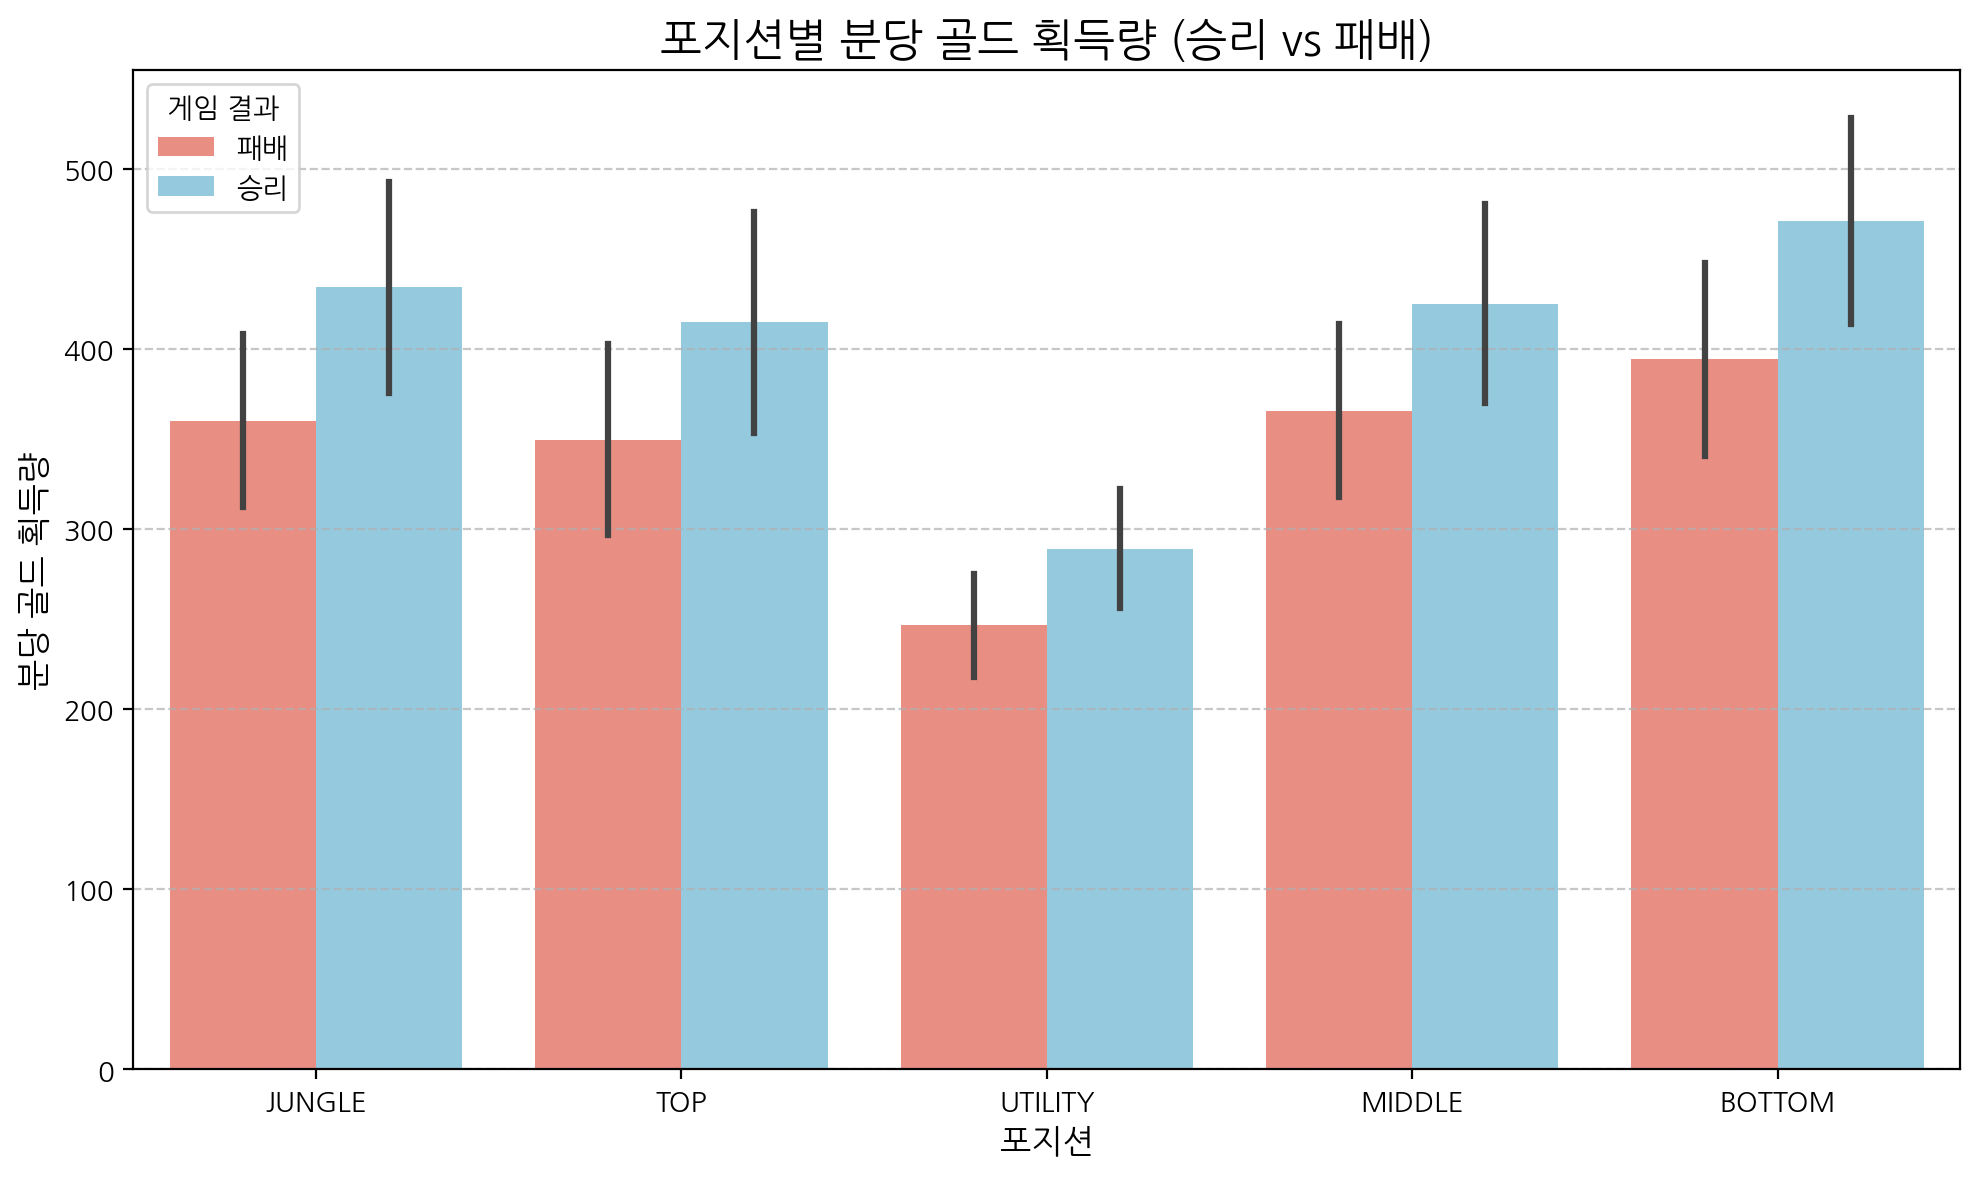

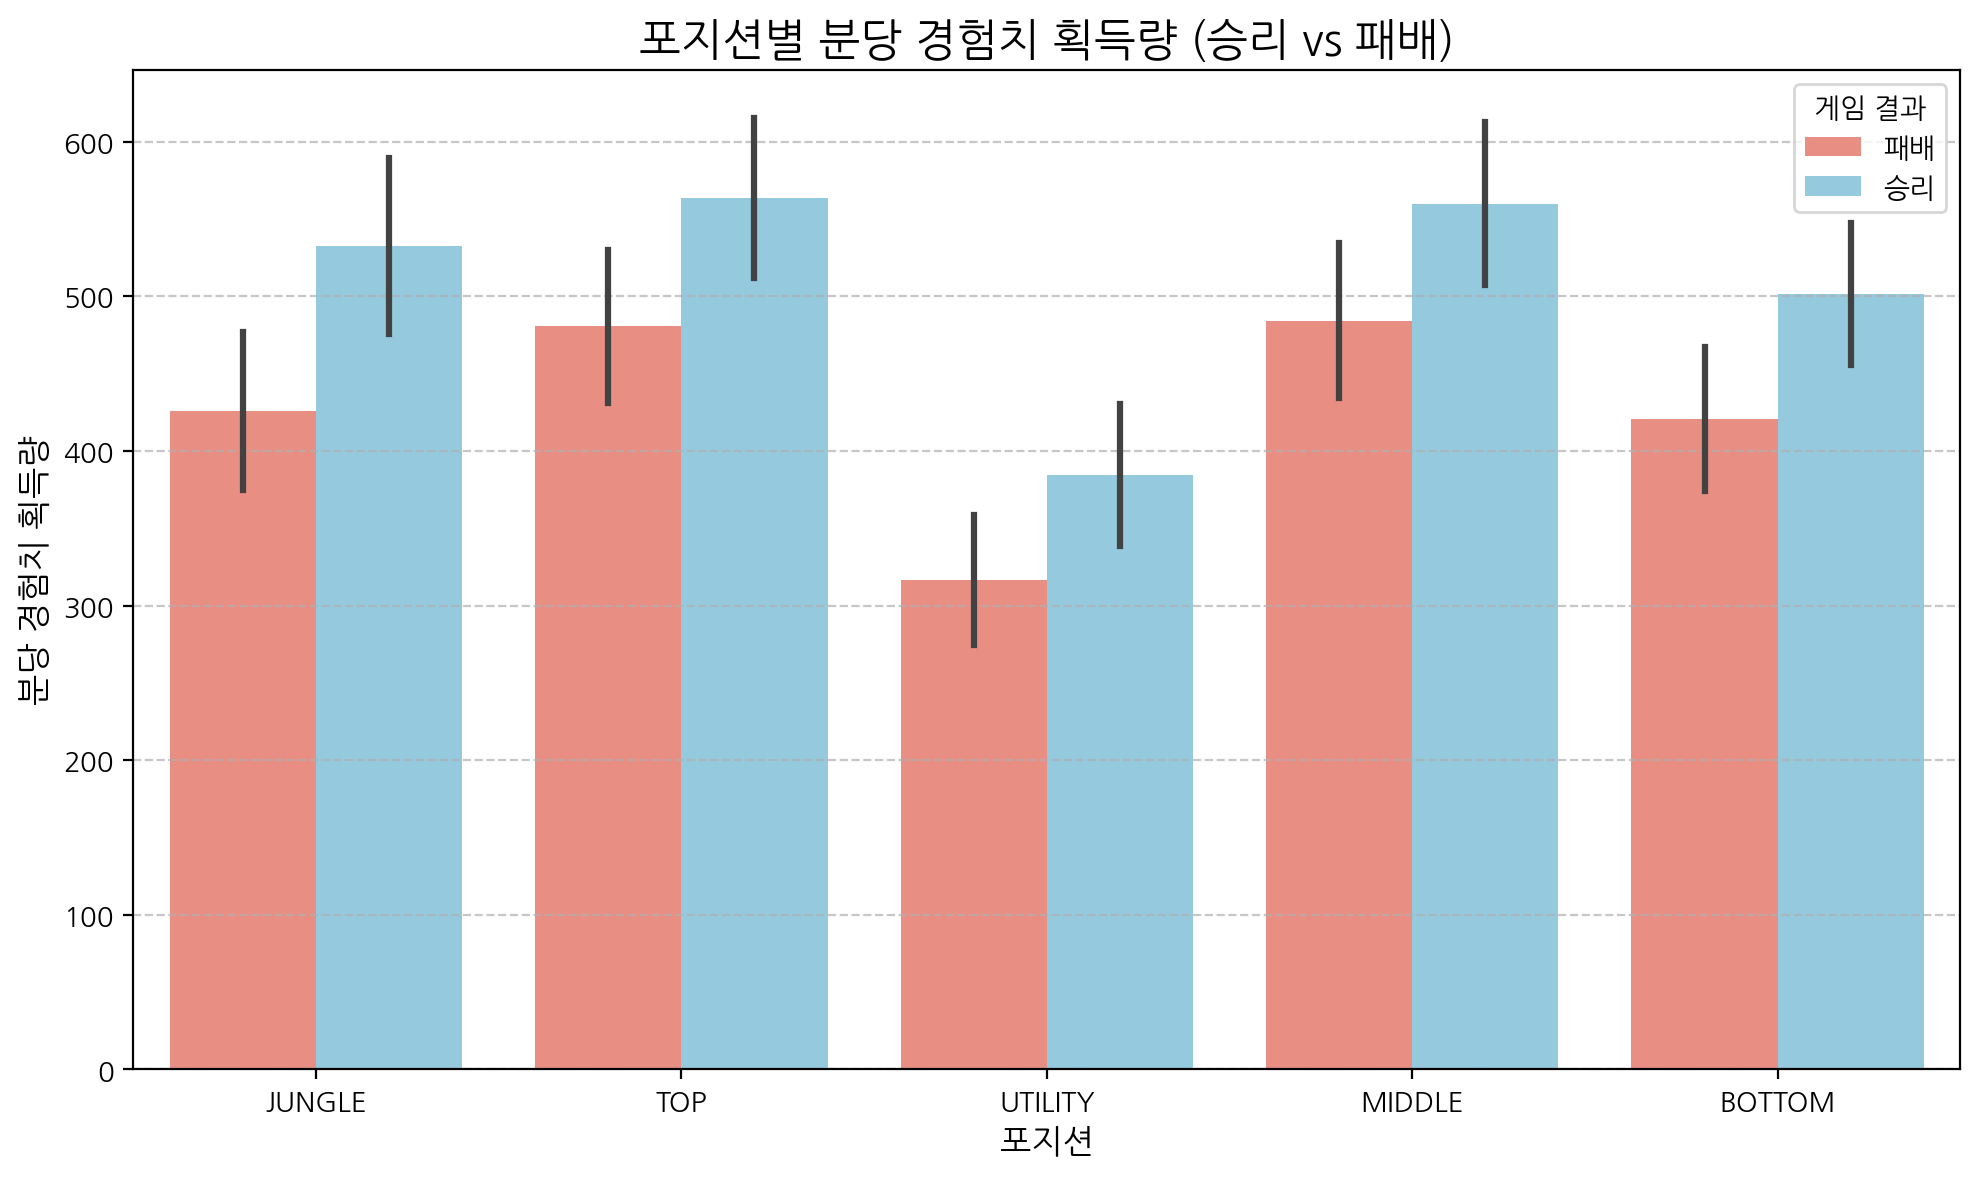

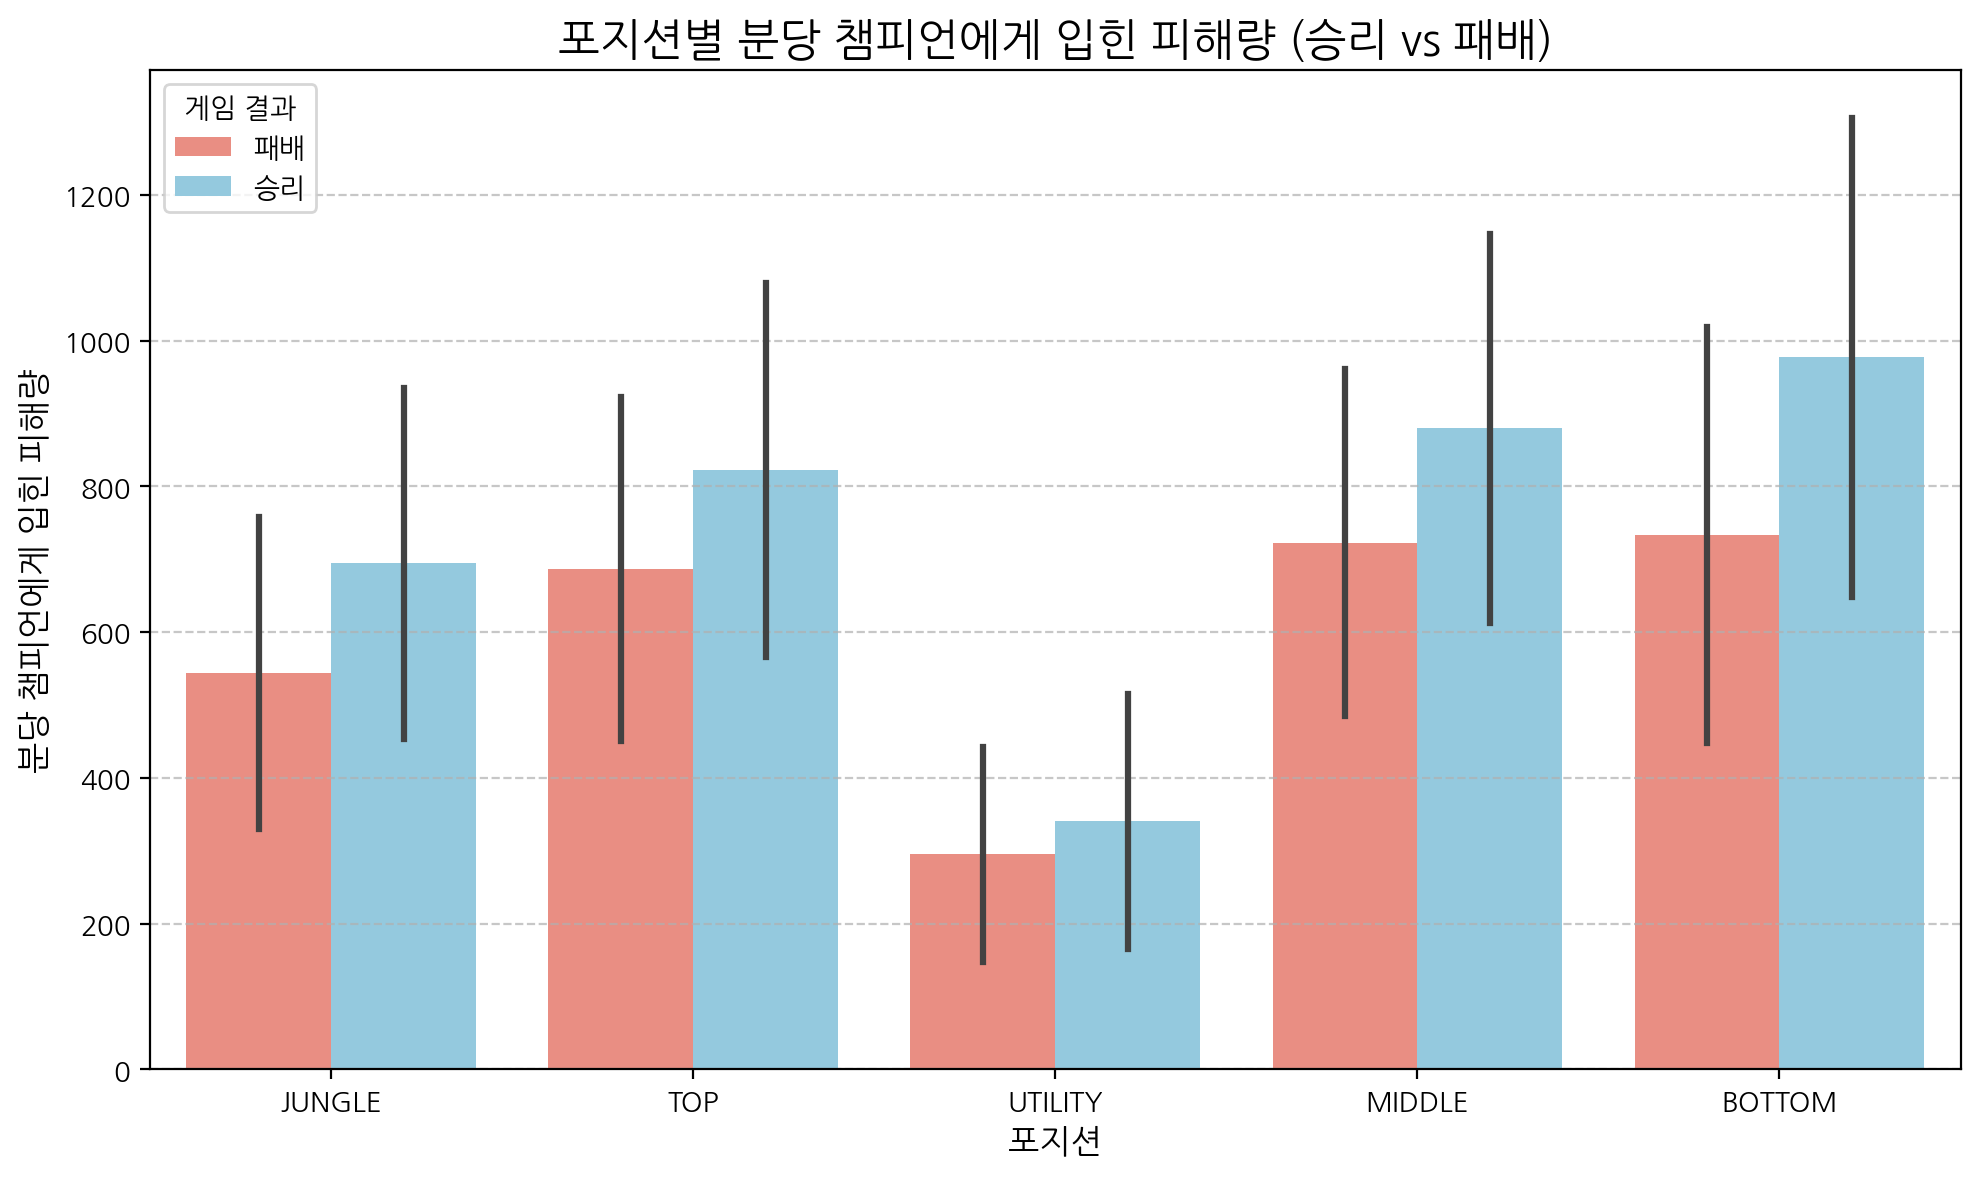

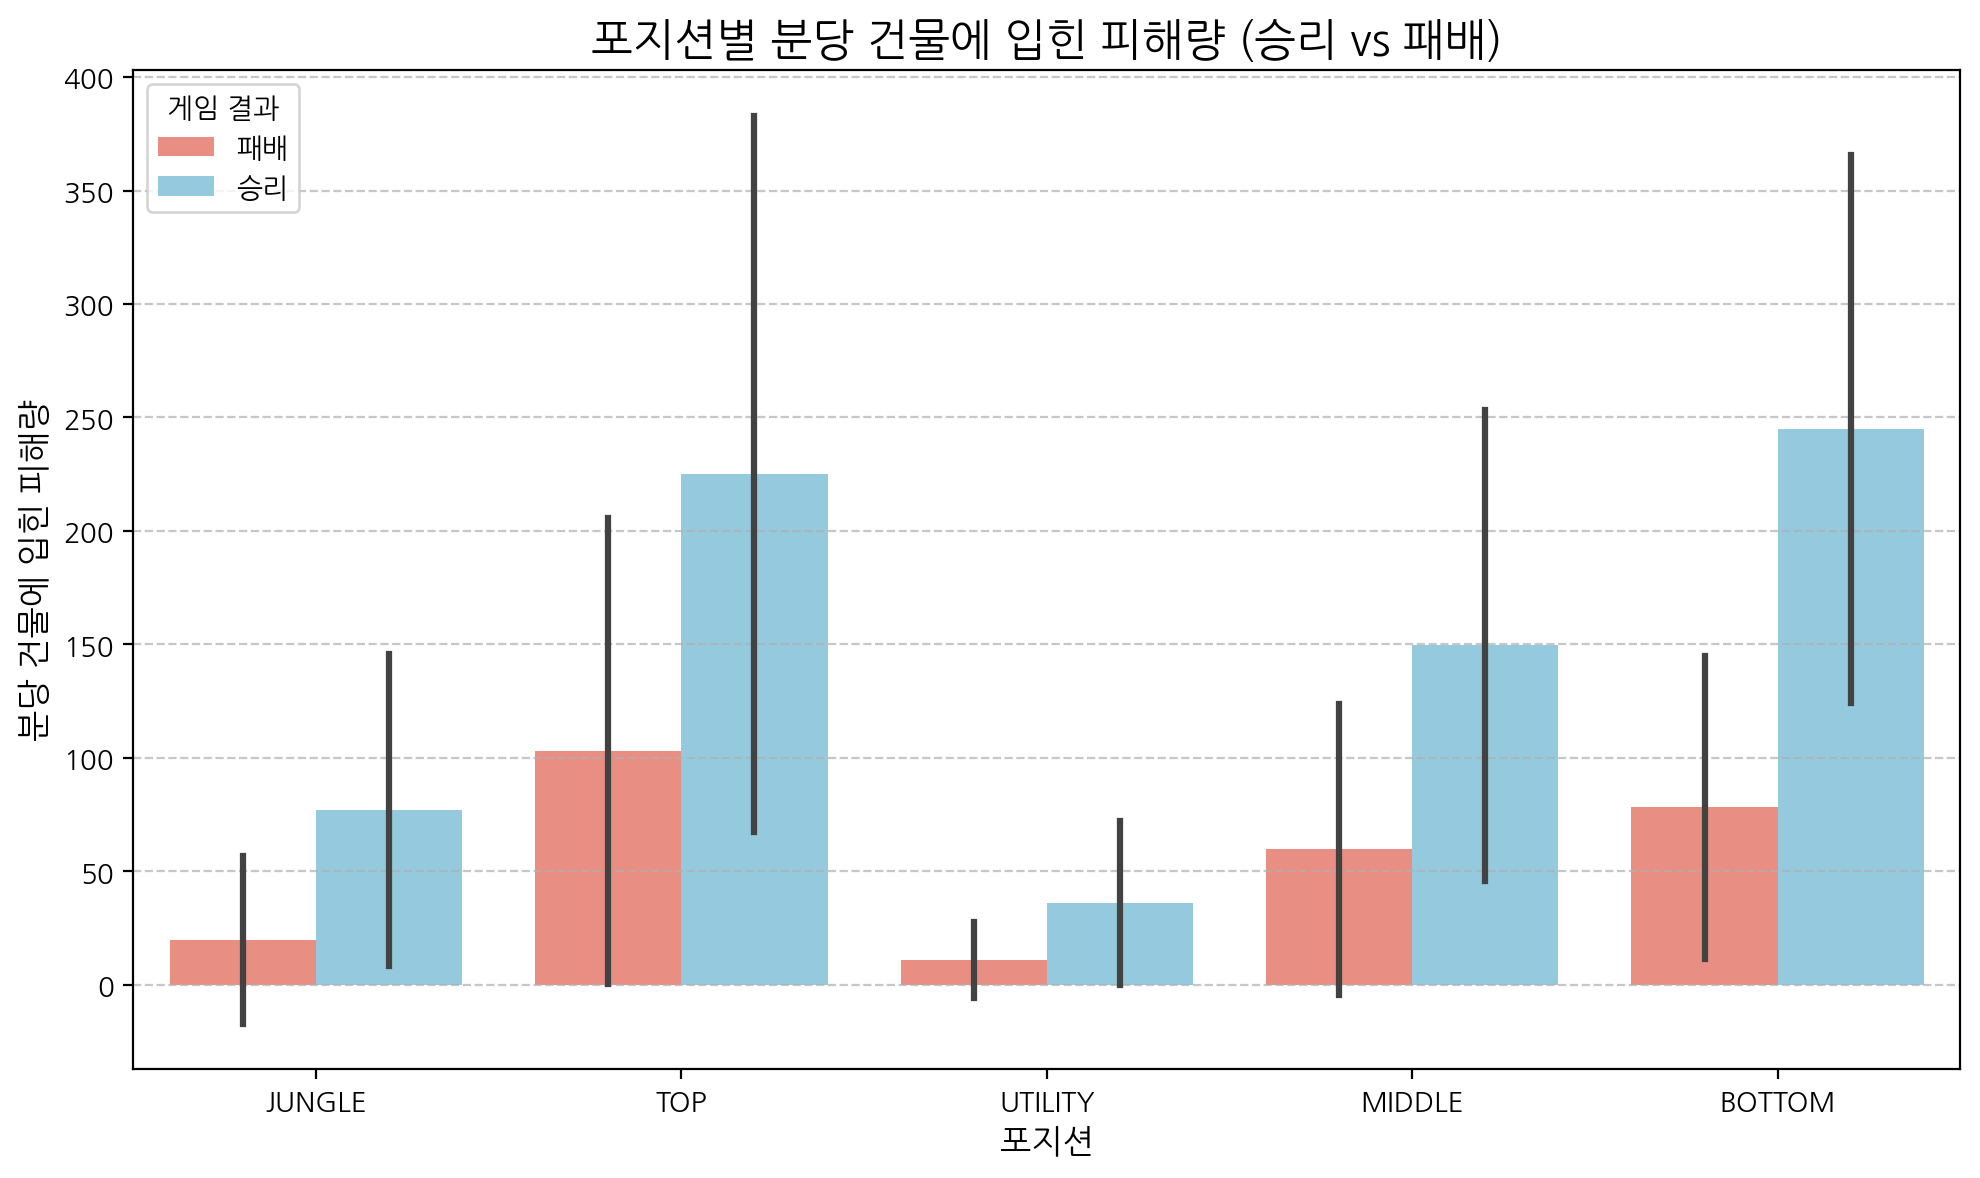

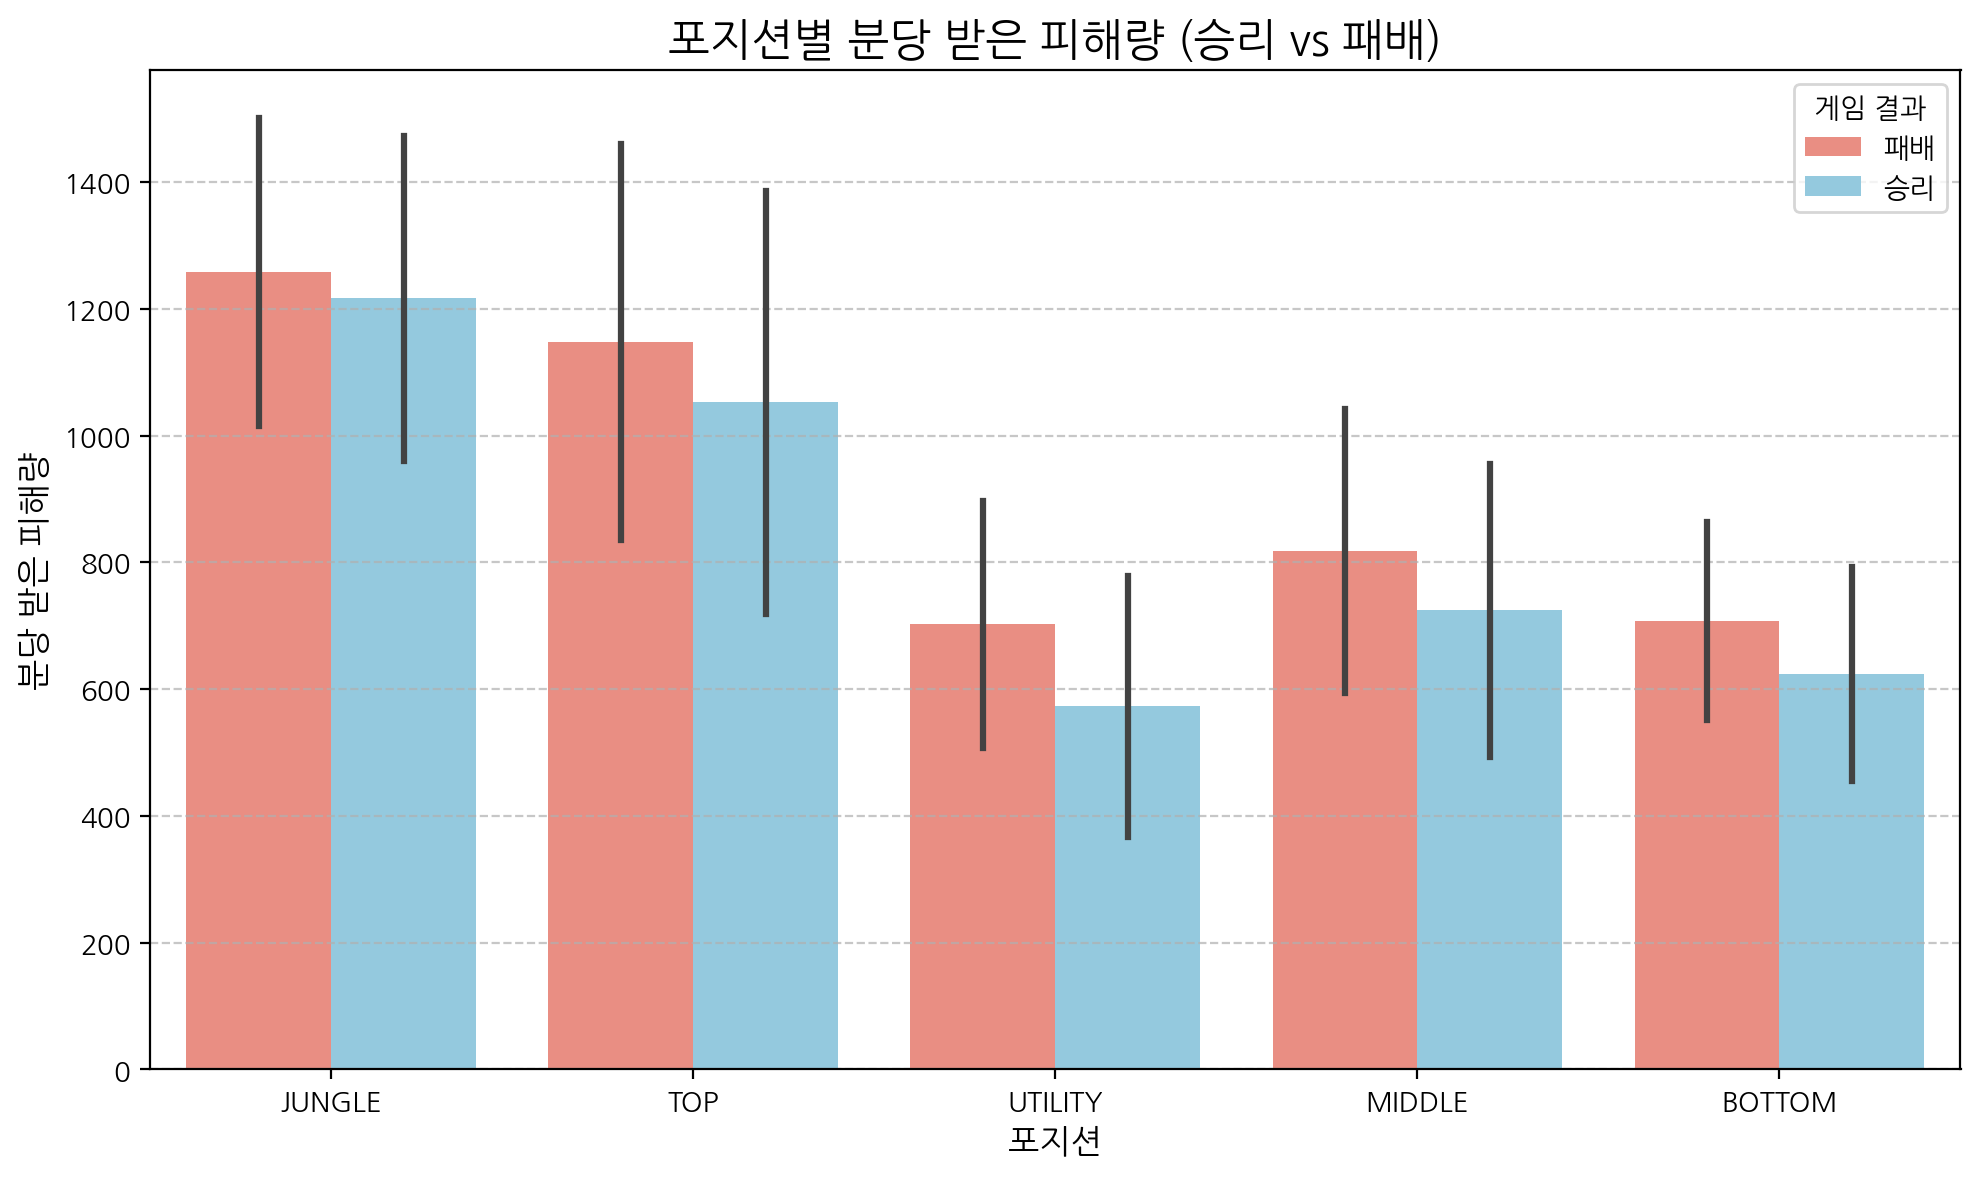

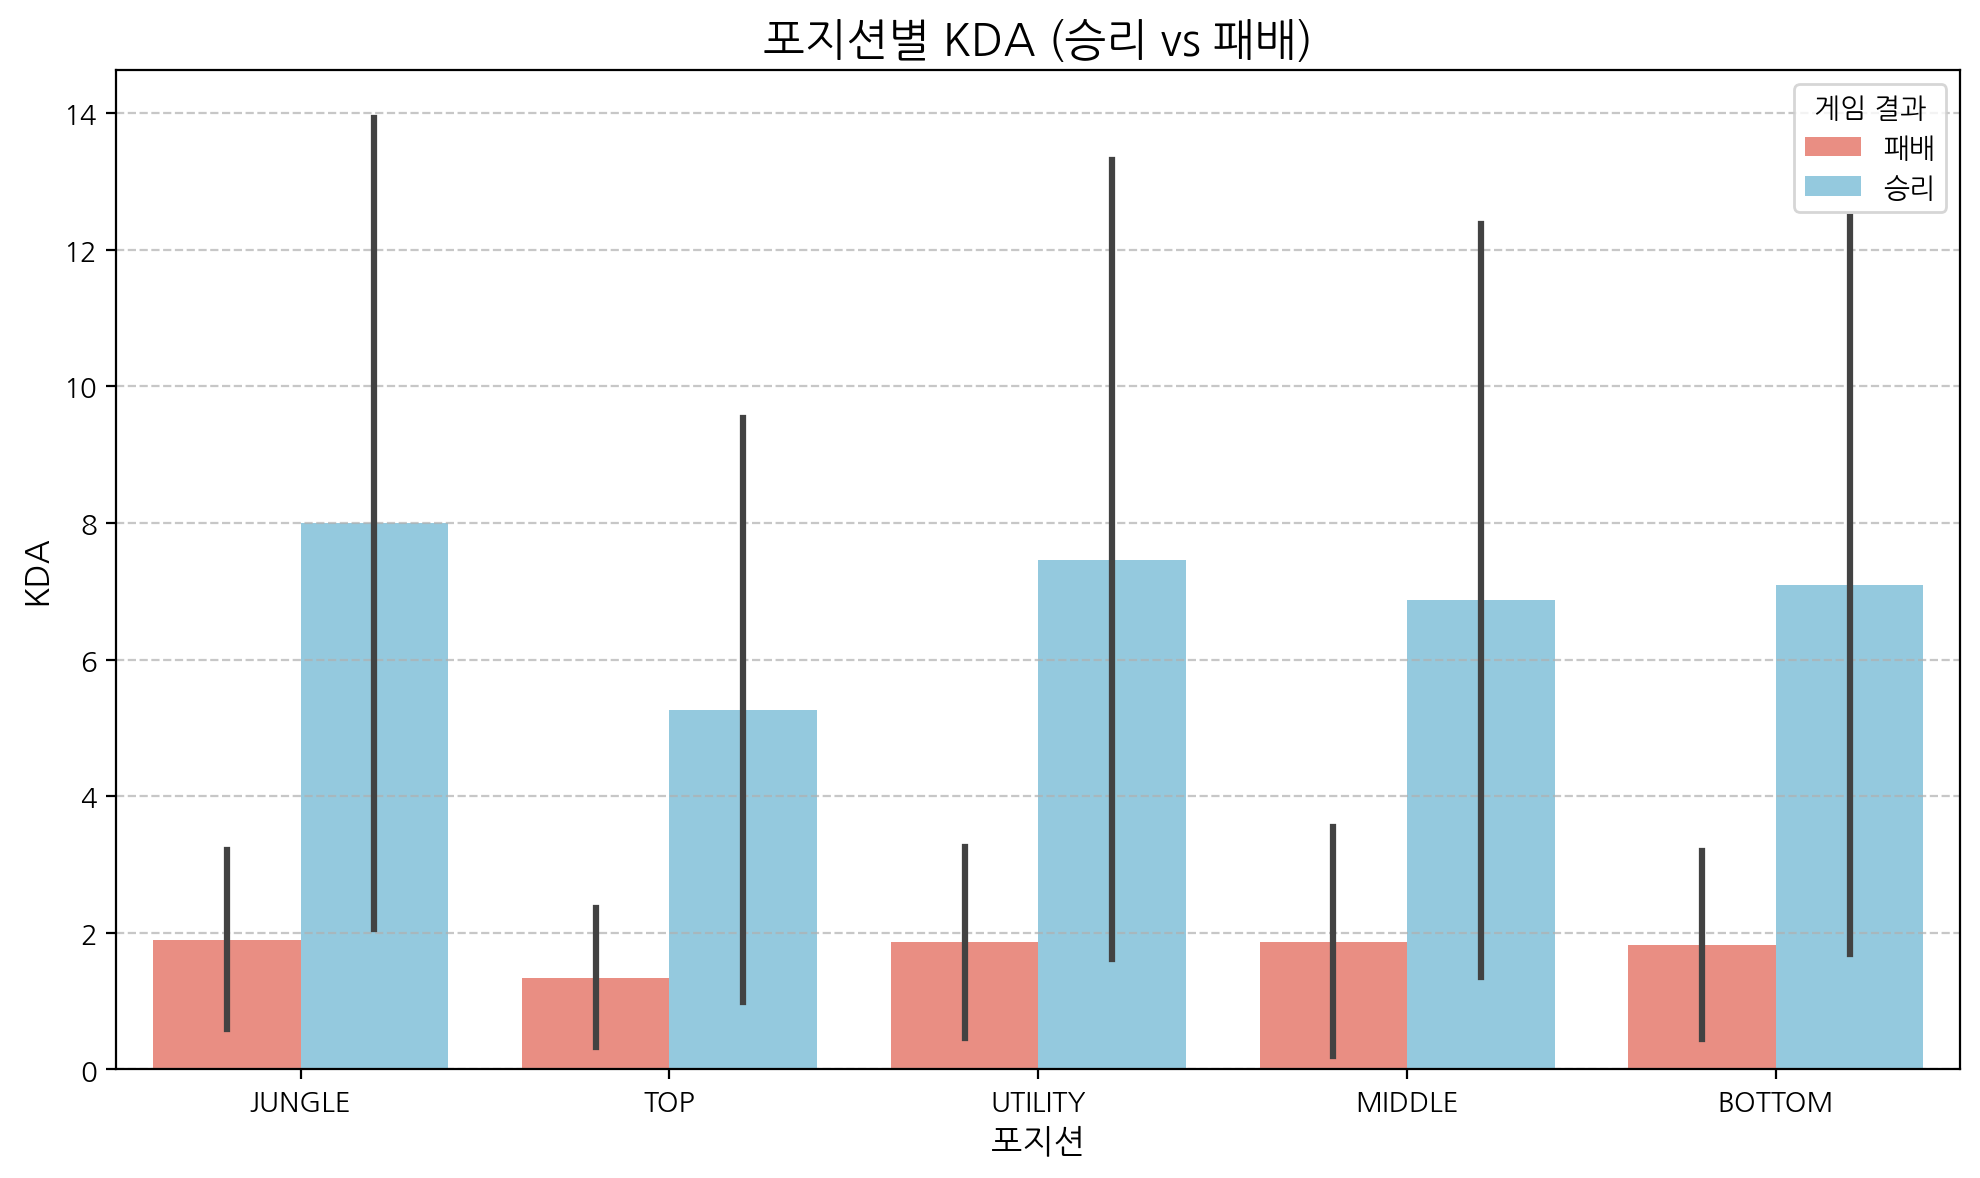

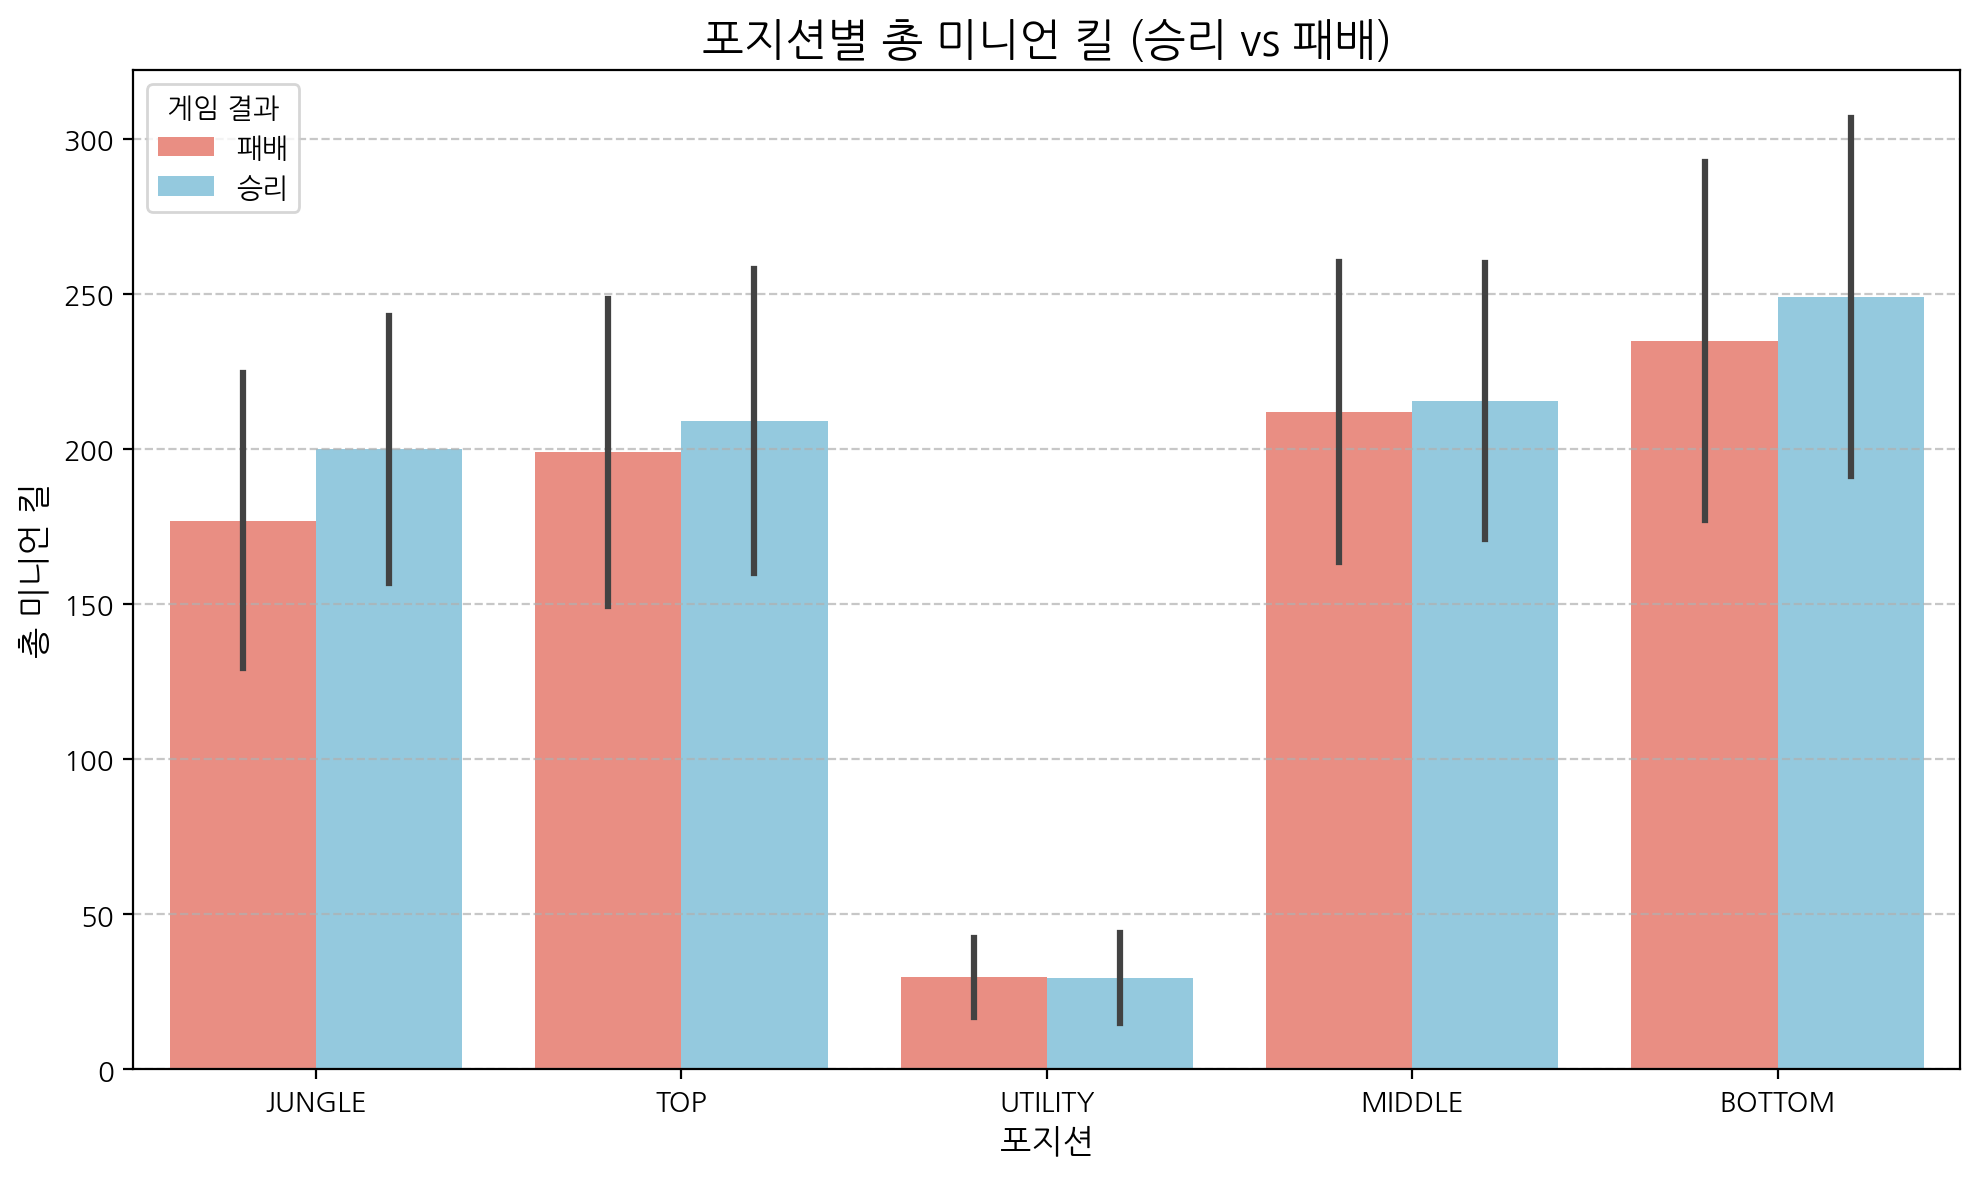

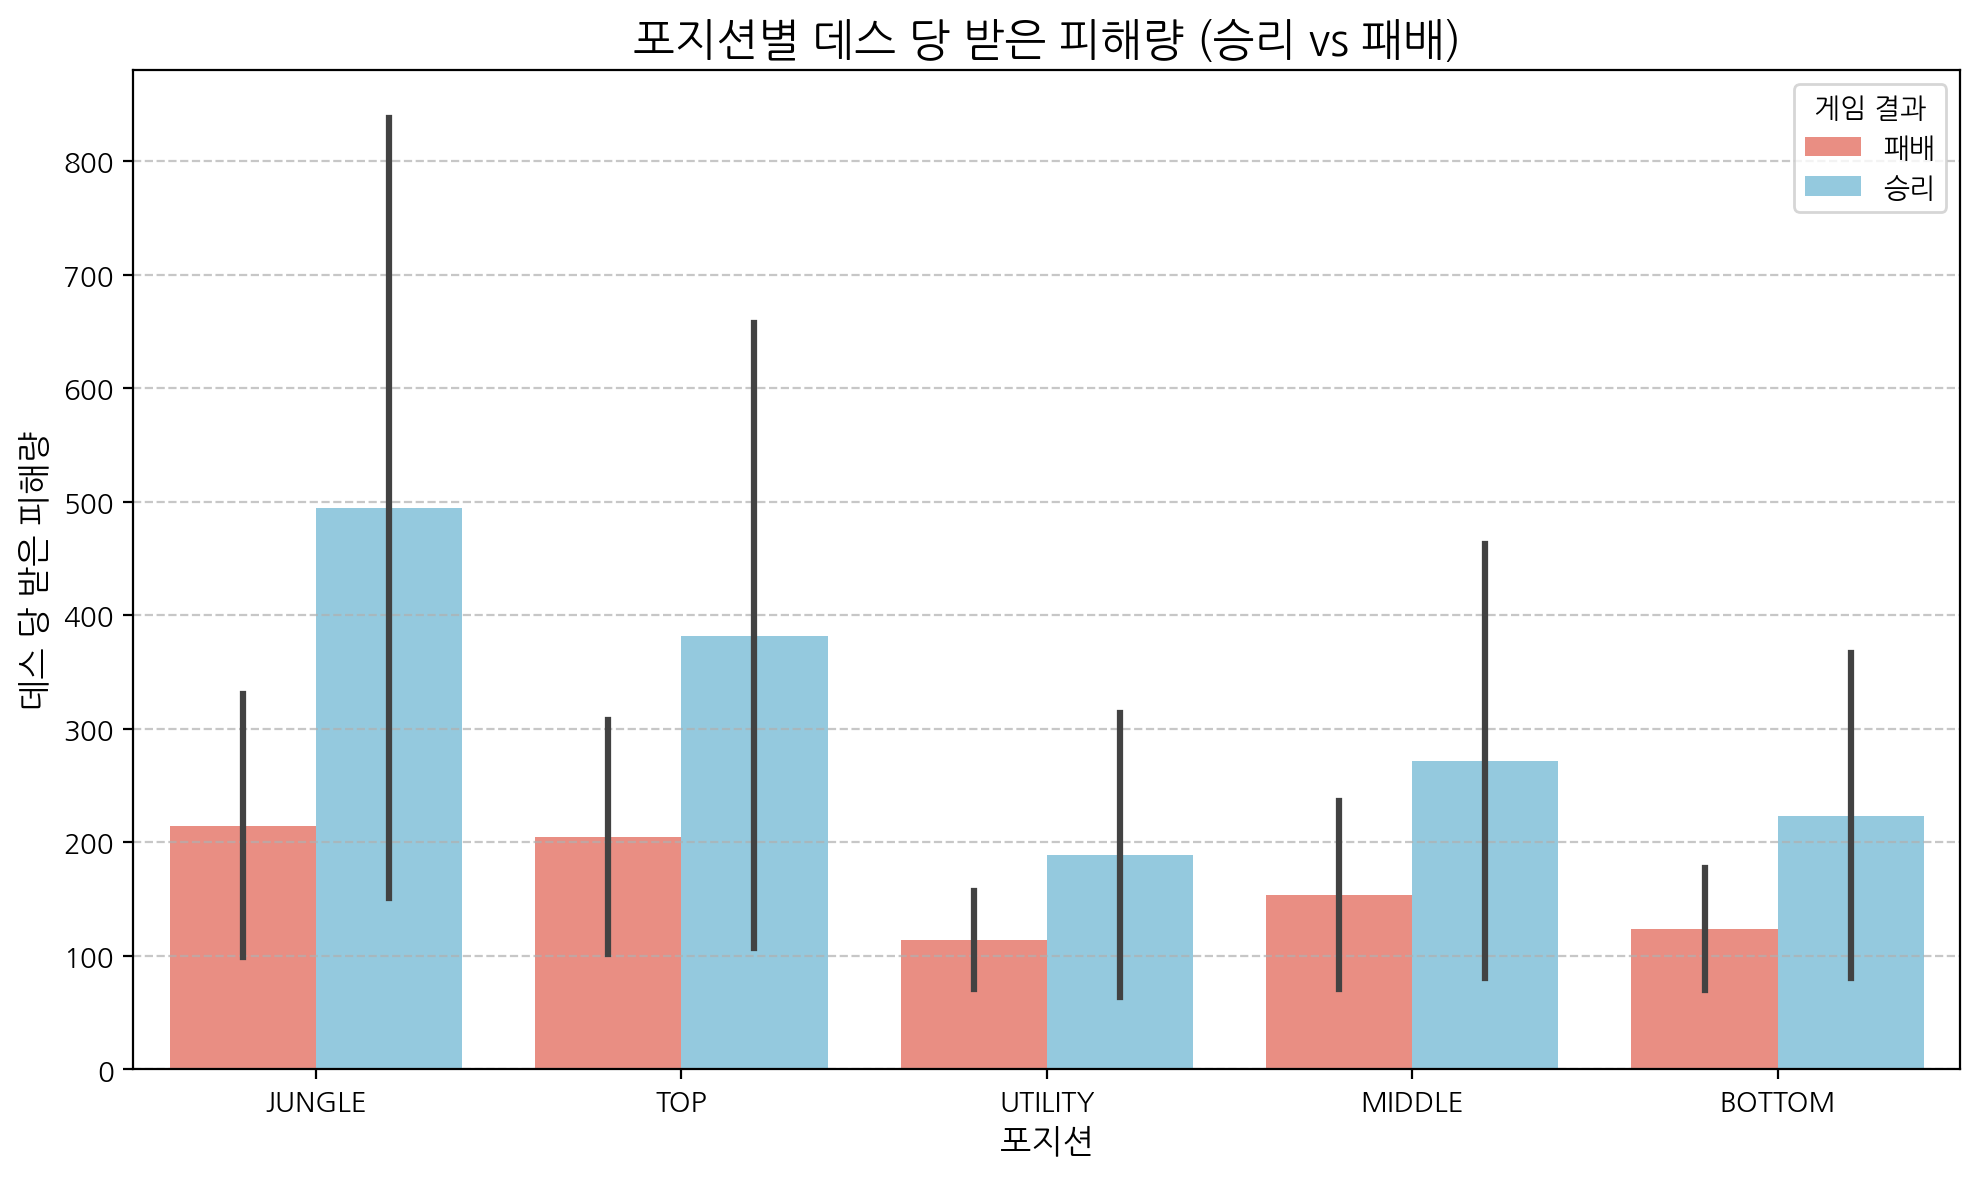

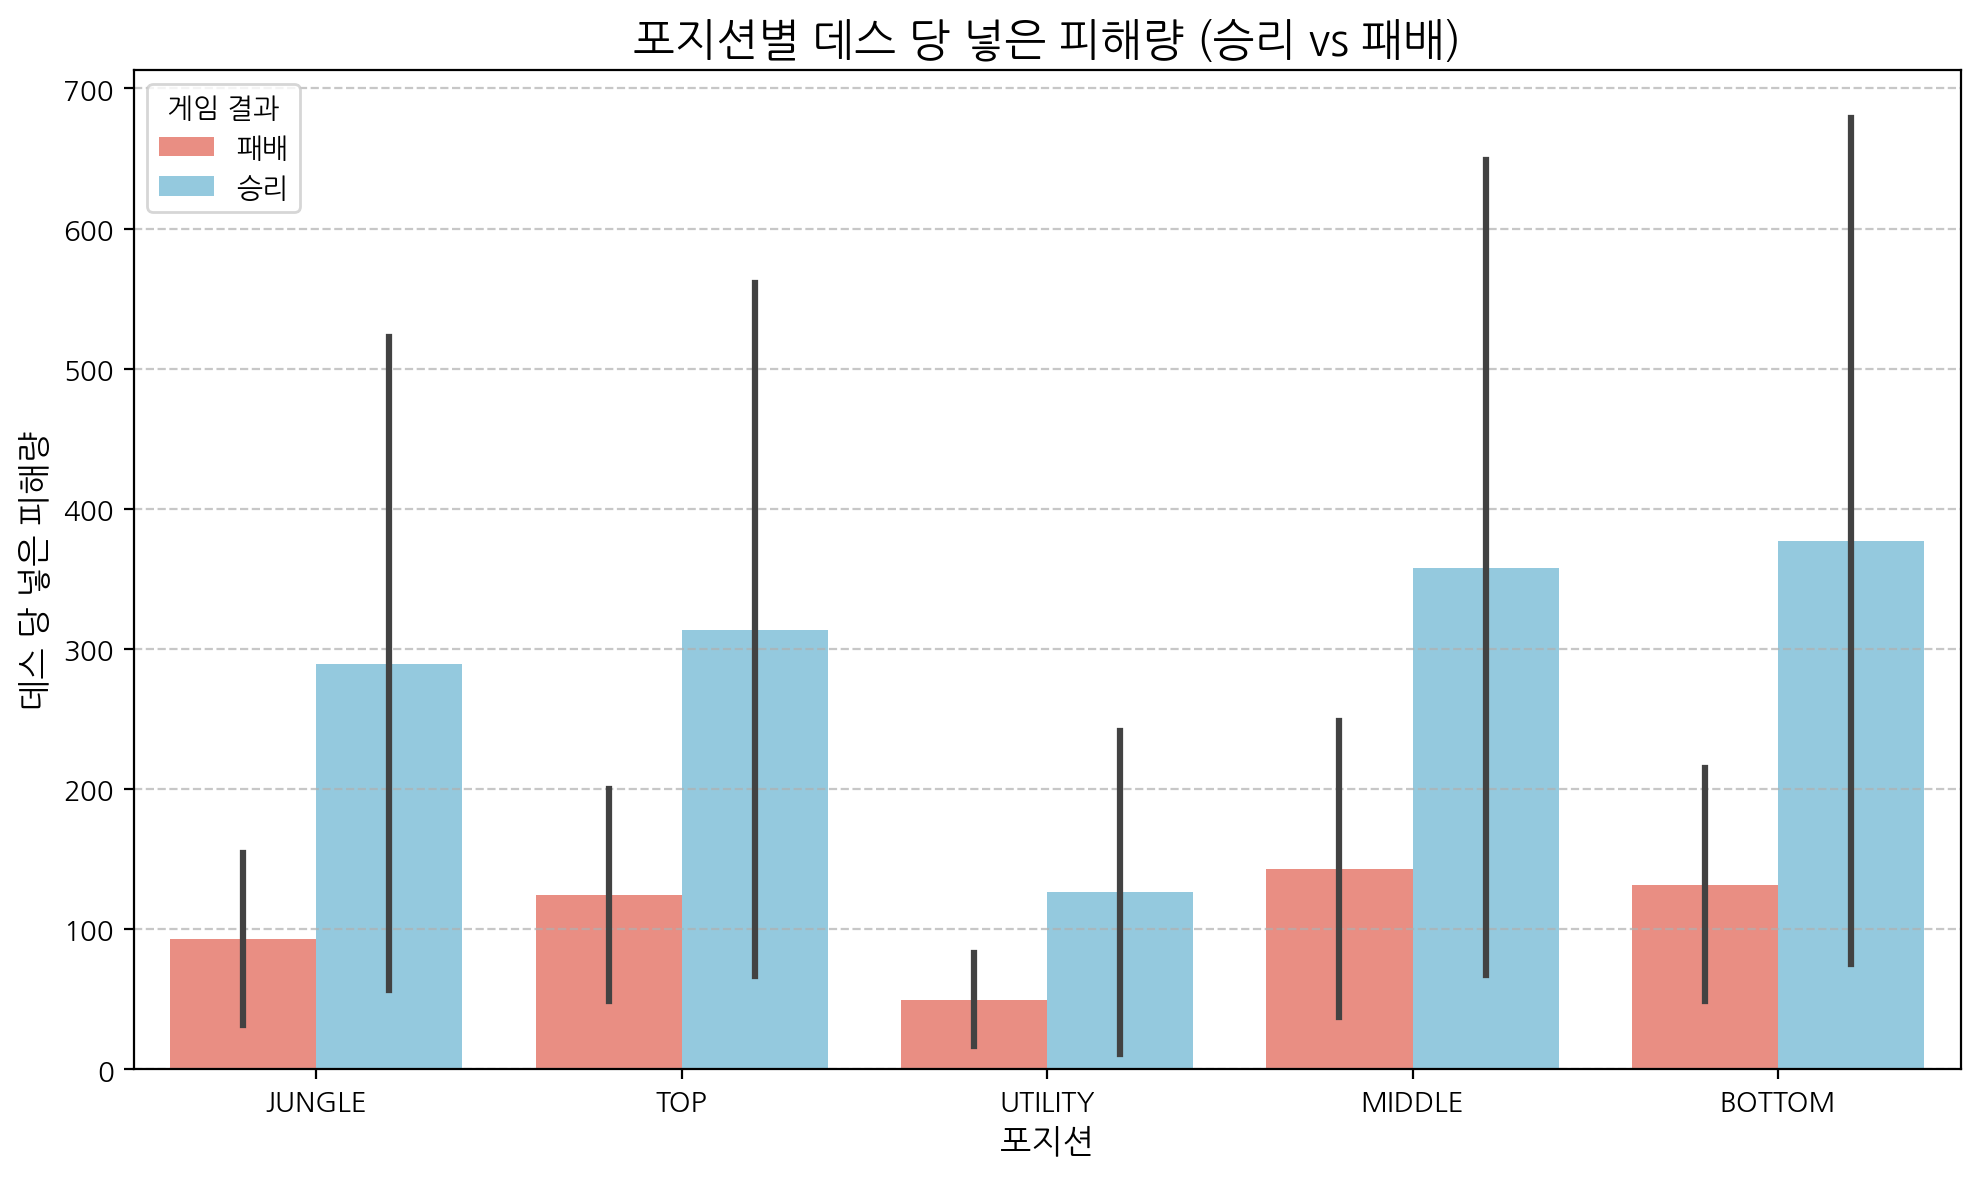

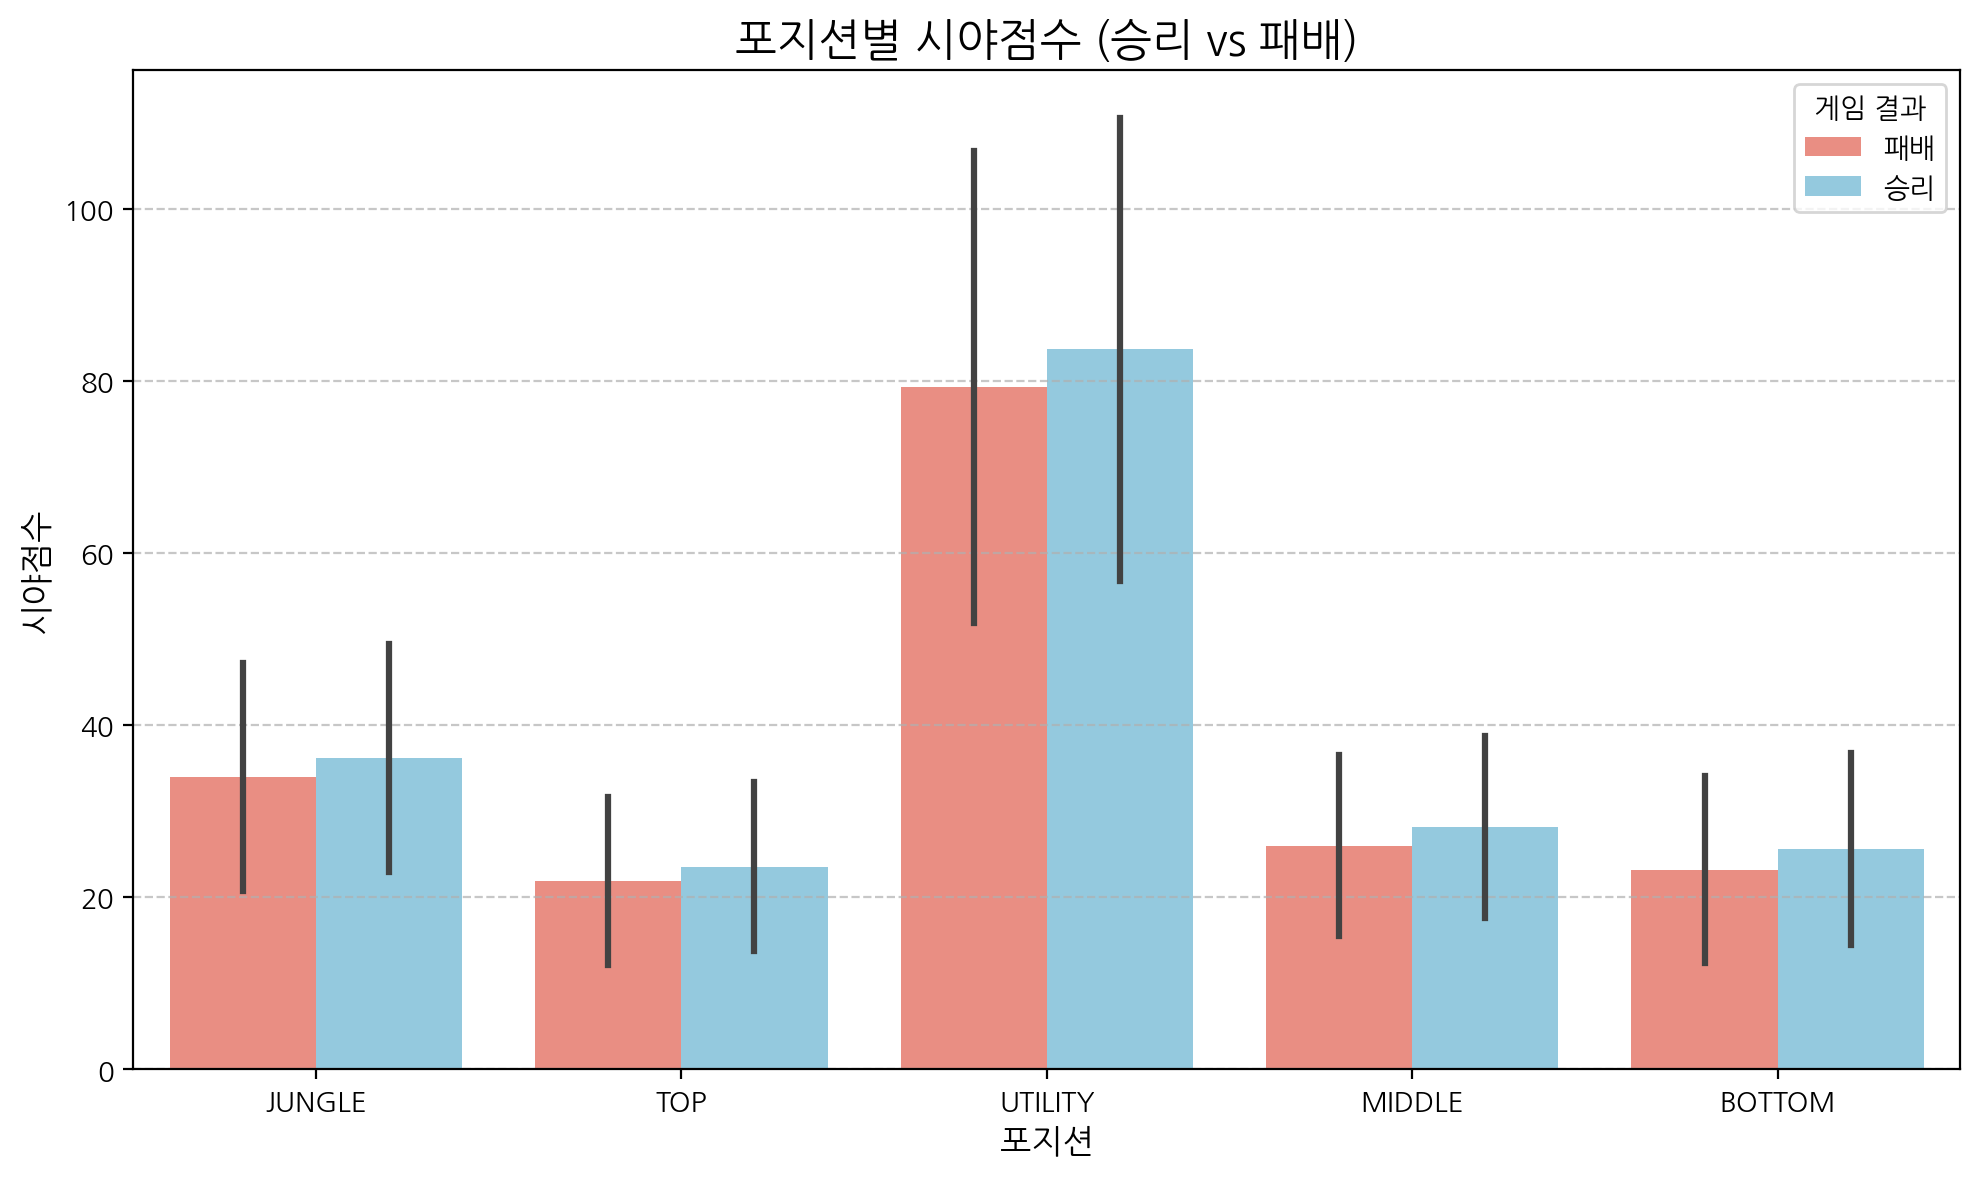

In [15]:
metrics_to_visualize = {
    'gold_earned': '분당 골드 획득량',
    'exp': '분당 경험치 획득량',
    'total_damage_dealt_to_champions': '분당 챔피언에게 입힌 피해량',
    'total_damage_dealt_to_buildings': '분당 건물에 입힌 피해량',
    'total_damage_taken': '분당 받은 피해량',
    'KDA': 'KDA',
    'total_minions_killed': '총 미니언 킬',
    'damage_taken_per_death': '데스 당 받은 피해량',
    'damage_dealt_per_death': '데스 당 넣은 피해량',
    'vision_score': '시야점수'
}

# game_result 값을 문자열로 변환하여 시각화 시 범례를 명확하게 표시
mmr_df_cleaned_default['game_result_label'] = mmr_df_cleaned_default['game_result'].map({1: '승리', 0: '패배'})

print("## 포지션별 승패에 따른 지표 차이 시각화")

# 각 지표에 대해 시각화 수행
for metric_col, metric_name in metrics_to_visualize.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=mmr_df_cleaned_default,
        x='team_position', # 'position' 대신 'team_position' 사용
        y=metric_col,
        hue='game_result_label',
        palette={'승리': 'skyblue', '패배': 'salmon'}, # 승패 색상 설정
        errorbar='sd' # 표준 편차를 오차 막대로 표시
    )
    plt.title(f'포지션별 {metric_name} (승리 vs 패배)', fontsize=16)
    plt.xlabel('포지션', fontsize=12)
    plt.ylabel(metric_name, fontsize=12)
    plt.legend(title='게임 결과')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
    plt.show()

# game_impact 선정

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = [
    'gold_earned',
    'exp',
    'total_damage_dealt_to_champions',
    'total_damage_dealt_to_buildings',
    'total_damage_taken',
    'KDA',
    'total_minions_killed',
    'damage_taken_per_death',
    'damage_dealt_per_death',
    'vision_score' # 시야 점수 추가
]

# 모델 학습에 사용할 X (독립 변수)와 y (종속 변수) 정의
X = mmr_df_cleaned_default[features]
y = mmr_df_cleaned_default['game_result'] # 승리(1) 또는 패배(0)

# 상수항 추가 (statsmodels 회귀 모델에서 절편을 포함하기 위함)
X_const = sm.add_constant(X)

print(f"--- 모델 학습에 사용될 피처 ({len(features)}개): ---")
for feature in features:
    print(f"- {feature}")
print("-" * 50)

# VIF 계산 함수 (다중 공선성 확인)
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

print("--- 선택된 피처들의 VIF (다중 공선성) 결과: ---")
vif_results = calculate_vif(X_const)
print(vif_results)
print("\n* VIF 해석:")
print("  - VIF가 10 이상이면 다중 공선성이 높다고 판단하며, 5 이상도 주의 깊게 볼 수 있습니다.")
print("  - 다중 공선성이 높으면 회귀 계수의 안정성이 떨어지고 부호가 상식과 다르게 나올 수 있습니다.")
print("  - 해결책: VIF가 높은 변수 중 하나를 제거하거나, 두 변수를 조합한 새로운 변수를 생성할 수 있습니다.")
print("-" * 50)

# --- 3. 모델 학습 및 평가 자동화 스크립트 ---

# 로지스틱 회귀 모델 학습
# game_result가 0 또는 1이므로 로지스틱 회귀가 적합합니다.
# 각 변수의 계수가 곧 승리에 미치는 '영향력'으로 해석될 수 있습니다.
print("--- 로지스틱 회귀 모델 학습 시작 ---")
logit_model = sm.Logit(y, X_const)
result = logit_model.fit()
print("--- 로지스틱 회귀 모델 학습 완료 ---")

print("\n### 로지스틱 회귀 모델 요약 (Summary): ###")
print(result.summary())
print("-" * 50)

# 모델의 계수(coefficients)가 각 변수의 game_impact로 사용될 수 있습니다.
# 계수의 부호와 크기를 통해 변수의 영향력을 파악합니다.
game_impact_coefficients = result.params.drop('const') # 상수항 제외

print("\n### 로지스틱 회귀 모델 기반 game_impact (계수): ###")
print(game_impact_coefficients.sort_values(ascending=False))
print("\n* 계수(Coefficient) 해석:")
print("  - 계수가 양수이면 해당 변수가 증가할수록 승리할 확률(로그 오즈)이 높아집니다.")
print("  - 계수가 음수이면 해당 변수가 증가할수록 승리할 확률(로그 오즈)이 낮아집니다.")
print("  - 계수의 절대값이 클수록 승리에 미치는 영향력이 크다고 볼 수 있습니다.")
print("  - 'total_damage_taken'과 같이 상식적으로 음의 영향을 미쳐야 하는 지표의 계수가 양수로 나온다면,")
print("    이는 다중 공선성, 데이터의 특성, 또는 다른 변수와의 복합적인 관계 때문일 수 있습니다.")
print("    (예: 데미지를 많이 받았지만, 그만큼 어그로를 끌어 팀 승리에 기여했을 수도 있음)")
print("-" * 50)

# 모델 기반 game_impact 점수 계산
# 각 플레이어의 game_impact 점수는 모델이 예측한 승리 확률(또는 로그 오즈)을 사용할 수 있습니다.
# 여기서는 각 플레이어의 피처 값에 계수를 곱하여 합산하는 방식으로 game_impact를 계산합니다.
# 이는 모델이 예측하는 '선형 결합' 부분과 유사합니다.
mmr_df_cleaned_default['game_impact_model_based'] = np.dot(X, game_impact_coefficients.values)

print("\n### 모델 기반 game_impact 점수 계산 결과: ###")
print(mmr_df_cleaned_default[['game_id', 'player_id', 'game_result', 'game_impact_model_based']].head())
print("\n* 모델 기반 game_impact 점수 해석:")
print("  - 이 점수가 높을수록 모델은 해당 플레이어가 승리에 더 크게 기여했다고 판단합니다.")
print("  - 이 점수를 활용하여 MMR을 할당하는 데 사용할 수 있습니다.")
print("-" * 50)



--- 모델 학습에 사용될 피처 (10개): ---
- gold_earned
- exp
- total_damage_dealt_to_champions
- total_damage_dealt_to_buildings
- total_damage_taken
- KDA
- total_minions_killed
- damage_taken_per_death
- damage_dealt_per_death
- vision_score
--------------------------------------------------
--- 선택된 피처들의 VIF (다중 공선성) 결과: ---
                            feature        VIF
0                             const  81.386028
9            damage_dealt_per_death   6.449345
1                       gold_earned   5.021637
6                               KDA   4.453712
8            damage_taken_per_death   4.332167
3   total_damage_dealt_to_champions   3.555133
7              total_minions_killed   3.179413
2                               exp   3.077611
5                total_damage_taken   1.950879
4   total_damage_dealt_to_buildings   1.772076
10                     vision_score   1.758475

* VIF 해석:
  - VIF가 10 이상이면 다중 공선성이 높다고 판단하며, 5 이상도 주의 깊게 볼 수 있습니다.
  - 다중 공선성이 높으면 회귀 계수의 안정성이 떨어지고 부호가 상식과 다르게 나올 수 있

## 회귀 분석

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 사용할 feature 목록
features = [
    'champions_killed', 'num_deaths', 'assists', 'vision_score', 
    'total_minions_killed', 
    'gold_earned',
    'exp',
    'total_damage_dealt_to_champions',
    'total_damage_dealt_to_buildings',
    'total_damage_taken'
]

# NaN 값 제거
mmr_df_cleaned = mmr_df_cleaned_default.dropna(subset=features + ['game_result', 'team_position'])
print(f"NAN 처리 후 데이터 크기: {len(mmr_df_cleaned)} row\n")

# 포지션별 승패 분석
unique_positions = mmr_df_cleaned['team_position'].unique()
print("--- 포지션별 승패 분석 ---")

for position in unique_positions:
    print(f"\n### 포지션: {position} ###")
    
    # 해당 포지션 데이터 필터링
    position_df = mmr_df_cleaned[mmr_df_cleaned['team_position'] == position]
    
    if len(position_df) < 2:
        print(f"데이터 부족으로 분석 불가 ({len(position_df)} row).")
        continue
    
    # 특성(X)과 목표(y) 분리
    X = position_df[features]
    y = position_df['game_result']
    
    # 표준화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 로지스틱 회귀 모델 학습
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_scaled, y)
    
    # 계수 추출
    coefficients = model.coef_[0]
    feature_importance = pd.DataFrame({
        'feature': features,
        'coefficient': coefficients
    }).sort_values(by='coefficient', ascending=False)
    
    # 주요 긍정적 영향 요인 출력
    print("승리에 긍정적 영향을 미치는 주요 컬럼 (계수 기준 내림차순 상위 5개):")
    print(feature_importance.head(5).to_string(index=False))
    
    # 주요 부정적 영향 요인 출력
    print("\n승리에 부정적 영향을 미치는 주요 컬럼 (계수 기준 오름차순 하위 5개):")
    print(feature_importance.tail(5).sort_values(by='coefficient', ascending=True).to_string(index=False))
    
    print("-" * 50)

print("\n분석 완료: 포지션별 승패에 큰 영향을 미치는 컬럼을 계수를 통해 정량적으로 제시하였습니다.")
print("계수가 클수록 승리에 긍정적/부정적 영향을 크게 준다고 해석할 수 있습니다.")


NAN 처리 후 데이터 크기: 17680 row

--- 포지션별 승패 분석 ---

### 포지션: JUNGLE ###
승리에 긍정적 영향을 미치는 주요 컬럼 (계수 기준 내림차순 상위 5개):
                        feature  coefficient
                            exp     2.964131
                        assists     1.380671
total_damage_dealt_to_buildings     0.795679
               champions_killed     0.666343
                   vision_score     0.180495

승리에 부정적 영향을 미치는 주요 컬럼 (계수 기준 오름차순 하위 5개):
                        feature  coefficient
           total_minions_killed    -1.203590
total_damage_dealt_to_champions    -1.021172
                     num_deaths    -0.912611
             total_damage_taken    -0.120147
                    gold_earned     0.012782
--------------------------------------------------

### 포지션: TOP ###
승리에 긍정적 영향을 미치는 주요 컬럼 (계수 기준 내림차순 상위 5개):
                        feature  coefficient
                            exp     2.171344
                        assists     1.499993
total_damage_dealt_to_buildings     1.101623
               c

## 랜포 기반 피처 중요도

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# --- 2. 모델링에 사용할 피처 정의 (vision_score 포함) ---
features = [
    'gold_earned',
    'exp',
    'total_damage_dealt_to_champions',
    'total_damage_dealt_to_buildings',
    'total_damage_taken',
    'KDA',
    'total_minions_killed',
    'damage_taken_per_death',
    'damage_dealt_per_death',
    'vision_score' # 시야 점수 추가
]

# 포지션 컬럼 확인
if 'team_position' not in mmr_df_cleaned_default.columns:
    print("오류: 'team_position' 컬럼이 데이터프레임에 존재하지 않습니다.")
    print("랜덤 포레스트 모델링을 위해 'team_position' 컬럼이 필요합니다. 데이터 로드 부분을 확인해주세요.")
else:
    # 모든 고유한 포지션 목록 가져오기
    positions = mmr_df_cleaned_default['team_position'].unique()

    print(f"--- 모델 학습에 사용될 피처 ({len(features)}개): ---")
    for feature in features:
        print(f"- {feature}")
    print("-" * 50)

    print("## 포지션별 랜덤 포레스트 모델 학습 및 피처 중요도 분석 ##")

    for position in positions:
        print(f"\n### 포지션: {position} ###")

        # 해당 포지션 데이터 필터링
        position_df = mmr_df_cleaned_default[mmr_df_cleaned_default['team_position'] == position].copy()

        # 데이터가 충분한지 확인
        if len(position_df) < 100: # 최소 데이터 수 기준 (조정 가능)
            print(f"데이터 수가 부족하여 {position} 포지션에 대한 모델링을 건너뜁니다. (현재 {len(position_df)}개)")
            continue
        
        # 해당 포지션의 독립 변수(X)와 종속 변수(y) 정의
        # 선택된 features가 해당 position_df에 모두 존재하는지 확인
        current_features = [f for f in features if f in position_df.columns]
        
        X_pos = position_df[current_features]
        y_pos = position_df['game_result']

        # 학습 및 테스트 데이터 분할
        X_train, X_test, y_train, y_test = train_test_split(
            X_pos, y_pos, test_size=0.2, random_state=42, stratify=y_pos # stratify로 승패 비율 유지
        )

        # 데이터 스케일링 (랜덤 포레스트는 스케일링에 덜 민감하지만, 좋은 습관입니다.)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # 랜덤 포레스트 분류 모델 학습
        # n_estimators: 트리의 개수 (더 많으면 일반적으로 성능 향상, 계산 시간 증가)
        # class_weight='balanced': 클래스 불균형이 있을 경우 자동으로 가중치를 부여하여 처리
        rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', n_jobs=-1) # n_jobs=-1로 모든 코어 사용
        rf_model.fit(X_train_scaled, y_train)

        # 피처 중요도 추출
        rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X_pos.columns)

        print("랜덤 포레스트 피처 중요도 (내림차순):")
        print(rf_feature_importances.sort_values(ascending=False).head(10)) # 상위 10개만 출력

        # 모델 성능 평가 (선택 사항)
        y_pred = rf_model.predict(X_test_scaled)
        print("\n모델 성능:")
        print(f"정확도 (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
        print("분류 리포트 (Classification Report):\n", classification_report(y_test, y_pred))
        print("-" * 50)

    print("\n분석 완료: 각 포지션별 랜덤 포레스트 모델의 피처 중요도를 확인하였습니다.")
    print("피처 중요도는 해당 지표가 승패 예측에 얼마나 기여했는지를 나타냅니다.")

--- 모델 학습에 사용될 피처 (10개): ---
- gold_earned
- exp
- total_damage_dealt_to_champions
- total_damage_dealt_to_buildings
- total_damage_taken
- KDA
- total_minions_killed
- damage_taken_per_death
- damage_dealt_per_death
- vision_score
--------------------------------------------------
## 포지션별 랜덤 포레스트 모델 학습 및 피처 중요도 분석 ##

### 포지션: JUNGLE ###
랜덤 포레스트 피처 중요도 (내림차순):
KDA                                0.296321
exp                                0.218208
damage_dealt_per_death             0.126311
total_damage_dealt_to_buildings    0.093309
damage_taken_per_death             0.071988
gold_earned                        0.056634
total_minions_killed               0.048386
total_damage_dealt_to_champions    0.034542
vision_score                       0.028082
total_damage_taken                 0.026219
dtype: float64

모델 성능:
정확도 (Accuracy): 0.9003
분류 리포트 (Classification Report):
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       356
        

## 상관관계 기반

In [ ]:
    def compute_auto_weights(df, position_col, target_col, feature_cols, domain_boost=None):
        """
        포지션별 자동 가중치 계산 함수
        df: 데이터프레임
        position_col: 포지션 컬럼명 (ex. 'team_position')
        target_col: 타겟 컬럼명 (ex. 'game_result')
        feature_cols: 피처 리스트
        domain_boost: {포지션: {피처: 보너스 계수}} 형태의 dict
        """
        auto_weights = {}
        positions = df[position_col].unique()
        
        for pos in positions:
            pos_df = df[df[position_col] == pos]
            corr_values = {}
            
            for feat in feature_cols:
                if feat in pos_df.columns:
                    corr = pos_df[[feat, target_col]].corr().iloc[0,1]
                    if pd.isna(corr):
                        corr = 0
                    corr_values[feat] = abs(corr)
                else:
                    corr_values[feat] = 0
            
            # domain_boost 적용
            if domain_boost and pos in domain_boost:
                for feat, boost in domain_boost[pos].items():
                    if feat in corr_values:
                        corr_values[feat] *= boost
            
            # 정규화
            total = sum(corr_values.values())
            if total > 0:
                norm_weights = {feat: val / total for feat, val in corr_values.items()}
            else:
                norm_weights = corr_values # all zero case
            
            auto_weights[pos] = norm_weights
        
        return auto_weights


In [20]:
domain_boost = {
    'UTILITY': {'vision_score': 2, 'assists': 1.2},
    'JUNGLE': {'assists': 1.2, 'neutral_minions_killed': 1.2},
    'BOTTOM': {'total_damage_dealt_to_champions': 1.2, 'champions_killed': 1.2},
    'TOP': {'damage_taken_per_death': 1.2},
    'MIDDLE': {'total_damage_dealt_to_champions': 1.2}
}

feature_cols = [
    'gold_earned', 'exp', 'total_damage_dealt_to_champions',
    'total_damage_dealt_to_buildings', 'total_damage_taken', 'KDA',
    'total_minions_killed', 'damage_taken_per_death',
    'damage_dealt_per_death', 'vision_score', 'champions_killed',
    'num_deaths', 'assists', 'neutral_minions_killed'
]

weights = compute_auto_weights(mmr_df_cleaned_default, 'team_position', 'game_result', feature_cols, domain_boost)

# 확인
for pos, w in weights.items():
    print(f"\n포지션: {pos}")
    for feat, weight in sorted(w.items(), key=lambda x: x[1], reverse=True):
        print(f"  {feat}: {weight:.4f}")



포지션: JUNGLE
  exp: 0.1188
  assists: 0.1001
  KDA: 0.0980
  gold_earned: 0.0963
  num_deaths: 0.0945
  damage_dealt_per_death: 0.0848
  damage_taken_per_death: 0.0812
  total_damage_dealt_to_buildings: 0.0780
  champions_killed: 0.0690
  neutral_minions_killed: 0.0564
  total_damage_dealt_to_champions: 0.0531
  total_minions_killed: 0.0416
  total_damage_taken: 0.0141
  vision_score: 0.0140

포지션: TOP
  exp: 0.1238
  KDA: 0.1044
  gold_earned: 0.0970
  damage_taken_per_death: 0.0921
  num_deaths: 0.0905
  damage_dealt_per_death: 0.0899
  assists: 0.0879
  total_damage_dealt_to_buildings: 0.0815
  champions_killed: 0.0710
  total_damage_dealt_to_champions: 0.0519
  neutral_minions_killed: 0.0445
  total_damage_taken: 0.0287
  total_minions_killed: 0.0198
  vision_score: 0.0167

포지션: UTILITY
  assists: 0.1436
  exp: 0.1238
  gold_earned: 0.1153
  KDA: 0.1118
  num_deaths: 0.0952
  damage_dealt_per_death: 0.0838
  total_damage_dealt_to_buildings: 0.0829
  damage_taken_per_death: 0.0751
  

In [22]:


mmr_df_cleaned_default['game_impact'] = 0

for pos in weights:
    idx = mmr_df_cleaned_default['team_position'] == pos
    gi = 0
    for feat, w in weights[pos].items():
        gi += mmr_df_cleaned_default.loc[idx, feat] * w
    
    # 승리/패배에 따라 가중치 조정
    gi = gi * mmr_df_cleaned_default.loc[idx, 'game_result'].map({1: win_boost, 0: lose_boost})
    
    mmr_df_cleaned_default.loc[idx, 'game_impact'] = gi

NameError: name 'win_boost' is not defined

In [23]:
mmr_df_cleaned_default

,game_id,player_id,puuid,champion_id,game_date,team_position,champions_killed,num_deaths,assists,minions_killed,...,delete_yn,create_date,game_result,total_minions_killed,KDA,damage_taken_per_death,damage_dealt_per_death,game_result_label,game_impact_model_based,game_impact
0,1t_0530_0402,PLR_10,553a22e0-b2f0-5da2-aec6-6e7f95915f90,CHN_41,2025-05-30 4:02:00,JUNGLE,6,2,4,58,...,N,2025-05-30 04:46:36.535 +0900,0,240,5.00,461.54,344.90,패배,9.209909,0
1,1t_0530_0402,PLR_203,0ddd0ebe-580d-5844-8084-6fb20f3405c7,CHN_99,2025-05-30 4:02:00,TOP,0,3,5,187,...,N,2025-05-30 04:46:36.535 +0900,0,187,1.67,356.06,217.43,패배,6.805161,0
2,1t_0530_0402,PLR_34,33f3a7bd-b1bf-580e-b497-74a5e4eb06b0,CHN_19,2025-05-30 4:02:00,UTILITY,0,8,8,25,...,N,2025-05-30 04:46:36.535 +0900,0,25,1.00,90.60,21.15,패배,7.235466,0
3,1t_0530_0402,PLR_50,97662289-6718-553c-a76c-924c0fe0863a,CHN_87,2025-05-30 4:02:00,MIDDLE,4,10,2,204,...,N,2025-05-30 04:46:36.535 +0900,0,204,0.60,73.82,52.32,패배,6.889425,0
4,1t_0530_0402,PLR_154,b93d2ed6-9ca0-5ac5-9b4d-8fd7a47fc825,CHN_138,2025-05-30 4:02:00,UTILITY,2,5,19,30,...,N,2025-05-30 04:46:36.535 +0900,1,30,4.20,109.76,56.13,승리,11.691595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19694,2t_0203_2205,PLR_125,1a539a85-bf2e-5e81-b56e-5348b8016bd3,CHN_69,2025-02-03 22:05:00,TOP,1,5,2,282,...,Y,2025-02-19 11:38:29.431 +0900,1,282,0.60,183.55,77.82,승리,9.346123,0
19695,2t_0203_2205,PLR_154,b93d2ed6-9ca0-5ac5-9b4d-8fd7a47fc825,CHN_31,2025-02-03 22:05:00,UTILITY,3,7,15,31,...,N,2025-02-19 11:38:29.431 +0900,1,35,2.57,97.45,88.53,승리,10.178095,0
19696,2t_0203_2205,PLR_67,81880ab0-788c-5e09-a970-e710411e24b8,CHN_92,2025-02-03 22:05:00,MIDDLE,7,2,9,288,...,N,2025-02-19 11:38:29.431 +0900,1,289,8.00,266.40,330.04,승리,15.169897,0
19697,2t_0203_2205,PLR_83,fc9831bd-f539-5fd2-835c-e164736aa37b,CHN_12,2025-02-03 22:05:00,MIDDLE,3,6,3,245,...,N,2025-02-19 11:38:29.431 +0900,0,253,1.00,84.76,83.92,패배,7.577399,0


---

---

In [24]:
for position in positions:
    position_df = mmr_df_cleaned_default[mmr_df_cleaned_default['team_position'] == position].copy()
    if len(position_df) < 100:
        continue

    current_features = [f for f in features if f in position_df.columns]
    X_pos = position_df[current_features]
    y_pos = position_df['game_result']

    X_train, X_test, y_train, y_test = train_test_split(
        X_pos, y_pos, test_size=0.2, random_state=42, stratify=y_pos
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', n_jobs=-1)
    rf_model.fit(X_train_scaled, y_train)

    # 승리 확률 예측
    win_prob = rf_model.predict_proba(X_test_scaled)[:, 1]  # 승리(1)일 확률

    # 테스트 데이터에 game_impact 점수 할당
    position_df.loc[X_test.index, 'game_impact'] = win_prob

    # 평가 출력
    y_pred = rf_model.predict(X_test_scaled)
    print(f"\n### 포지션: {position} ###")
    print(f"정확도 (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
    print("분류 리포트:\n", classification_report(y_test, y_pred))
    print(f"game_impact (승리 확률) 예시:\n{win_prob[:5]}")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12988\1901618959.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.99  0.995 0.45  0.01  0.005 0.2   0.13  1.    0.18  0.755 0.01  0.445
 0.83  0.825 0.715 1.    0.03  0.98  0.96  1.    0.995 0.99  0.995 0.98
 0.995 0.58  0.    0.96  0.945 0.995 0.98  0.135 0.79  0.235 0.06  0.2
 0.025 0.92  0.995 0.375 0.105 0.125 0.67  0.29  0.39  0.125 0.22  0.065
 0.98  0.105 1.    1.    0.    0.    0.    0.7   0.125 0.51  0.01  0.01
 0.    0.005 0.95  0.01  0.99  0.325 0.095 0.005 0.79  0.16  0.99  0.
 0.545 0.95  0.95  0.    0.945 1.    0.79  0.09  0.47  0.505 0.02  0.35
 0.02  0.035 0.725 0.085 0.925 0.77  0.735 0.11  0.035 0.99  1.    0.025
 0.055 0.015 0.91  0.51  0.01  0.185 1.    0.11  0.985 0.045 0.225 0.97
 0.    0.615 0.915 0.3   0.895 0.005 0.565 0.245 0.025 0.995 0.99  0.425
 0.15  0.98  0.705 0.3   0.16  0.155 0.    0.02  0.285 0.15  0.305 0.0


### 포지션: JUNGLE ###
정확도 (Accuracy): 0.9003
분류 리포트:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       356
           1       0.91      0.88      0.90       356

    accuracy                           0.90       712
   macro avg       0.90      0.90      0.90       712
weighted avg       0.90      0.90      0.90       712

game_impact (승리 확률) 예시:
[0.99  0.995 0.45  0.01  0.005]


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12988\1901618959.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.015 0.99  0.015 0.41  0.89  0.84  0.745 0.3   0.28  0.17  0.86  0.995
 0.935 0.92  0.27  0.98  0.31  0.525 0.99  0.64  0.255 0.225 1.    0.93
 0.87  0.91  0.28  0.465 0.05  0.07  0.97  0.98  0.01  0.08  0.835 0.19
 0.01  0.995 0.04  0.585 0.055 0.32  0.805 0.685 0.015 0.575 0.725 0.01
 0.205 0.275 0.    0.895 0.365 0.14  0.83  0.995 0.195 0.885 0.91  0.93
 0.93  0.335 0.63  0.81  0.35  0.815 0.02  0.99  0.12  0.985 0.015 0.21
 0.055 0.195 0.095 0.015 0.995 0.025 0.985 0.515 0.285 1.    0.165 0.525
 0.275 0.345 0.745 0.6   0.125 0.075 0.04  0.    0.9   0.115 0.04  0.03
 0.065 0.675 0.385 0.6   0.98  0.055 0.305 0.915 0.865 0.955 0.83  0.035
 0.98  0.995 0.185 0.985 0.    0.375 0.995 0.02  0.025 0.94  0.995 0.82
 0.9   0.305 0.98  0.57  0.95  0.465 0.235 0.    0.885 0.495 0.65  0


### 포지션: TOP ###
정확도 (Accuracy): 0.8769
분류 리포트:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       353
           1       0.86      0.90      0.88       354

    accuracy                           0.88       707
   macro avg       0.88      0.88      0.88       707
weighted avg       0.88      0.88      0.88       707

game_impact (승리 확률) 예시:
[0.015 0.99  0.015 0.41  0.89 ]


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12988\1901618959.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.135 0.52  0.18  0.975 0.95  0.865 0.715 0.17  0.    0.645 0.895 0.99
 0.865 0.905 0.425 0.34  0.03  0.38  0.95  0.08  0.88  0.015 0.995 0.68
 0.985 0.855 0.015 0.145 0.07  0.035 0.82  0.1   0.415 0.02  0.955 1.
 0.01  0.2   0.15  0.08  0.235 0.015 1.    0.025 0.145 0.975 0.98  0.
 0.    0.97  0.98  0.97  0.475 0.995 0.245 0.595 0.09  0.84  0.91  0.995
 0.835 0.345 0.    0.565 0.29  0.995 0.015 1.    0.995 1.    0.205 0.045
 0.955 0.76  0.065 0.    0.995 0.89  0.93  0.855 0.995 0.95  0.735 0.49
 0.095 0.105 0.865 1.    0.885 0.02  0.945 0.    0.095 0.94  0.92  1.
 0.14  0.995 0.09  0.525 0.745 0.02  0.02  1.    0.135 0.14  0.915 0.005
 0.69  0.615 0.94  1.    0.13  0.285 0.03  0.945 0.155 0.995 0.83  0.165
 0.025 0.225 0.08  0.    0.86  0.    0.105 0.01  0.02  0.01  0.965 0.205



### 포지션: UTILITY ###
정확도 (Accuracy): 0.8823
분류 리포트:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       352
           1       0.88      0.88      0.88       353

    accuracy                           0.88       705
   macro avg       0.88      0.88      0.88       705
weighted avg       0.88      0.88      0.88       705

game_impact (승리 확률) 예시:
[0.135 0.52  0.18  0.975 0.95 ]


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12988\1901618959.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.09  0.945 0.465 0.43  0.335 0.575 0.005 0.945 0.42  0.045 0.215 0.72
 0.97  0.885 0.765 0.94  0.085 0.535 1.    0.5   0.775 0.02  0.845 0.4
 0.175 0.945 0.215 0.045 0.865 0.295 0.99  0.98  0.045 0.015 0.955 0.015
 0.05  0.98  0.13  0.41  0.89  0.005 0.045 0.59  0.455 0.89  0.75  0.01
 0.305 0.035 0.35  0.995 0.22  0.275 0.9   0.925 0.06  0.095 0.675 0.325
 0.98  0.55  0.085 0.995 0.065 1.    0.25  0.975 0.025 0.975 0.01  0.05
 0.095 0.135 0.23  0.015 1.    0.41  0.97  0.085 0.07  0.88  0.265 0.68
 0.08  0.055 0.99  0.055 0.875 0.145 0.09  0.375 1.    0.38  0.575 0.725
 0.075 0.095 0.04  0.605 0.78  0.    0.15  0.44  0.4   0.885 0.605 0.64
 0.995 0.455 0.015 0.985 0.215 0.1   1.    0.245 0.025 0.97  0.995 0.01
 0.995 0.005 0.995 0.98  0.04  0.01  0.205 0.    0.99  0.005 0.815 0.


### 포지션: MIDDLE ###
정확도 (Accuracy): 0.8769
분류 리포트:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       354
           1       0.88      0.87      0.88       353

    accuracy                           0.88       707
   macro avg       0.88      0.88      0.88       707
weighted avg       0.88      0.88      0.88       707

game_impact (승리 확률) 예시:
[0.09  0.945 0.465 0.43  0.335]

### 포지션: BOTTOM ###
정확도 (Accuracy): 0.8924
분류 리포트:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       353
           1       0.90      0.88      0.89       353

    accuracy                           0.89       706
   macro avg       0.89      0.89      0.89       706
weighted avg       0.89      0.89      0.89       706

game_impact (승리 확률) 예시:
[0.025 0.025 0.51  0.93  0.9  ]


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12988\1901618959.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.025 0.025 0.51  0.93  0.9   0.89  0.    0.815 0.005 0.03  0.98  1.
 0.795 0.815 0.95  0.995 0.    1.    0.765 1.    0.97  0.05  0.59  0.435
 0.86  0.98  0.03  0.03  0.23  0.01  0.145 1.    0.015 0.015 0.96  0.04
 0.    0.505 0.14  0.86  0.04  0.01  0.055 0.73  0.09  0.635 0.98  0.005
 0.    0.13  0.02  0.37  0.625 0.03  0.79  0.575 0.2   1.    0.925 0.165
 0.765 0.99  0.055 0.47  0.005 1.    0.03  0.99  0.17  0.995 0.2   0.065
 0.02  0.05  0.015 0.    0.9   0.035 0.37  0.035 0.5   0.995 0.02  1.
 0.08  0.545 0.99  0.53  0.815 0.085 0.01  0.105 0.76  0.01  0.39  0.37
 0.105 0.215 0.18  1.    0.99  0.    0.    0.905 1.    0.505 0.405 0.01
 0.975 0.99  0.49  0.995 0.025 0.015 0.97  0.095 0.    0.995 0.125 0.005
 0.085 0.425 0.265 0.96  1.    0.175 0.52  0.575 0.665 0.04  0.605 0.2

In [25]:
# 1. 자동 가중치 계산 함수 (채소리1님 제공 코드)
def compute_auto_weights(df, position_col, target_col, feature_cols, domain_boost=None):
    auto_weights = {}
    positions = df[position_col].unique()
    
    for pos in positions:
        pos_df = df[df[position_col] == pos]
        corr_values = {}
        
        for feat in feature_cols:
            if feat in pos_df.columns:
                corr = pos_df[[feat, target_col]].corr().iloc[0,1]
                if pd.isna(corr):
                    corr = 0
                corr_values[feat] = abs(corr)
            else:
                corr_values[feat] = 0
        
        if domain_boost and pos in domain_boost:
            for feat, boost in domain_boost[pos].items():
                if feat in corr_values:
                    corr_values[feat] *= boost
        
        total = sum(corr_values.values())
        if total > 0:
            norm_weights = {feat: val / total for feat, val in corr_values.items()}
        else:
            norm_weights = corr_values
        
        auto_weights[pos] = norm_weights
    
    return auto_weights

# 2. 도메인 가중치 설정
domain_boost = {
    'UTILITY': {'vision_score': 2, 'assists': 1.2},
    'JUNGLE': {'assists': 1.2, 'neutral_minions_killed': 1.2},
    'BOTTOM': {'total_damage_dealt_to_champions': 1.2, 'champions_killed': 1.2},
    'TOP': {'damage_taken_per_death': 1.2},
    'MIDDLE': {'total_damage_dealt_to_champions': 1.2}
}

# 3. 피처 리스트
feature_cols = [
    'gold_earned', 'exp', 'total_damage_dealt_to_champions',
    'total_damage_dealt_to_buildings', 'total_damage_taken', 'KDA',
    'total_minions_killed', 'damage_taken_per_death',
    'damage_dealt_per_death', 'vision_score', 'champions_killed',
    'num_deaths', 'assists', 'neutral_minions_killed'
]

# 4. 가중치 계산
weights = compute_auto_weights(mmr_df_cleaned_default, 'team_position', 'game_result', feature_cols, domain_boost)


# 6. game_impact 계산
mmr_df_cleaned_default['game_impact'] = 0

for pos in weights:
    idx = mmr_df_cleaned_default['team_position'] == pos
    gi = 0
    for feat, w in weights[pos].items():
        gi += mmr_df_cleaned_default.loc[idx, feat] * w
    
    # 승리/패배 보정 적용
    gi = gi * mmr_df_cleaned_default.loc[idx, 'game_result'].map({1: win_boost, 0: lose_boost})
    
    mmr_df_cleaned_default.loc[idx, 'game_impact'] = gi

# 7. 결과 확인 (예시)
print(mmr_df_cleaned_default[['team_position', 'game_result', 'game_impact']].head(10))

NameError: name 'win_boost' is not defined

총 1768개의 게임을 분석하여 '영향력 높은 패배' 사례를 찾습니다.

--- 같은 포지션 상대보다 영향력이 높았던 패배 사례 분석 결과 ---
총 58건의 사례가 발견되었습니다.
패배했지만 상대보다 영향력이 높았던 상위 10개 사례 (차이 기준 내림차순):
               game_id position winning_player_id  winning_player_impact  \
24        1t_0429_2020   MIDDLE            PLR_46             209.929066   
18  sc12t16t_0507_2300   JUNGLE            PLR_98             233.834346   
7         2t_0522_0015   JUNGLE           PLR_464             168.680746   
55        1t_0224_0700   JUNGLE            PLR_34             212.958964   
0         1t_0528_2335      TOP           PLR_159             205.744442   
37        2t_0406_2022      TOP            PLR_93             231.337372   
50        1t_0308_0515   MIDDLE             PLR_1             237.237611   
53        2t_0225_0010   JUNGLE            PLR_99             265.950401   
17    sc2t0t_0507_2310   BOTTOM            PLR_63             248.966358   
10        1t_0518_2117      TOP           PLR_129             259.141165   

   losing_player_

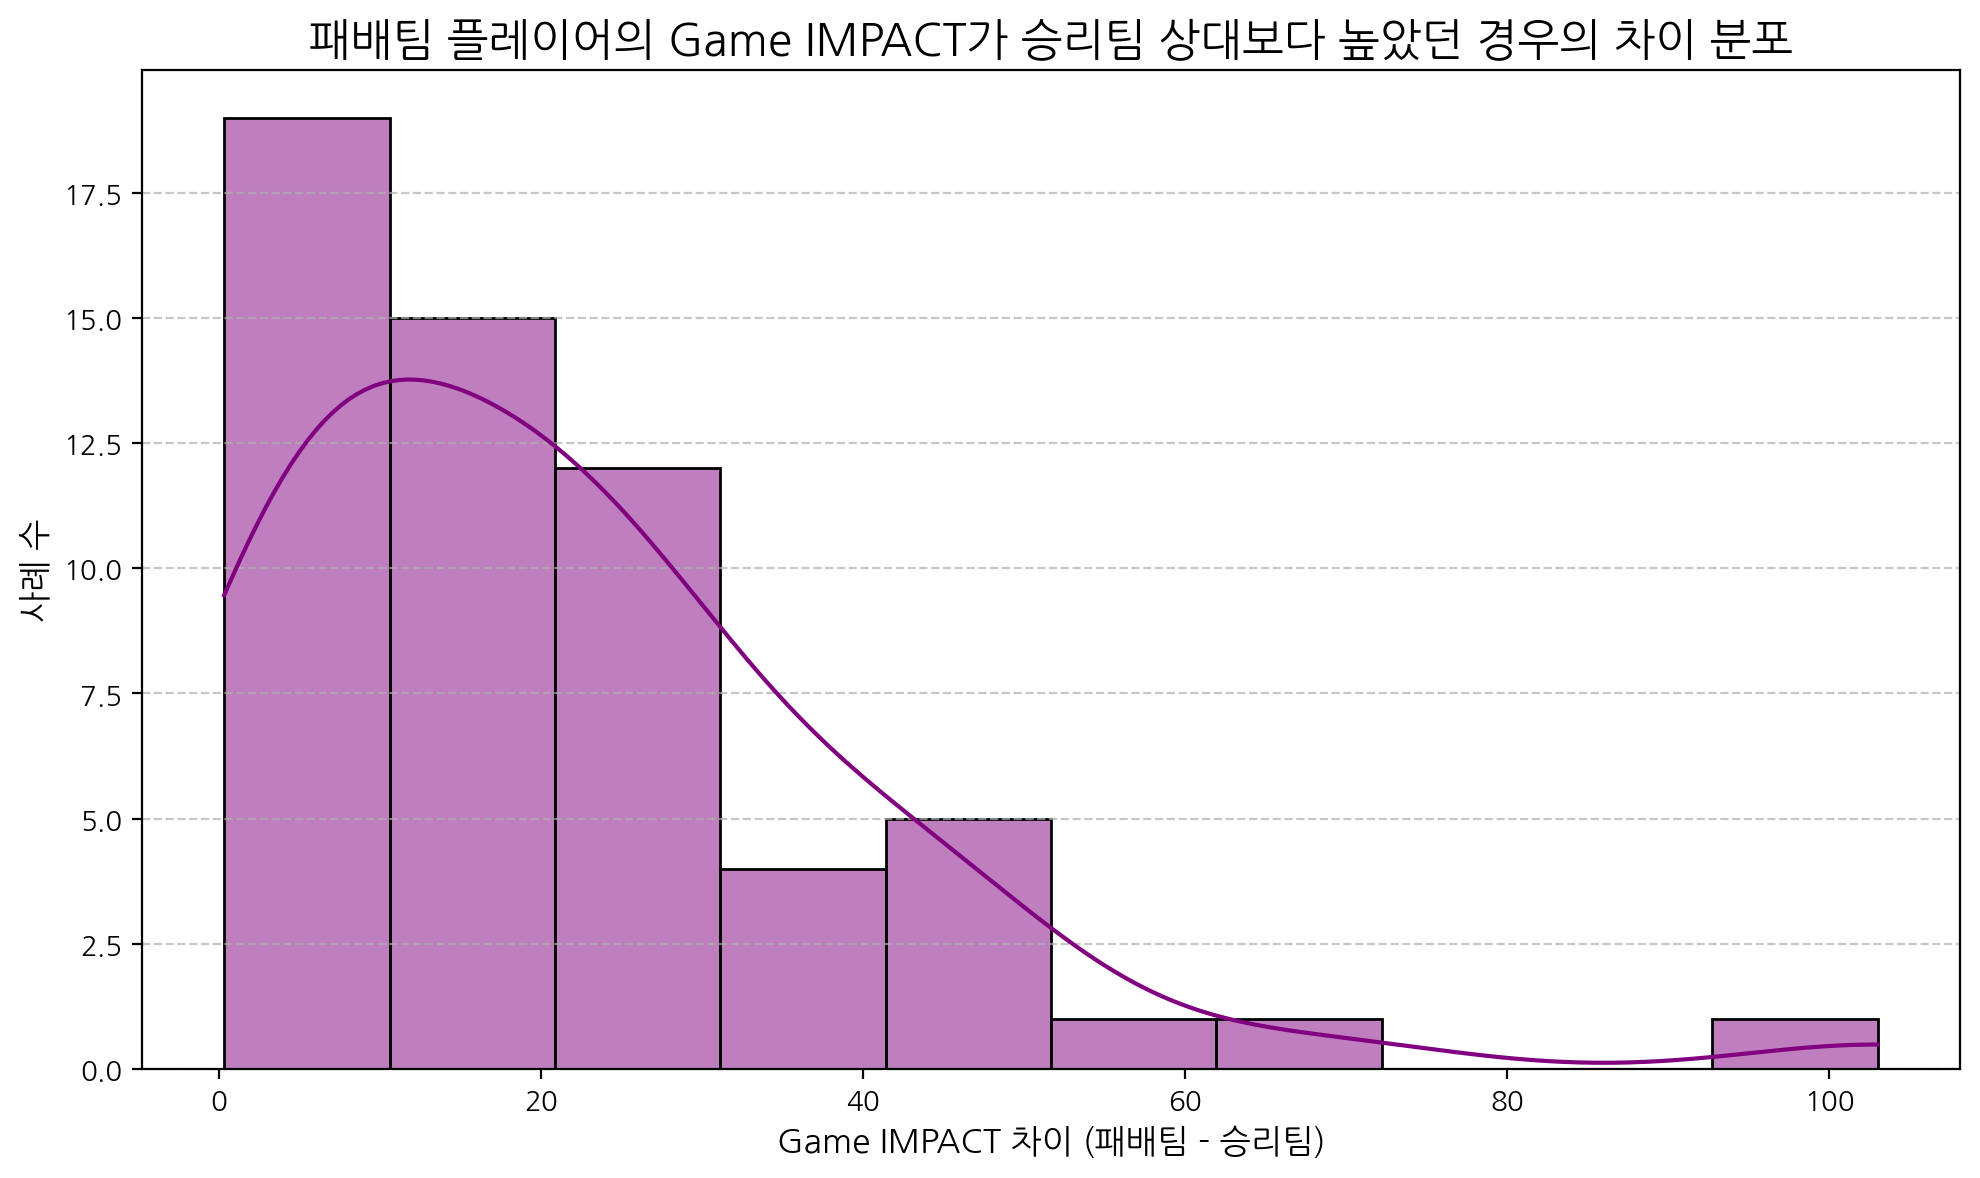

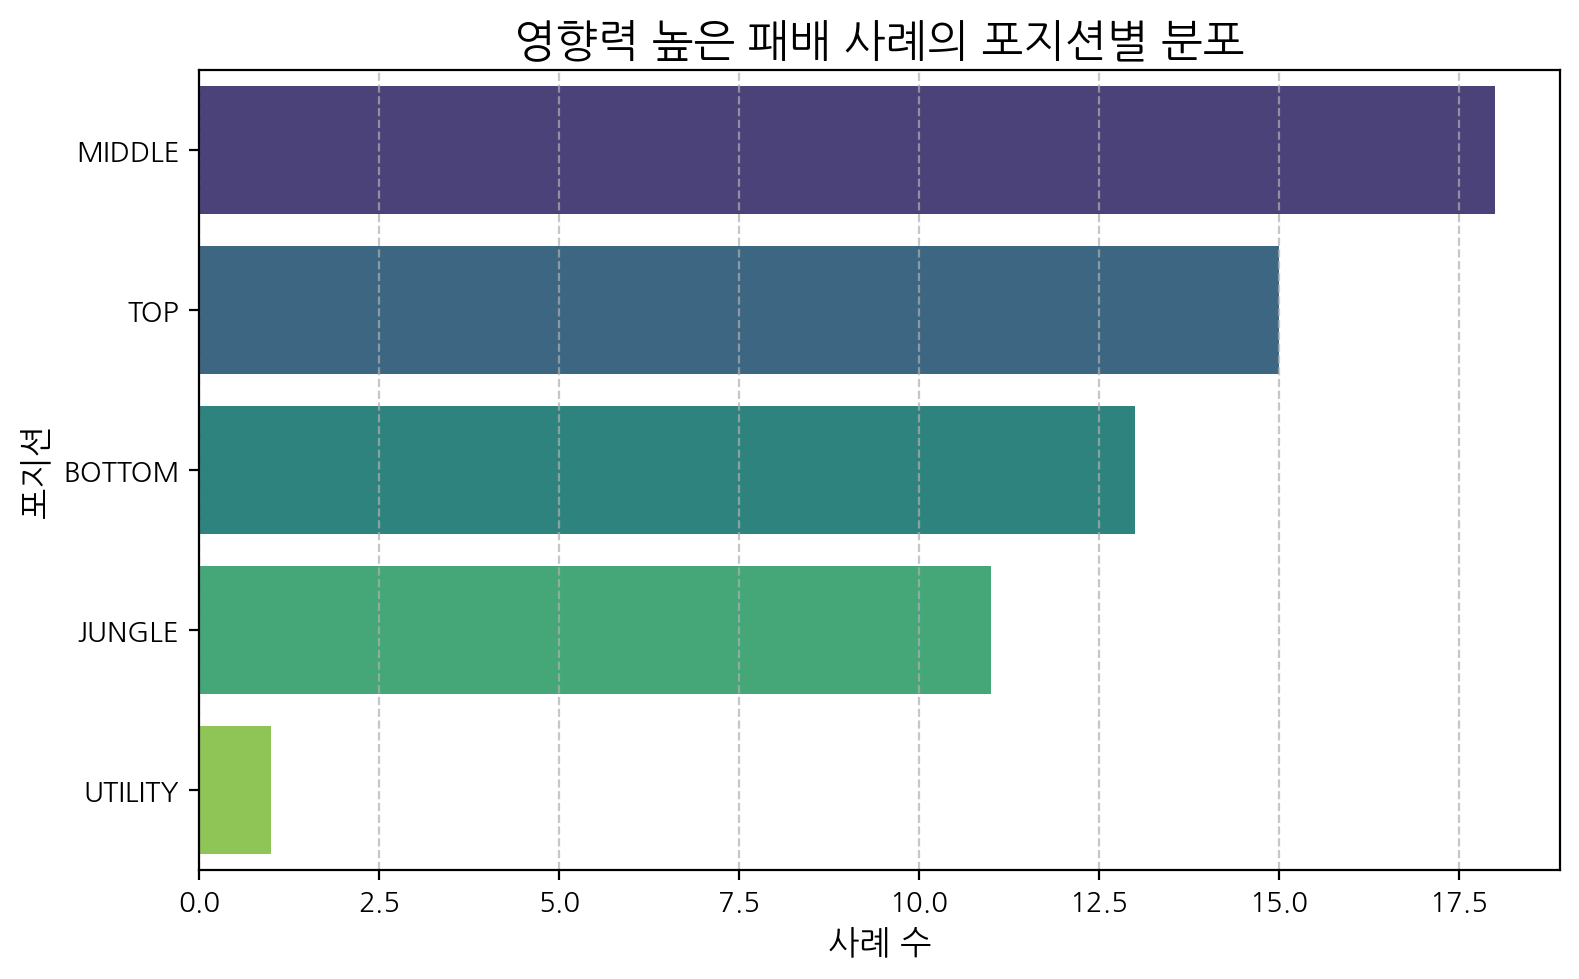


--- 분석 완료 ---


In [ ]:
results = []

# 모든 고유한 게임 ID 가져오기
unique_game_ids = mmr_df_cleaned_default['game_id'].unique()

print(f"총 {len(unique_game_ids)}개의 게임을 분석하여 '영향력 높은 패배' 사례를 찾습니다.")

for game_id in unique_game_ids:
    game_data = mmr_df_cleaned_default[mmr_df_cleaned_default['game_id'] == game_id]

    # 해당 게임의 모든 고유 포지션 가져오기
    positions_in_game = game_data['team_position'].unique()

    for position in positions_in_game:
        # 해당 포지션의 플레이어들만 필터링
        position_players = game_data[game_data['team_position'] == position]

        # 승리팀 플레이어와 패배팀 플레이어 데이터 분리
        winning_player_data = position_players[position_players['game_result'] == 1]
        losing_player_data = position_players[position_players['game_result'] == 0]

        # 해당 포지션에 승리팀과 패배팀 플레이어가 모두 1명씩 존재하는지 확인
        if len(winning_player_data) == 1 and len(losing_player_data) == 1:
            win_player_id = winning_player_data['player_id'].iloc[0]
            win_impact = winning_player_data['game_impact'].iloc[0]

            lose_player_id = losing_player_data['player_id'].iloc[0]
            lose_impact = losing_player_data['game_impact'].iloc[0]

            # 패배팀 플레이어의 game_impact가 승리팀 상대보다 높은지 확인
            if lose_impact > win_impact:
                results.append({
                    'game_id': game_id,
                    'position': position,
                    'winning_player_id': win_player_id,
                    'winning_player_impact': win_impact,
                    'losing_player_id': lose_player_id,
                    'losing_player_impact': lose_impact,
                    'impact_difference': lose_impact - win_impact # 패배팀 - 승리팀 임팩트 차이
                })

# 결과를 DataFrame으로 변환
high_impact_losses_df = pd.DataFrame(results)

print("\n--- 같은 포지션 상대보다 영향력이 높았던 패배 사례 분석 결과 ---")

if not high_impact_losses_df.empty:
    print(f"총 {len(high_impact_losses_df)}건의 사례가 발견되었습니다.")
    print("패배했지만 상대보다 영향력이 높았던 상위 10개 사례 (차이 기준 내림차순):")
    print(high_impact_losses_df.sort_values(by='impact_difference', ascending=False).head(10))

    # --- 시각화 ---
    plt.figure(figsize=(10, 6))
    sns.histplot(high_impact_losses_df['impact_difference'], kde=True, color='purple')
    plt.title('패배팀 플레이어의 Game IMPACT가 승리팀 상대보다 높았던 경우의 차이 분포', fontsize=16)
    plt.xlabel('Game IMPACT 차이 (패배팀 - 승리팀)', fontsize=12)
    plt.ylabel('사례 수', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.countplot(data=high_impact_losses_df, y='position', order=high_impact_losses_df['position'].value_counts().index, palette='viridis')
    plt.title('영향력 높은 패배 사례의 포지션별 분포', fontsize=16)
    plt.xlabel('사례 수', fontsize=12)
    plt.ylabel('포지션', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("해당하는 사례가 발견되지 않았습니다. 모든 패배팀 플레이어의 Game IMPACT가 상대보다 낮았습니다.")

print("\n--- 분석 완료 ---")

In [ ]:
if 'high_impact_losses_df' in locals():
    count = len(high_impact_losses_df)
    print(count)
else:
    print("high_impact_losses_df 데이터가 준비되지 않았습니다. 이전 분석 코드를 먼저 실행해주세요.")

58


In [ ]:
high_impact_losses_df

,game_id,position,winning_player_id,winning_player_impact,losing_player_id,losing_player_impact,impact_difference
0,1t_0528_2335,TOP,PLR_159,205.744442,PLR_39,251.481183,45.736741
1,1t_0526_0330,BOTTOM,PLR_81,240.391026,PLR_372,250.113953,9.722927
2,1t_0525_0240,MIDDLE,PLR_40,241.987480,PLR_22,253.994880,12.007399
3,2t_0524_2120,UTILITY,PLR_251,172.634497,PLR_191,173.778252,1.143755
4,1t_0523_2200,JUNGLE,PLR_464,184.054295,PLR_234,190.511219,6.456924
5,2t_0523_0338,MIDDLE,PLR_22,198.323741,PLR_13,218.900007,20.576266
6,2t_0522_2315,TOP,PLR_464,230.227495,PLR_222,230.544647,0.317153
7,2t_0522_0015,JUNGLE,PLR_464,168.680746,PLR_319,223.634255,54.953509
8,3t_0520_0005,BOTTOM,PLR_71,214.618958,PLR_89,219.677337,5.058378
9,1t_0519_0251,MIDDLE,PLR_47,155.615936,PLR_121,167.450015,11.834078


# 전처리부터 game_impact 선정까지

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib # 모델 및 스케일러 저장을 위한 라이브러리
import warnings

warnings.filterwarnings('ignore') # 불필요한 경고 메시지 숨기기

# %config InlineBackend.figure_format = 'retina' # Jupyter Notebook 환경에서 고해상도 시각화를 위해 사용합니다.

# --- 1. 데이터 로딩 및 전처리 (이전 코드와 동일) ---

# 데이터 로드 (채소리1님의 경로 사용)
mmr_df_path = "C:/Users/PC/Downloads/난민 RAW.csv" # 사용자 파일 경로
try:
    mmr_df = pd.read_csv(mmr_df_path, encoding='utf-8', on_bad_lines='skip')
    print("UTF-8 인코딩으로 데이터 로드에 성공했습니다.")
except UnicodeDecodeError:
    mmr_df = pd.read_csv(mmr_df_path, encoding='cp949', on_bad_lines='skip')
    print("CP949 인코딩으로 데이터 로드에 성공했습니다.")


# 중복 제거 후 .copy()
mmr_df.drop(columns=['mmr_id'], inplace=True)
mmr_df_cleaned_default = mmr_df.drop_duplicates().copy()

# 'win' -> 'game_result' 변환
mmr_df_cleaned_default['game_result'] = mmr_df_cleaned_default['win'].map({'Win': 1, 'Fail': 0})
mmr_df_cleaned_default.drop(columns=['win'], inplace=True)

# total_minions_killed
mmr_df_cleaned_default['total_minions_killed'] = (
    mmr_df_cleaned_default['neutral_minions_killed'] + mmr_df_cleaned_default['minions_killed']
)

# 쉼표 제거 + 숫자 변환
cols_to_convert = ['gold_earned', 'exp', 'total_damage_dealt_to_champions',
                   'total_damage_dealt_to_buildings', 'total_damage_taken', 'time_played']
for col in cols_to_convert:
    mmr_df_cleaned_default[col] = (
        mmr_df_cleaned_default[col].astype(str)
        .str.replace(',', '', regex=False)
        .astype(float)
    )

# time_played 분 단위
mmr_df_cleaned_default['time_played'] = (mmr_df_cleaned_default['time_played'] / 60).round(2)

# 분당 값 계산
cols_to_divide = ['gold_earned', 'exp', 'total_damage_dealt_to_champions',
                  'total_damage_dealt_to_buildings', 'total_damage_taken']
for col in cols_to_divide:
    mmr_df_cleaned_default[col] = (mmr_df_cleaned_default[col] / mmr_df_cleaned_default['time_played']).round(2)

# KDA 계산
deaths_for_kda = mmr_df_cleaned_default['num_deaths'].replace(0, 1)
mmr_df_cleaned_default['KDA'] = (
    (mmr_df_cleaned_default['champions_killed'] + mmr_df_cleaned_default['assists']) / deaths_for_kda
).round(2)

# 데스 당 지표 계산을 위한 num_deaths 처리: 0일 경우 1로 치환
deaths_for_per_death_metrics = mmr_df_cleaned_default['num_deaths'].replace(0, 1)

# 데스 당 받은 피해 계산
mmr_df_cleaned_default['damage_taken_per_death'] = (
    mmr_df_cleaned_default['total_damage_taken'] / deaths_for_per_death_metrics
).round(2)

# 데스 당 넣은 피해 계산
mmr_df_cleaned_default['damage_dealt_per_death'] = (
    mmr_df_cleaned_default['total_damage_dealt_to_champions'] / deaths_for_per_death_metrics
).round(2)

print("--- 데이터 전처리 완료 ---")
print("-" * 50)

# --- 2. 모델링에 사용할 피처 정의 (vision_score 포함) ---
# 이 리스트는 모든 포지션에 공통적으로 사용될 피처입니다.
features = [
    'gold_earned',
    'exp',
    'total_damage_dealt_to_champions',
    'total_damage_dealt_to_buildings',
    'total_damage_taken',
    'KDA',
    'total_minions_killed',
    'damage_taken_per_death',
    'damage_dealt_per_death',
    'vision_score',
    'champions_killed',
    'assists'
]

# --- 3. 각 포지션별 모델 학습 및 피처 중요도/스케일러 저장 ---
saved_feature_importances = {}
saved_scalers = {} # 스케일러를 저장할 딕셔너리

if 'team_position' not in mmr_df_cleaned_default.columns:
    print("오류: 'team_position' 컬럼이 데이터프레임에 존재하지 않습니다.")
    print("모델링을 위해 'team_position' 컬럼이 필요합니다. 데이터 로드 부분을 확인해주세요.")
else:
    positions = mmr_df_cleaned_default['team_position'].unique()
    print(f"--- 모델 학습에 사용될 피처 ({len(features)}개): ---")
    for feature in features:
        print(f"- {feature}")
    print("-" * 50)

    print("## 포지션별 랜덤 포레스트 모델 학습 및 피처 중요도/스케일러 저장 ##")

    for position in positions:
        print(f"\n### 포지션: {position} ###")

        position_df = mmr_df_cleaned_default[mmr_df_cleaned_default['team_position'] == position].copy()

        if len(position_df) < 100:
            print(f"데이터 수가 부족하여 {position} 포지션에 대한 모델링을 건너뜁니다. (현재 {len(position_df)}개)")
            continue
        
        current_features = [f for f in features if f in position_df.columns]
        X_pos = position_df[current_features] # X_pos는 모든 피처를 포함하는 DataFrame
        y_pos = position_df['game_result']

        # X_pos 전체에 대해 스케일러를 학습하고 저장
        scaler = StandardScaler()
        scaler.fit(X_pos) # X_pos 전체에 대해 fit
        saved_scalers[position] = scaler # 스케일러 저장

        # 학습 데이터 분할 및 스케일링
        X_train, X_test, y_train, y_test = train_test_split(
            X_pos, y_pos, test_size=0.2, random_state=42, stratify=y_pos
        )
        X_train_scaled = scaler.transform(X_train) # 학습 데이터만 스케일링하여 모델 학습에 사용

        rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', n_jobs=-1)
        rf_model.fit(X_train_scaled, y_train)

        rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X_pos.columns)
        saved_feature_importances[position] = rf_feature_importances # 피처 중요도 저장

        print("랜덤 포레스트 피처 중요도 (내림차순 상위 10개):")
        print(rf_feature_importances.sort_values(ascending=False).head(10))

        # 모델 성능 평가는 X_test_scaled를 사용해야 함
        X_test_scaled = scaler.transform(X_test) # 테스트 데이터도 스케일링
        y_pred = rf_model.predict(X_test_scaled)
        
        print("\n모델 성능:")
        print(f"정확도 (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
        print("분류 리포트 (Classification Report):\n", classification_report(y_test, y_pred))
        print("-" * 50)

    print("\n분석 완료: 각 포지션별 랜덤 포레스트 모델의 피처 중요도와 스케일러가 저장되었습니다.")

# --- 4. 자동 가중치 계산 함수 (채소리1님 제공 코드) ---
def compute_auto_weights(df, position_col, target_col, feature_cols, domain_boost=None):
    auto_weights = {}
    positions = df[position_col].unique()
    
    for pos in positions:
        pos_df = df[df[position_col] == pos]
        corr_values = {}
        
        for feat in feature_cols:
            if feat in pos_df.columns:
                # 상관관계 계산 시, 해당 피처가 NaN 값을 포함할 경우 계산 오류가 발생할 수 있으므로 dropna() 고려
                # 하지만 현재 mmr_df_cleaned_default는 결측치가 없으므로 괜찮습니다.
                corr = pos_df[[feat, target_col]].corr().iloc[0,1]
                if pd.isna(corr):
                    corr = 0
                corr_values[feat] = abs(corr)
            else:
                corr_values[feat] = 0
        
        if domain_boost and pos in domain_boost:
            for feat, boost in domain_boost[pos].items():
                if feat in corr_values:
                    corr_values[feat] *= boost
        
        total = sum(corr_values.values())
        if total > 0:
            norm_weights = {feat: val / total for feat, val in corr_values.items()}
        else:
            norm_weights = corr_values
        
        auto_weights[pos] = norm_weights
    
    return auto_weights

# --- 5. 도메인 가중치 설정 ---
domain_boost = {
    'UTILITY': {'vision_score': 2.5, 'assists': 1.2},
    'JUNGLE': {'assists': 1.2, 'neutral_minions_killed': 1.2},
    'BOTTOM': {'total_damage_dealt_to_champions': 1.2, 'champions_killed': 1.2},
    'TOP': {'damage_taken_per_death': 1.2},
    'MIDDLE': {'total_damage_dealt_to_champions': 1.2}
}

# --- 6. 가중치 계산 ---
weights = compute_auto_weights(mmr_df_cleaned_default, 'team_position', 'game_result', features, domain_boost)

# --- 7. 승리/패배 가중치 보정 계수 ---
win_boost = 1.2
lose_boost = 0.8

# --- 8. game_impact 계산 (정규화된 피처 값 사용) ---
mmr_df_cleaned_default['game_impact'] = 0.0 # float 타입으로 초기화

print("\n## Game IMPACT 계산 시작 (피처 값 정규화 적용) ##")

for pos in weights:
    idx = mmr_df_cleaned_default['team_position'] == pos
    
    # 해당 포지션의 데이터프레임
    position_data_slice = mmr_df_cleaned_default.loc[idx, :].copy()

    # 해당 포지션의 스케일러와 가중치 가져오기
    if pos not in saved_scalers or pos not in weights:
        print(f"경고: 포지션 '{pos}'에 대한 스케일러 또는 가중치 정보가 없습니다. 해당 포지션 건너뜀.")
        mmr_df_cleaned_default.loc[idx, 'game_impact'] = np.nan # 처리되지 않은 값은 NaN으로
        continue

    current_scaler = saved_scalers[pos]
    current_weights = weights[pos]
    
    # game_impact 계산에 사용될 피처만 추출 (weights의 키와 일치)
    # weights 딕셔너리에 있는 피처만 선택하여 스케일링
    features_for_impact_calc = list(current_weights.keys())
    
    # 추출된 피처들이 데이터프레임에 실제로 존재하는지 확인 (안전성 강화)
    valid_features_for_scaling = [f for f in features_for_impact_calc if f in position_data_slice.columns]
    
    if not valid_features_for_scaling:
        print(f"경고: 포지션 '{pos}'에 유효한 피처가 없어 game_impact 계산 불가.")
        mmr_df_cleaned_default.loc[idx, 'game_impact'] = np.nan
        continue

    # 스케일링할 데이터 (DataFrame 형태 유지)
    data_to_scale = position_data_slice[valid_features_for_scaling]
    

    all_features_for_scaler = position_data_slice[features] # `features`는 전역 변수로 정의된 모든 피처 리스트
    
    # Step 2: 전체 피처에 대해 스케일링
    scaled_all_features = current_scaler.transform(all_features_for_scaler)
    scaled_all_features_df = pd.DataFrame(scaled_all_features, index=position_data_slice.index, columns=features)
    
    # Step 3: game_impact 계산에 필요한 피처만 선택하고 가중치 적용
    gi = pd.Series(0.0, index=position_data_slice.index)
    for feat, w in current_weights.items():
        if feat in scaled_all_features_df.columns: # 스케일링된 데이터에 해당 피처가 있는지 확인
            gi += scaled_all_features_df[feat] * w
        else:
            print(f"경고: 포지션 '{pos}'의 가중치에 포함된 피처 '{feat}'가 스케일링된 데이터에 없습니다.")
    
    # 승리/패배 보정 적용
    gi = gi * position_data_slice['game_result'].map({1: win_boost, 0: lose_boost})
    
    mmr_df_cleaned_default.loc[idx, 'game_impact'] = gi

print("\n## Game IMPACT 계산 완료 ##")
print("결과 미리보기:")
print(mmr_df_cleaned_default[['game_id', 'player_id', 'team_position', 'game_result', 'game_impact']].head(10))

print("\nGame IMPACT 통계 요약:")
print(mmr_df_cleaned_default['game_impact'].describe())

UTF-8 인코딩으로 데이터 로드에 성공했습니다.
--- 데이터 전처리 완료 ---
--------------------------------------------------
--- 모델 학습에 사용될 피처 (12개): ---
- gold_earned
- exp
- total_damage_dealt_to_champions
- total_damage_dealt_to_buildings
- total_damage_taken
- KDA
- total_minions_killed
- damage_taken_per_death
- damage_dealt_per_death
- vision_score
- champions_killed
- assists
--------------------------------------------------
## 포지션별 랜덤 포레스트 모델 학습 및 피처 중요도/스케일러 저장 ##

### 포지션: JUNGLE ###
랜덤 포레스트 피처 중요도 (내림차순 상위 10개):
KDA                                0.256073
exp                                0.220708
damage_dealt_per_death             0.108706
damage_taken_per_death             0.082303
total_damage_dealt_to_buildings    0.081180
gold_earned                        0.059127
assists                            0.050018
total_minions_killed               0.042904
total_damage_dealt_to_champions    0.030156
vision_score                       0.024532
dtype: float64

모델 성능:
정확도 (Accuracy): 0.9003
분류 리포트 (Cla

In [27]:
mmr_df_cleaned_default['game_id'].value_counts()

game_id
1t_0530_0402    10
1t_0329_2010    10
2t_0328_2320    10
1t_0328_2324    10
2t_0329_0006    10
                ..
1t_0429_0040    10
1t_0429_0130    10
1t_0429_0220    10
1t_0429_0325    10
2t_0203_2205    10
Name: count, Length: 1768, dtype: int64

In [28]:
# --- 중복 제거: 동일 game_id + player_id 기준 ---
before_dedup = len(mmr_df_cleaned_default)
mmr_df_cleaned_default = mmr_df_cleaned_default.drop_duplicates(subset=['game_id', 'player_id']).copy()
after_dedup = len(mmr_df_cleaned_default)

print(f"중복 제거 완료: {before_dedup - after_dedup}개의 중복 행이 제거되었습니다. (총 {after_dedup}개 남음)")
print("-" * 50)

# --- game_impact 계산 (정규화된 피처 값 사용) ---
mmr_df_cleaned_default['game_impact'] = 0.0 # float 타입으로 초기화

print("\n## Game IMPACT 계산 시작 (피처 값 정규화 적용) ##")

for pos in weights:
    idx = mmr_df_cleaned_default['team_position'] == pos
    
    position_data_slice = mmr_df_cleaned_default.loc[idx, :].copy()
    
    if pos not in saved_scalers or pos not in weights:
        print(f"경고: 포지션 '{pos}'에 대한 스케일러 또는 가중치 정보가 없습니다. 해당 포지션 건너뜀.")
        mmr_df_cleaned_default.loc[idx, 'game_impact'] = np.nan
        continue
    
    current_scaler = saved_scalers[pos]
    current_weights = weights[pos]
    
    features_for_impact_calc = list(current_weights.keys())
    valid_features_for_scaling = [f for f in features_for_impact_calc if f in position_data_slice.columns]
    
    if not valid_features_for_scaling:
        print(f"경고: 포지션 '{pos}'에 유효한 피처가 없어 game_impact 계산 불가.")
        mmr_df_cleaned_default.loc[idx, 'game_impact'] = np.nan
        continue
    
    all_features_for_scaler = position_data_slice[features]
    
    scaled_all_features = current_scaler.transform(all_features_for_scaler)
    scaled_all_features_df = pd.DataFrame(scaled_all_features, index=position_data_slice.index, columns=features)
    
    gi = pd.Series(0.0, index=position_data_slice.index)
    for feat, w in current_weights.items():
        if feat in scaled_all_features_df.columns:
            gi += scaled_all_features_df[feat] * w
        else:
            print(f"경고: 포지션 '{pos}'의 가중치에 포함된 피처 '{feat}'가 스케일링된 데이터에 없습니다.")
    
    gi = gi * position_data_slice['game_result'].map({1: win_boost, 0: lose_boost})
    
    mmr_df_cleaned_default.loc[idx, 'game_impact'] = gi

print("\n## Game IMPACT 계산 완료 ##")

# --- Game IMPACT 값 음수 방지 및 스케일 조정 ---
min_impact = mmr_df_cleaned_default['game_impact'].min()

if min_impact < 0 and pd.notna(min_impact):
    mmr_df_cleaned_default['game_impact'] = mmr_df_cleaned_default['game_impact'] + abs(min_impact)
    print(f"Game IMPACT 최솟값 {min_impact:.4f}을 보정하여 모든 값을 0 이상으로 조정했습니다.")
    print(f"새로운 Game IMPACT 최솟값: {mmr_df_cleaned_default['game_impact'].min():.4f}")
elif pd.isna(min_impact):
    print("Game IMPACT 컬럼에 유효한 값이 없어 스케일 조정이 불가능합니다.")
else:
    print("Game IMPACT 최솟값이 이미 0 이상이므로 조정이 필요 없습니다.")

print("\n결과 미리보기:")
print(mmr_df_cleaned_default[['game_id', 'player_id', 'team_position', 'game_result', 'game_impact']].head(10))

print("\nGame IMPACT 통계 요약:")
print(mmr_df_cleaned_default['game_impact'].describe())

중복 제거 완료: 0개의 중복 행이 제거되었습니다. (총 17680개 남음)
--------------------------------------------------

## Game IMPACT 계산 시작 (피처 값 정규화 적용) ##

## Game IMPACT 계산 완료 ##
Game IMPACT 최솟값 -1.3616을 보정하여 모든 값을 0 이상으로 조정했습니다.
새로운 Game IMPACT 최솟값: 0.0000

결과 미리보기:
         game_id player_id team_position  game_result  game_impact
0   1t_0530_0402    PLR_10        JUNGLE            0     1.394496
1   1t_0530_0402   PLR_203           TOP            0     0.879990
2   1t_0530_0402    PLR_34       UTILITY            0     0.788416
3   1t_0530_0402    PLR_50        MIDDLE            0     0.612946
4   1t_0530_0402   PLR_154       UTILITY            1     1.378169
5   1t_0530_0402   PLR_225        JUNGLE            1     2.154747
6   1t_0530_0402    PLR_63        BOTTOM            1     0.882722
7   1t_0530_0402   PLR_319        BOTTOM            0     1.001182
9   1t_0530_0402    PLR_13        MIDDLE            1     2.129432
11  1t_0530_0402   PLR_372           TOP            1     3.325224

Game IMPACT 통계 

In [29]:
# --- game_impact 계산 (정규화된 피처 값 사용) ---
mmr_df_cleaned_default['game_impact'] = 0.0 # float 타입으로 초기화

print("\n## Game IMPACT 계산 시작 (피처 값 정규화 적용) ##")

for pos in weights:
    idx = mmr_df_cleaned_default['team_position'] == pos
    
    position_data_slice = mmr_df_cleaned_default.loc[idx, :].copy()

    if pos not in saved_scalers or pos not in weights:
        print(f"경고: 포지션 '{pos}'에 대한 스케일러 또는 가중치 정보가 없습니다. 해당 포지션 건너뜀.")
        mmr_df_cleaned_default.loc[idx, 'game_impact'] = np.nan
        continue

    current_scaler = saved_scalers[pos]
    current_weights = weights[pos]
    
    features_for_impact_calc = list(current_weights.keys())
    valid_features_for_scaling = [f for f in features_for_impact_calc if f in position_data_slice.columns]
    
    if not valid_features_for_scaling:
        print(f"경고: 포지션 '{pos}'에 유효한 피처가 없어 game_impact 계산 불가.")
        mmr_df_cleaned_default.loc[idx, 'game_impact'] = np.nan
        continue

    all_features_for_scaler = position_data_slice[features]
    
    scaled_all_features = current_scaler.transform(all_features_for_scaler)
    scaled_all_features_df = pd.DataFrame(scaled_all_features, index=position_data_slice.index, columns=features)
    
    gi = pd.Series(0.0, index=position_data_slice.index)
    for feat, w in current_weights.items():
        if feat in scaled_all_features_df.columns:
            gi += scaled_all_features_df[feat] * w
        else:
            print(f"경고: 포지션 '{pos}'의 가중치에 포함된 피처 '{feat}'가 스케일링된 데이터에 없습니다.")
    
    gi = gi * position_data_slice['game_result'].map({1: win_boost, 0: lose_boost})
    
    mmr_df_cleaned_default.loc[idx, 'game_impact'] = gi

print("\n## Game IMPACT 계산 완료 ##")

# --- Game IMPACT 값 음수 방지 및 스케일 조정 로직 추가 ---
min_impact = mmr_df_cleaned_default['game_impact'].min()

if min_impact < 0 and pd.notna(min_impact): # min_impact가 NaN이 아닐 때만 조정
    mmr_df_cleaned_default['game_impact'] = mmr_df_cleaned_default['game_impact'] + abs(min_impact)
    print(f"Game IMPACT 최솟값 {min_impact:.4f}을 보정하여 모든 값을 0 이상으로 조정했습니다.")
    print(f"새로운 Game IMPACT 최솟값: {mmr_df_cleaned_default['game_impact'].min():.4f}")
elif pd.isna(min_impact):
    print("Game IMPACT 컬럼에 유효한 값이 없어 스케일 조정이 불가능합니다.")
else:
    print("Game IMPACT 최솟값이 이미 0 이상이므로 조정이 필요 없습니다.")

print("\n결과 미리보기:")
print(mmr_df_cleaned_default[['game_id', 'player_id', 'team_position', 'game_result', 'game_impact']].head(10))

print("\nGame IMPACT 통계 요약:")
print(mmr_df_cleaned_default['game_impact'].describe())


## Game IMPACT 계산 시작 (피처 값 정규화 적용) ##

## Game IMPACT 계산 완료 ##
Game IMPACT 최솟값 -1.3616을 보정하여 모든 값을 0 이상으로 조정했습니다.
새로운 Game IMPACT 최솟값: 0.0000

결과 미리보기:
         game_id player_id team_position  game_result  game_impact
0   1t_0530_0402    PLR_10        JUNGLE            0     1.394496
1   1t_0530_0402   PLR_203           TOP            0     0.879990
2   1t_0530_0402    PLR_34       UTILITY            0     0.788416
3   1t_0530_0402    PLR_50        MIDDLE            0     0.612946
4   1t_0530_0402   PLR_154       UTILITY            1     1.378169
5   1t_0530_0402   PLR_225        JUNGLE            1     2.154747
6   1t_0530_0402    PLR_63        BOTTOM            1     0.882722
7   1t_0530_0402   PLR_319        BOTTOM            0     1.001182
9   1t_0530_0402    PLR_13        MIDDLE            1     2.129432
11  1t_0530_0402   PLR_372           TOP            1     3.325224

Game IMPACT 통계 요약:
count    17680.000000
mean         1.450925
std          0.696427
min          0.000000
25

## 각 포지션별 Game IMPACT 할당량 (지표별 가중치) 시각화 ##


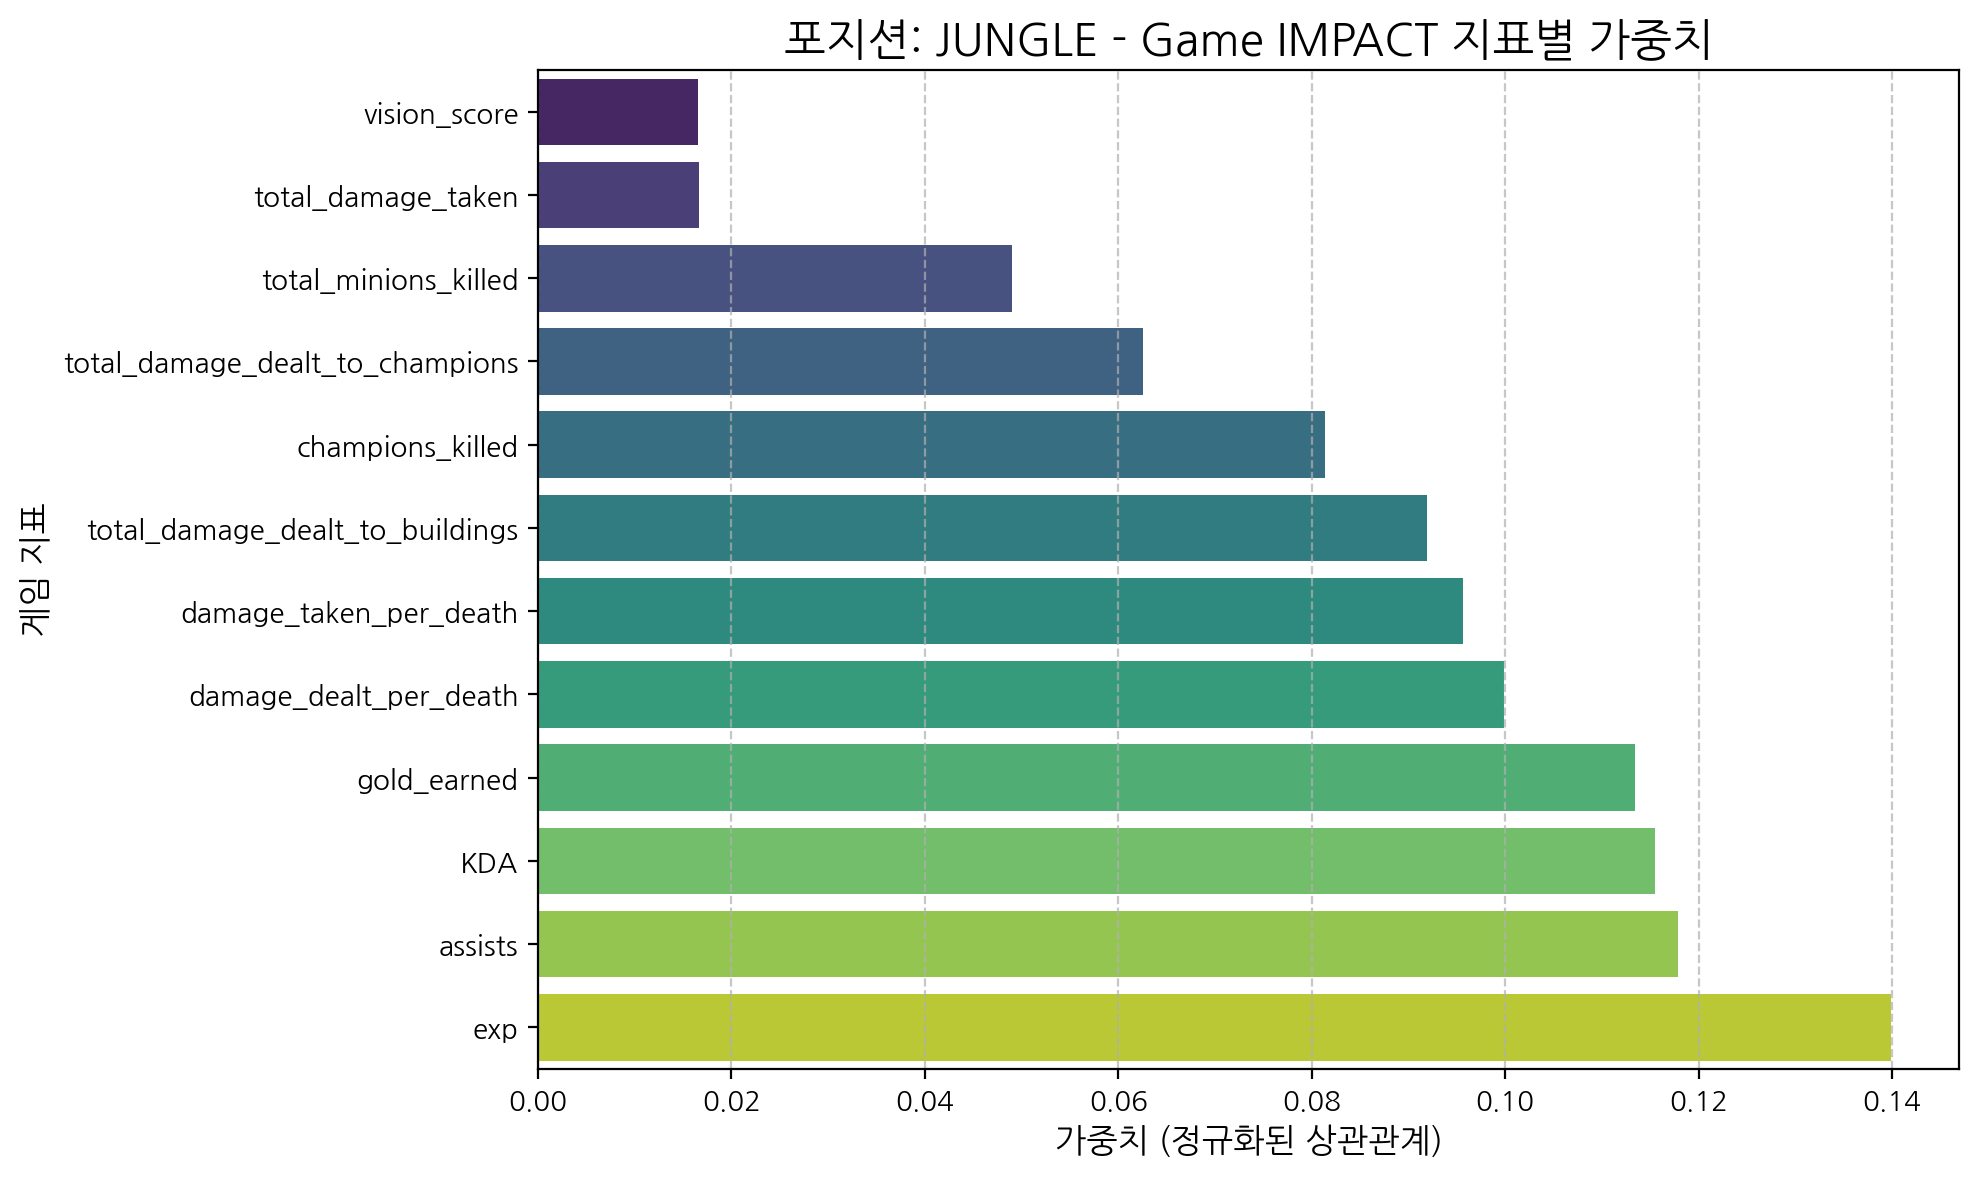

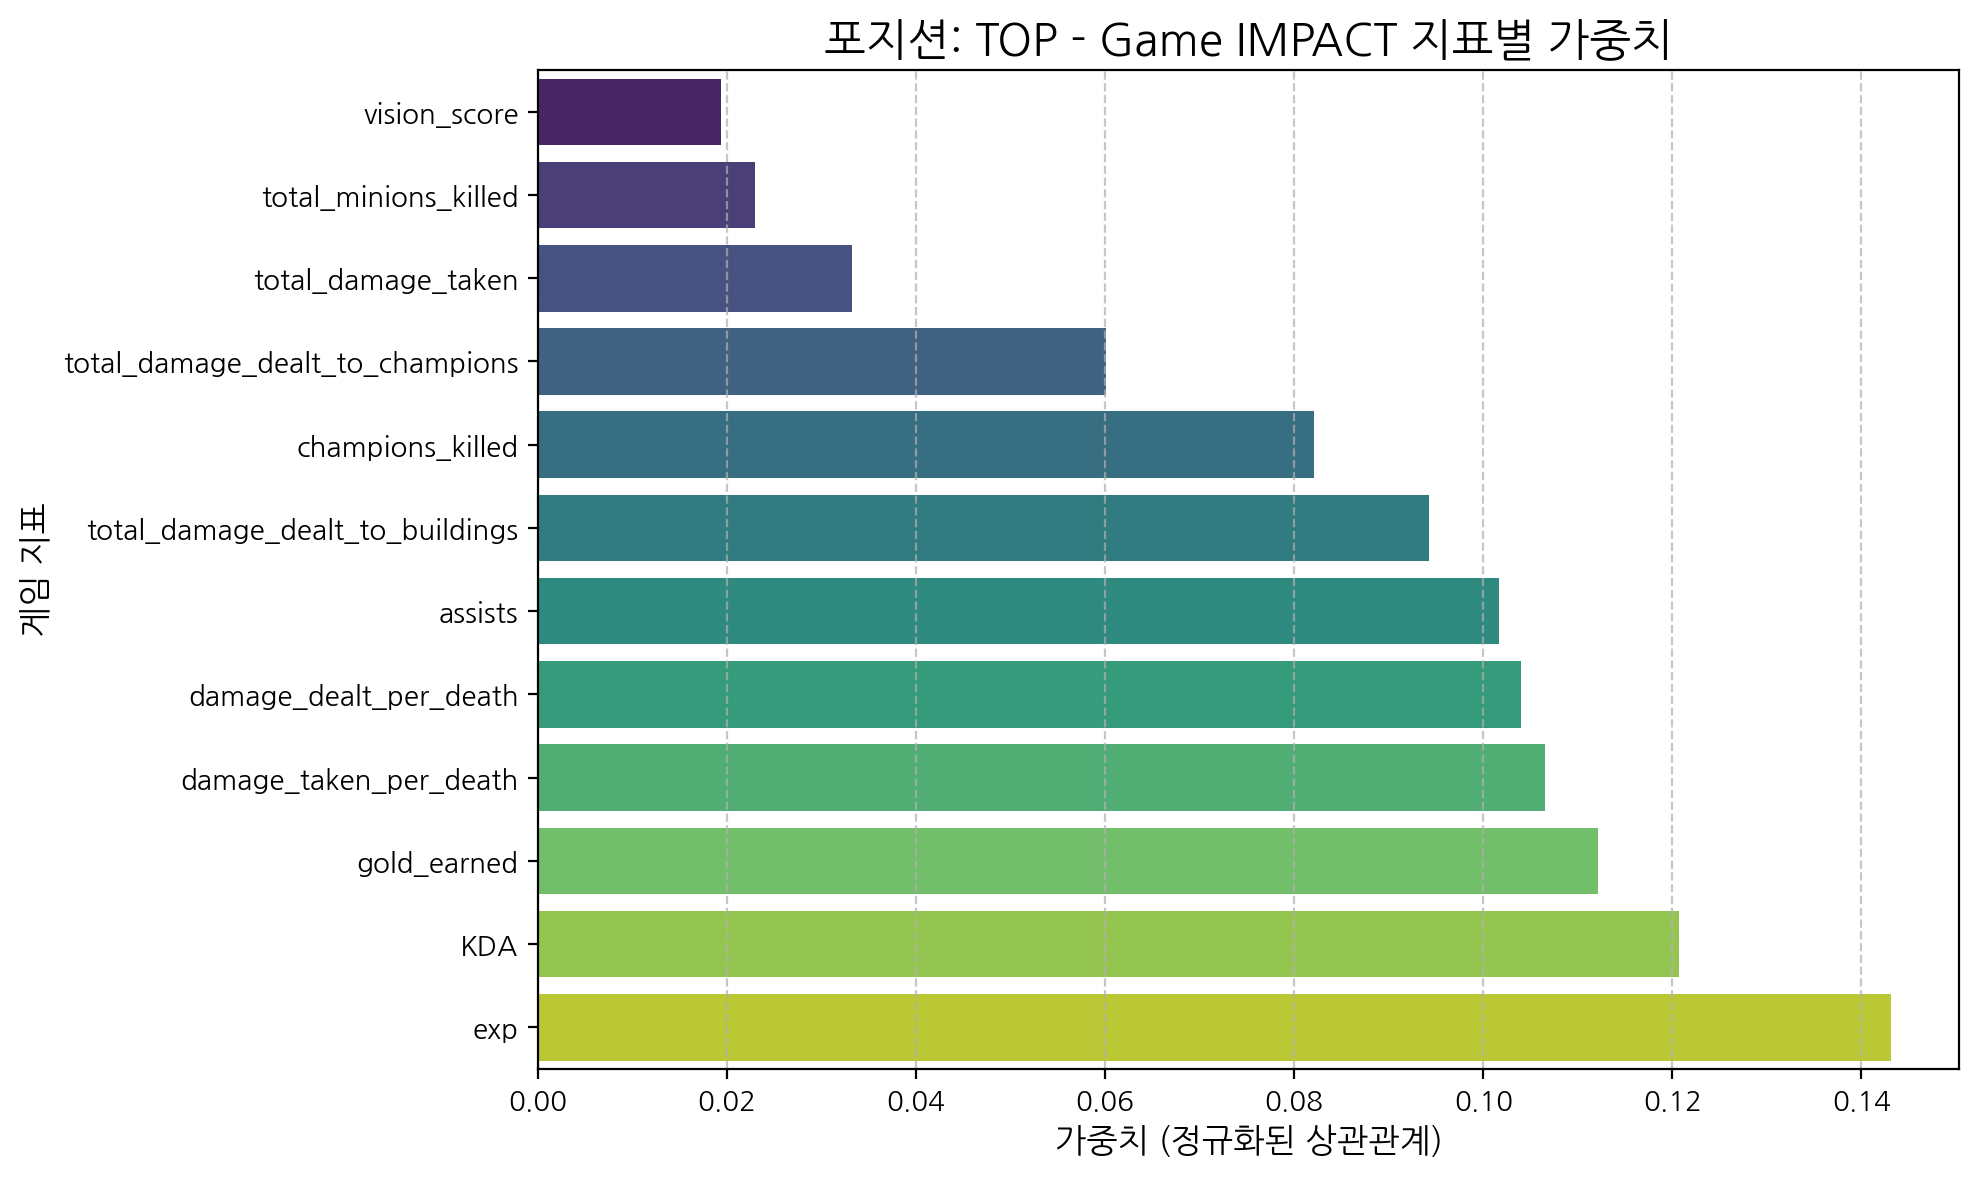

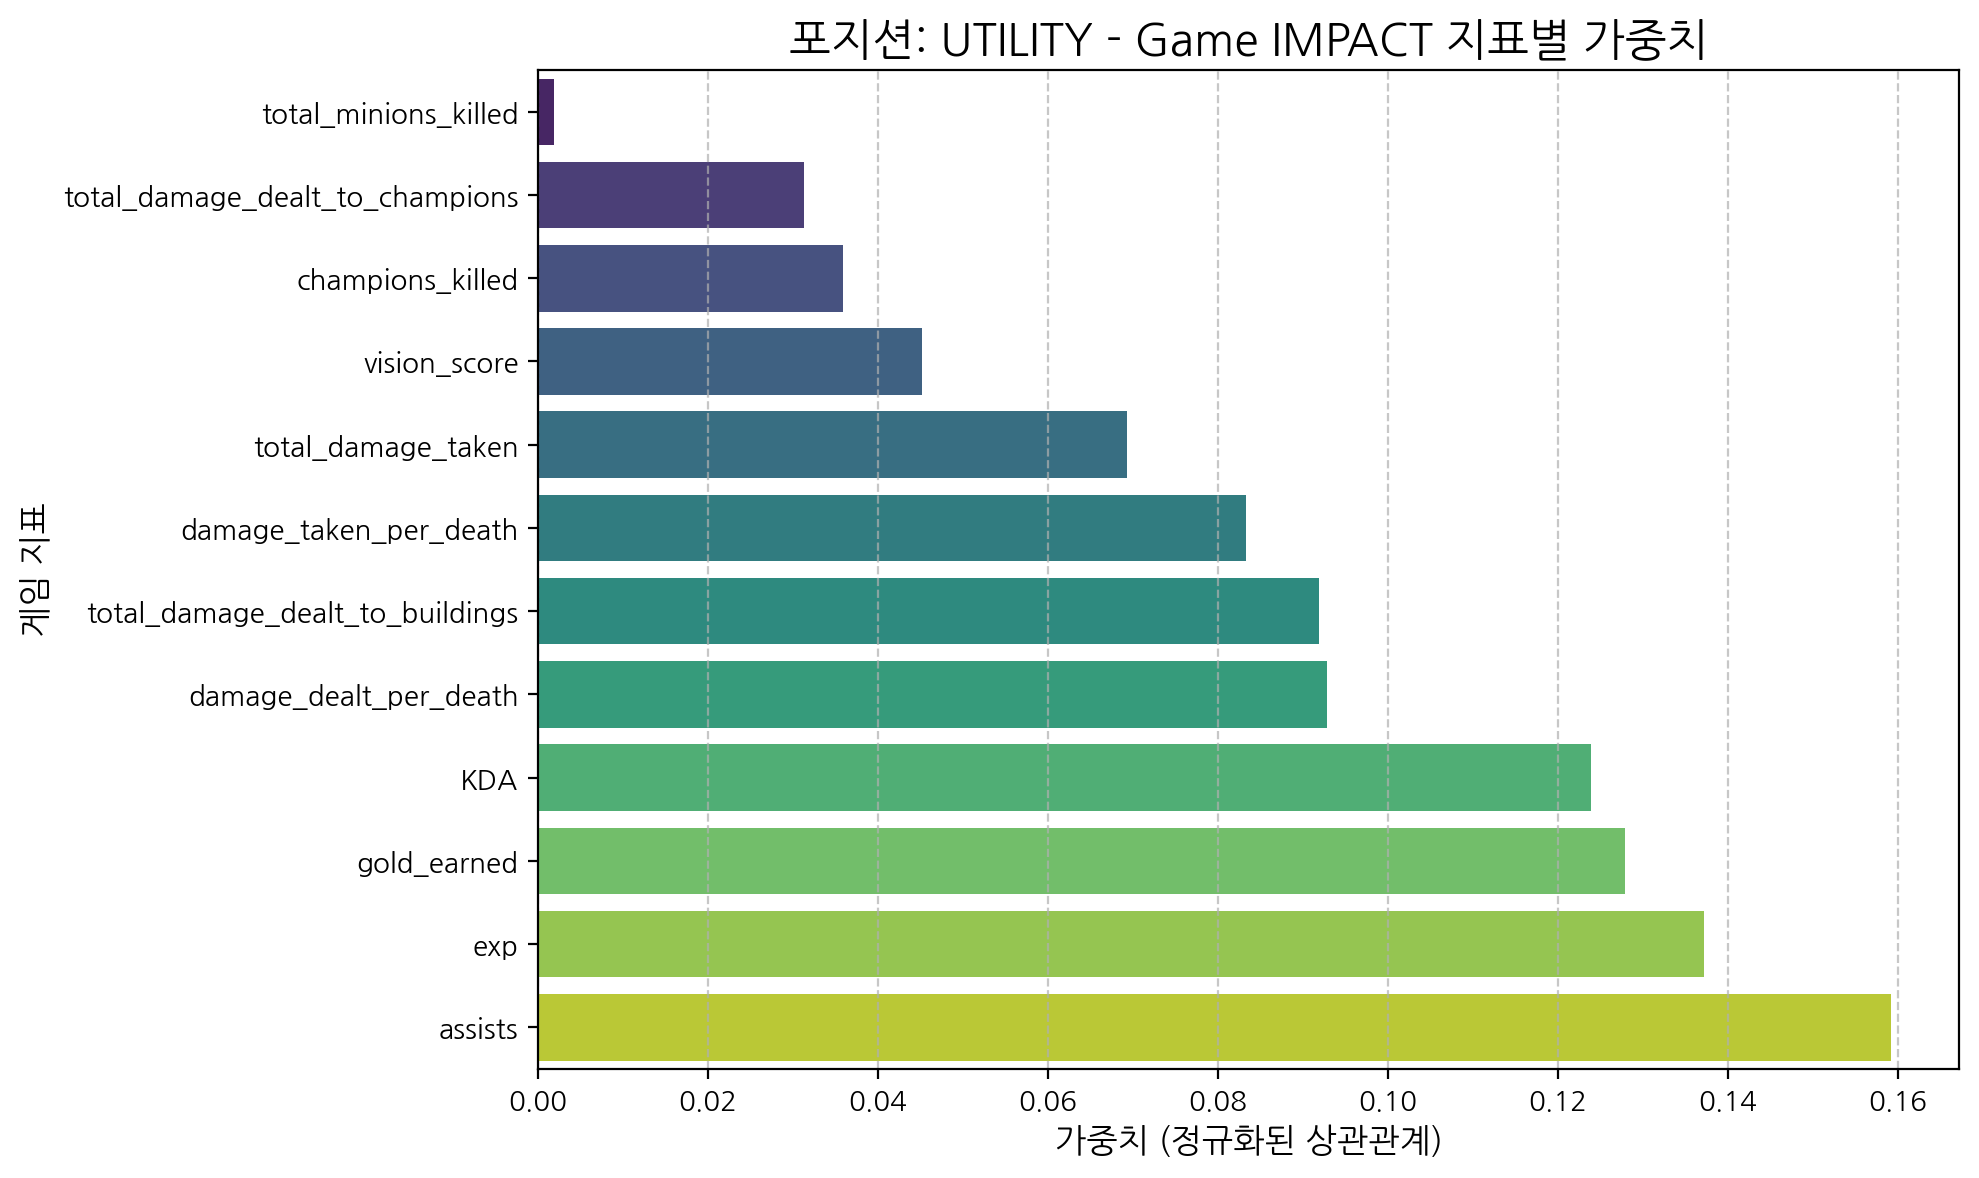

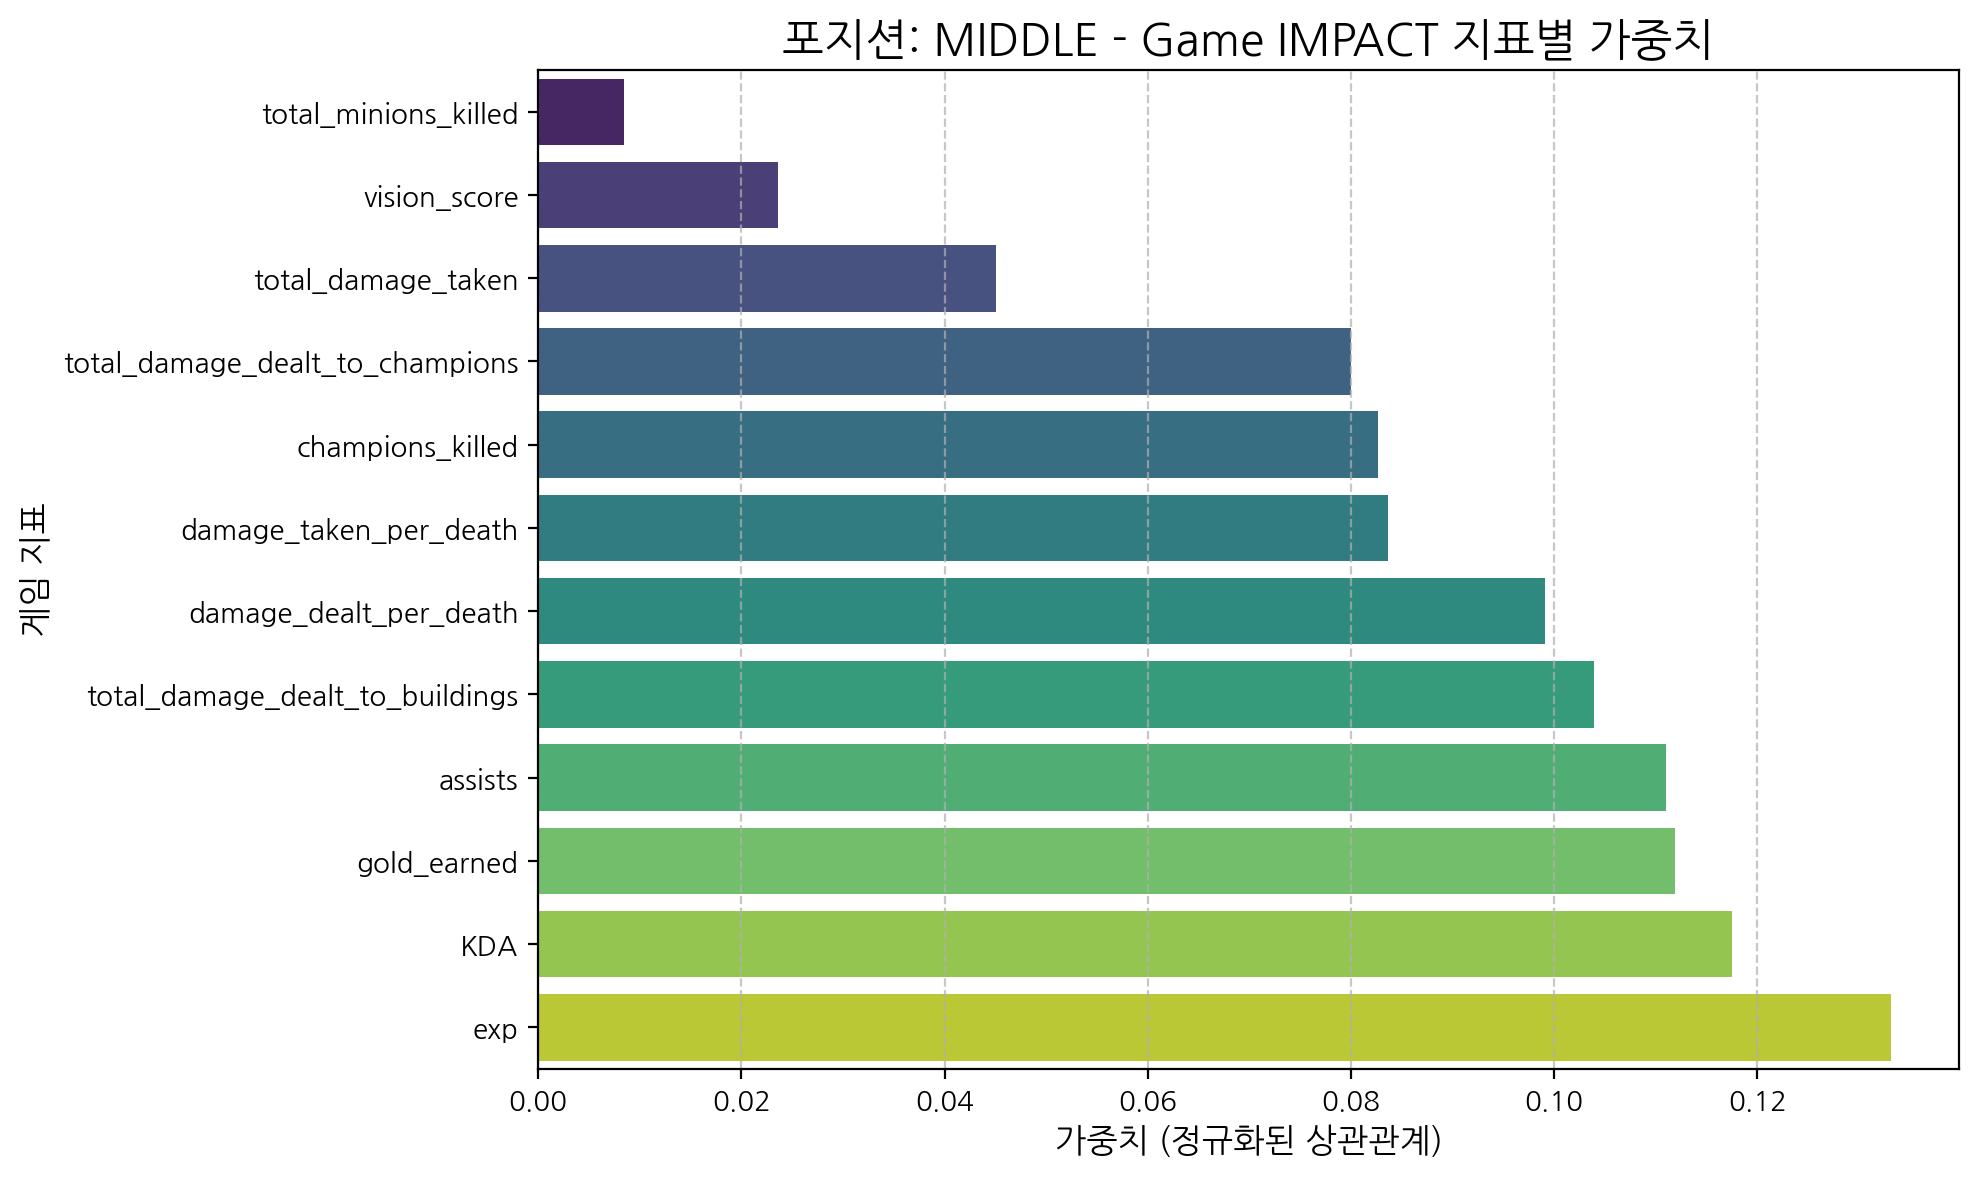

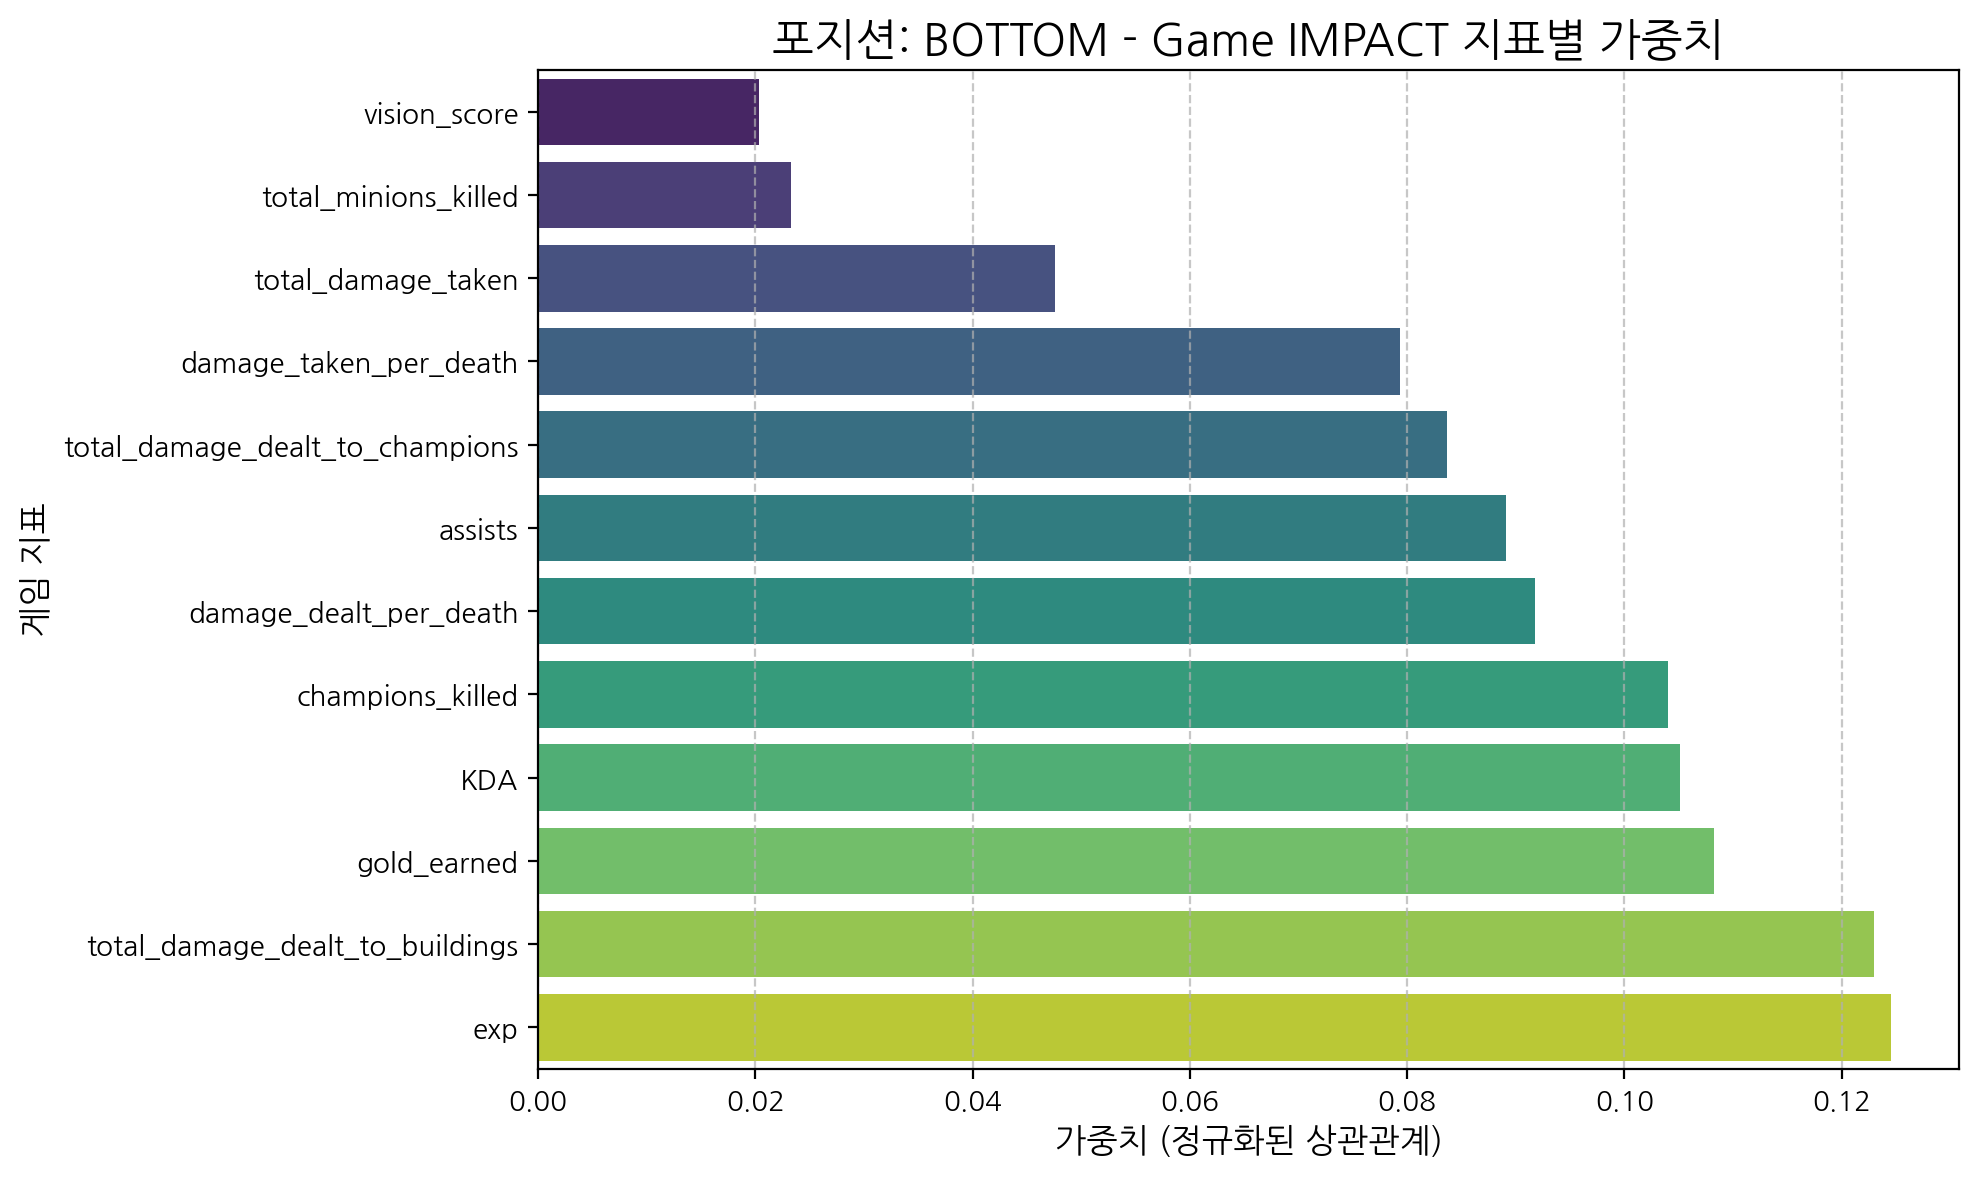


--- 시각화 완료 ---


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import koreanize_matplotlib # 한글 폰트 설정을 위해 필요합니다.

# --- 'weights' 딕셔너리가 이전 단계에서 성공적으로 계산되었다고 가정합니다. ---
# 만약 'weights' 딕셔너리가 아직 정의되지 않았다면,
# compute_auto_weights 함수 호출 및 관련 코드 블록을 먼저 실행해야 합니다.

print("## 각 포지션별 Game IMPACT 할당량 (지표별 가중치) 시각화 ##")

# 'weights' 딕셔너리가 존재하는지 확인
if 'weights' not in locals() or not weights:
    print("오류: 'weights' 딕셔너리가 준비되지 않았습니다. 이전 가중치 계산 코드를 먼저 실행해주세요.")
else:
    for position, feature_weights in weights.items():
        # 피처 가중치를 Pandas Series로 변환하여 정렬 용이하게 함
        weights_series = pd.Series(feature_weights)
        
        # 가중치가 0인 피처는 제외하고 정렬 (선택 사항, 분포가 너무 넓으면 유용)
        # weights_series = weights_series[weights_series > 0]
        
        # 모든 피처를 중요도 순으로 정렬 (오름차순으로 정렬해야 barh에서 가장 중요한 것이 위에 옴)
        weights_series = weights_series.sort_values(ascending=True)

        if weights_series.empty:
            print(f"경고: 포지션 '{position}'에 대한 유효한 가중치가 없습니다. 시각화를 건너뜁니다.")
            continue

        plt.figure(figsize=(10, 6))
        # sns.barplot을 사용하여 가로 막대 그래프 생성
        sns.barplot(x=weights_series.values, y=weights_series.index, palette='viridis')
        
        plt.title(f'포지션: {position} - Game IMPACT 지표별 가중치', fontsize=16)
        plt.xlabel('가중치 (정규화된 상관관계)', fontsize=12)
        plt.ylabel('게임 지표', fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

print("\n--- 시각화 완료 ---")

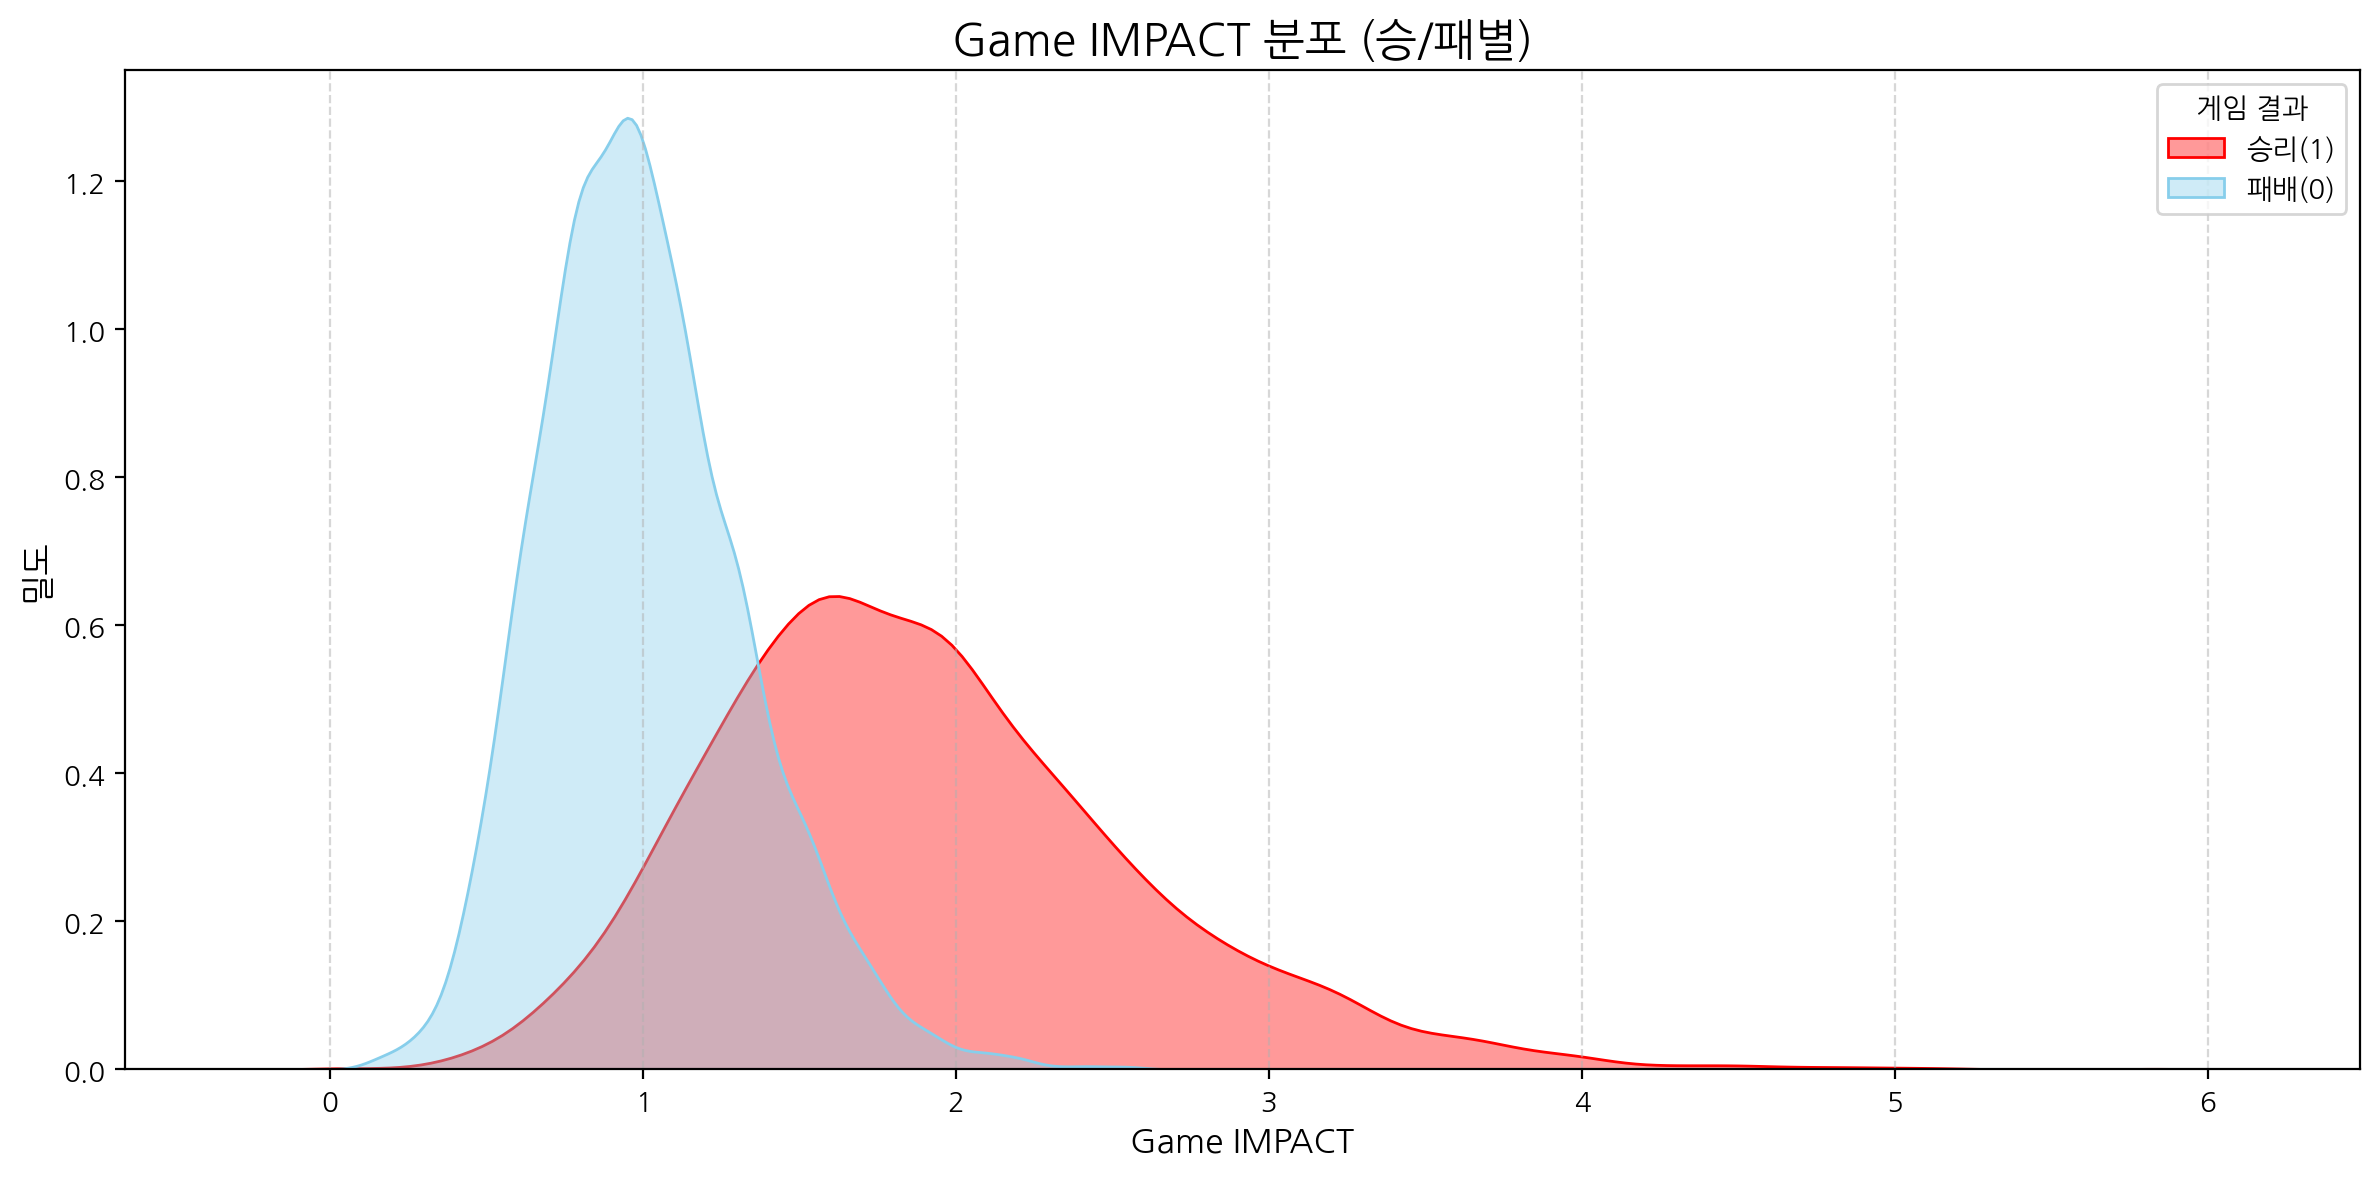

In [31]:
plt.figure(figsize=(12, 6))

# 승리: 1
sns.kdeplot(
    data=mmr_df_cleaned_default[mmr_df_cleaned_default['game_result'] == 1],
    x='game_impact',
    fill=True,
    color='red',
    alpha=0.4,
    label='승리(1)'
)

# 패배: 0
sns.kdeplot(
    data=mmr_df_cleaned_default[mmr_df_cleaned_default['game_result'] == 0],
    x='game_impact',
    fill=True,
    color='skyblue',
    alpha=0.4,
    label='패배(0)'
)

plt.title("Game IMPACT 분포 (승/패별)", fontsize=16)
plt.xlabel("Game IMPACT", fontsize=12)
plt.ylabel("밀도", fontsize=12)
plt.legend(title='게임 결과')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

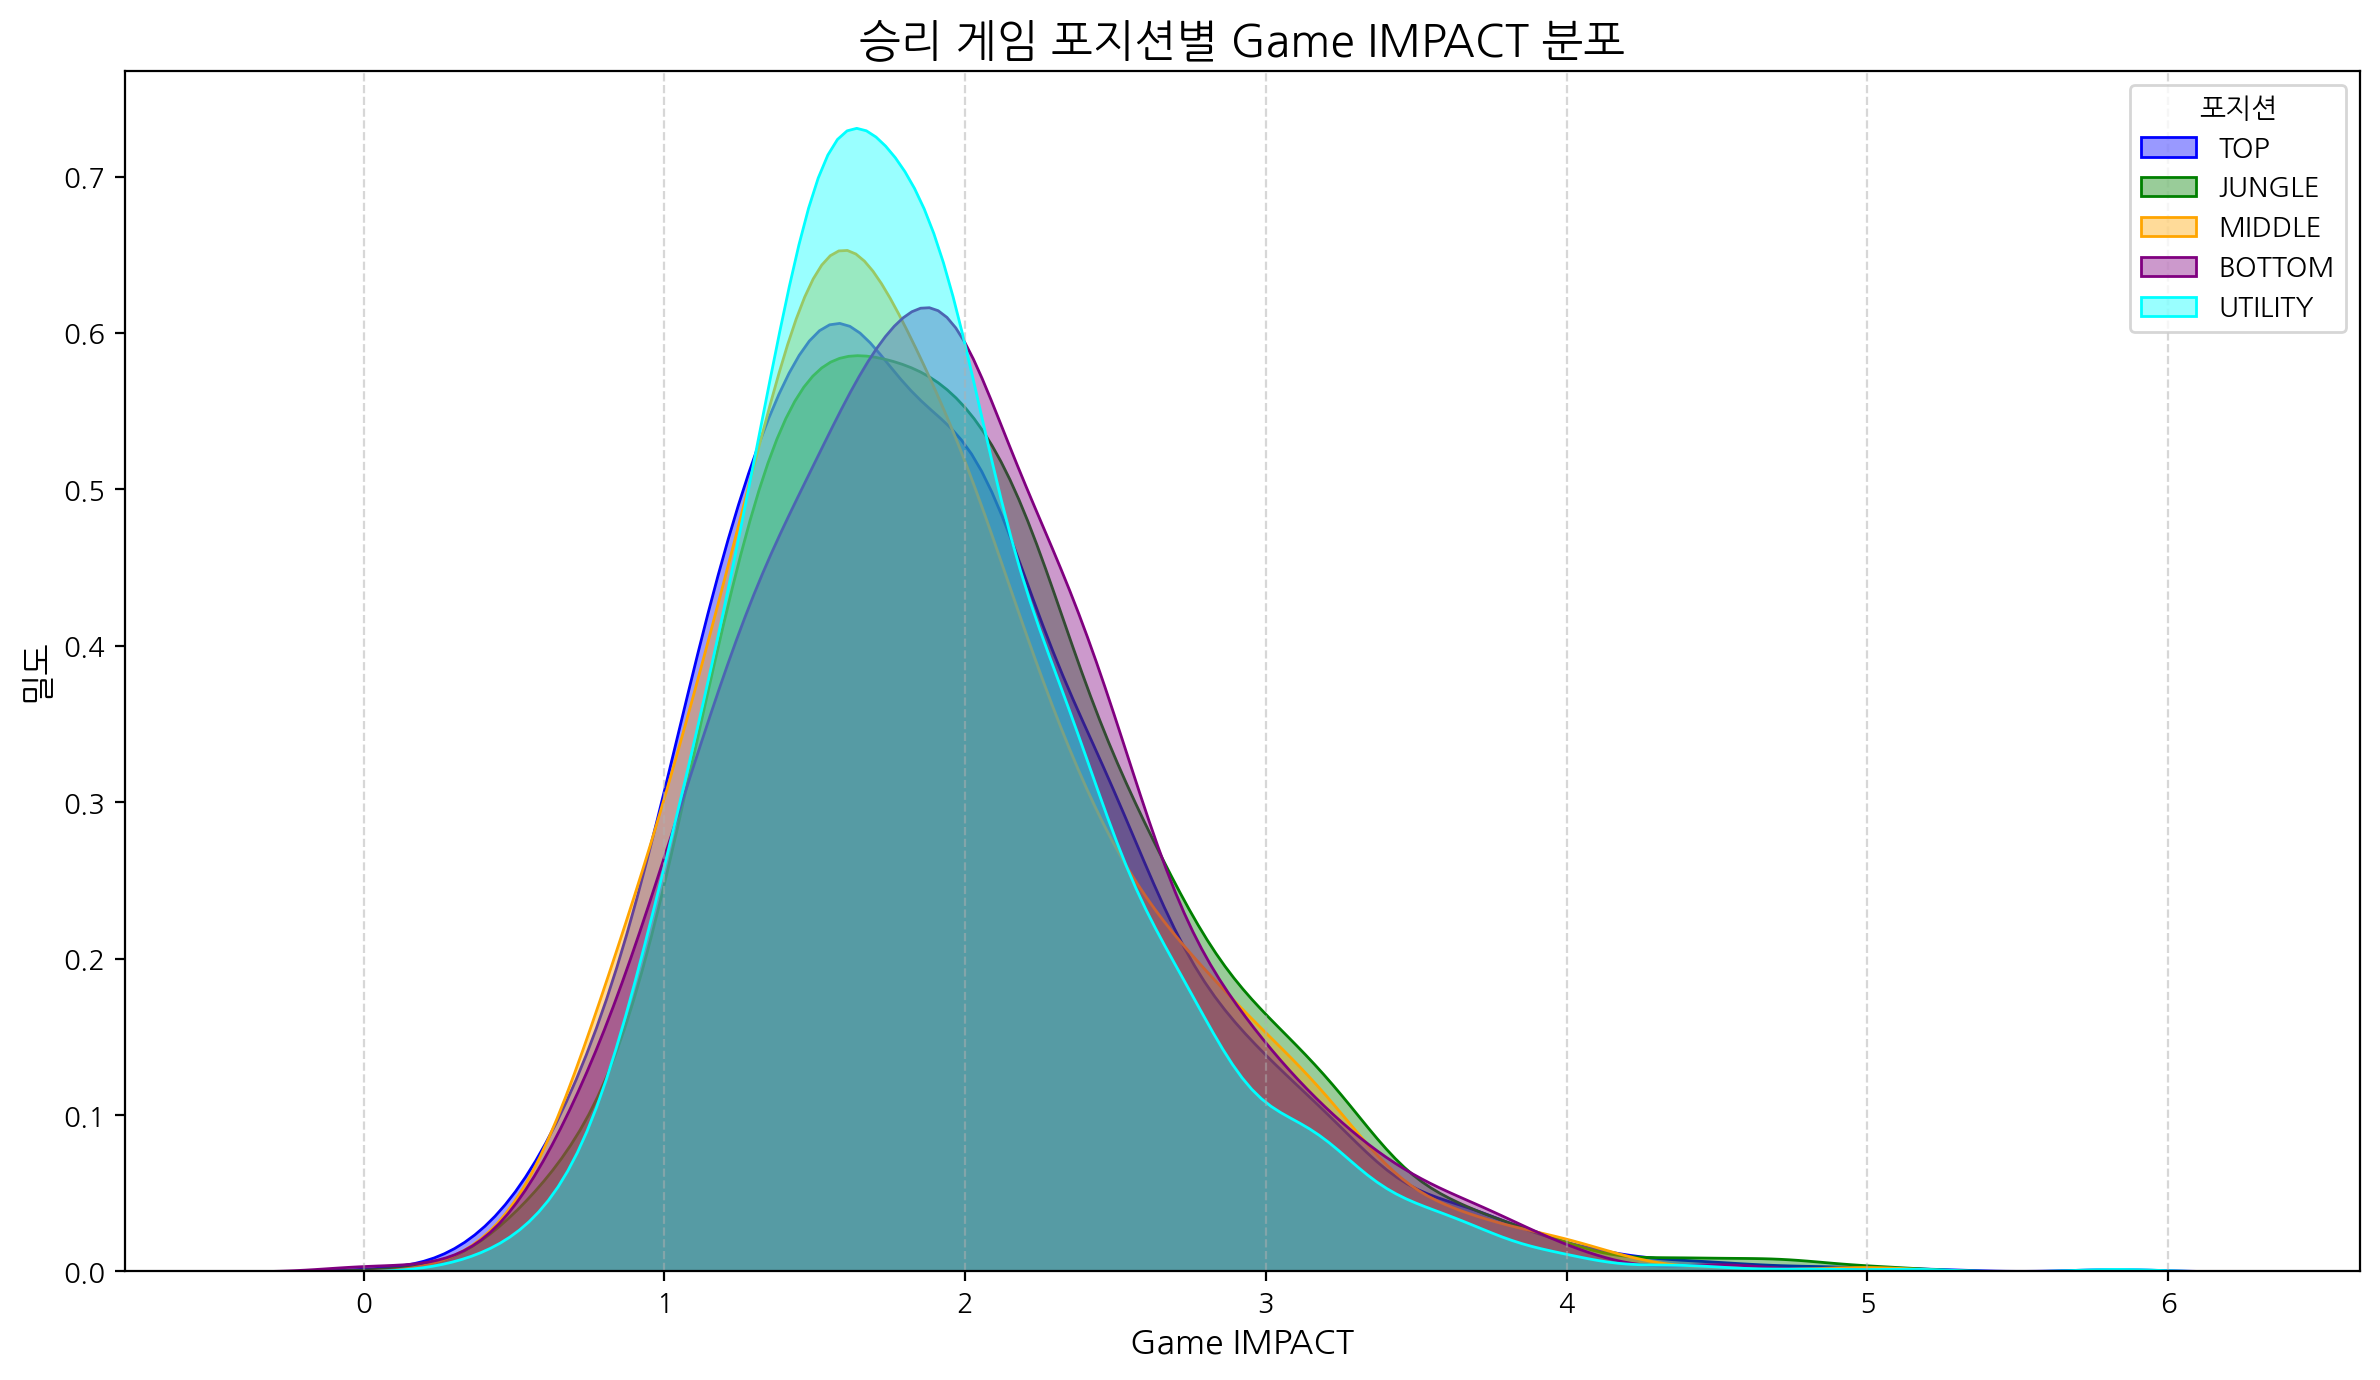

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib  # 한글 깨짐 방지

plt.figure(figsize=(12, 7))

# 승리한 게임 데이터
win_df = mmr_df_cleaned_default[mmr_df_cleaned_default['game_result'] == 1]

# 포지션별 색상
position_colors = {
    'TOP': 'blue',
    'JUNGLE': 'green',
    'MIDDLE': 'orange',
    'BOTTOM': 'purple',
    'UTILITY': 'cyan'
}

# 포지션별 KDE 그리기
for position, color in position_colors.items():
    pos_df = win_df[win_df['team_position'] == position]
    if len(pos_df) > 0:
        sns.kdeplot(
            data=pos_df,
            x='game_impact',
            fill=True,
            alpha=0.4,
            label=f"{position}",
            color=color
        )

plt.title("승리 게임 포지션별 Game IMPACT 분포", fontsize=16)
plt.xlabel("Game IMPACT", fontsize=12)
plt.ylabel("밀도", fontsize=12)
plt.legend(title="포지션")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [33]:
position_stats = mmr_df_cleaned_default.groupby('team_position')['game_impact'].agg(['mean', 'std']).reset_index()
print(position_stats)


  team_position      mean       std
0        BOTTOM  1.456286  0.716793
1        JUNGLE  1.459697  0.734237
2        MIDDLE  1.445989  0.687239
3           TOP  1.447548  0.696576
4       UTILITY  1.445027  0.643777


In [34]:
mmr_df_cleaned_default['game_impact_normalized'] = 0.0

for _, row in position_stats.iterrows():
    pos = row['team_position']
    mean = row['mean']
    std = row['std'] if row['std'] > 0 else 1  # 0 나누기 방지
    
    idx = mmr_df_cleaned_default['team_position'] == pos
    mmr_df_cleaned_default.loc[idx, 'game_impact_normalized'] = (
        (mmr_df_cleaned_default.loc[idx, 'game_impact'] - mean) / std
    )


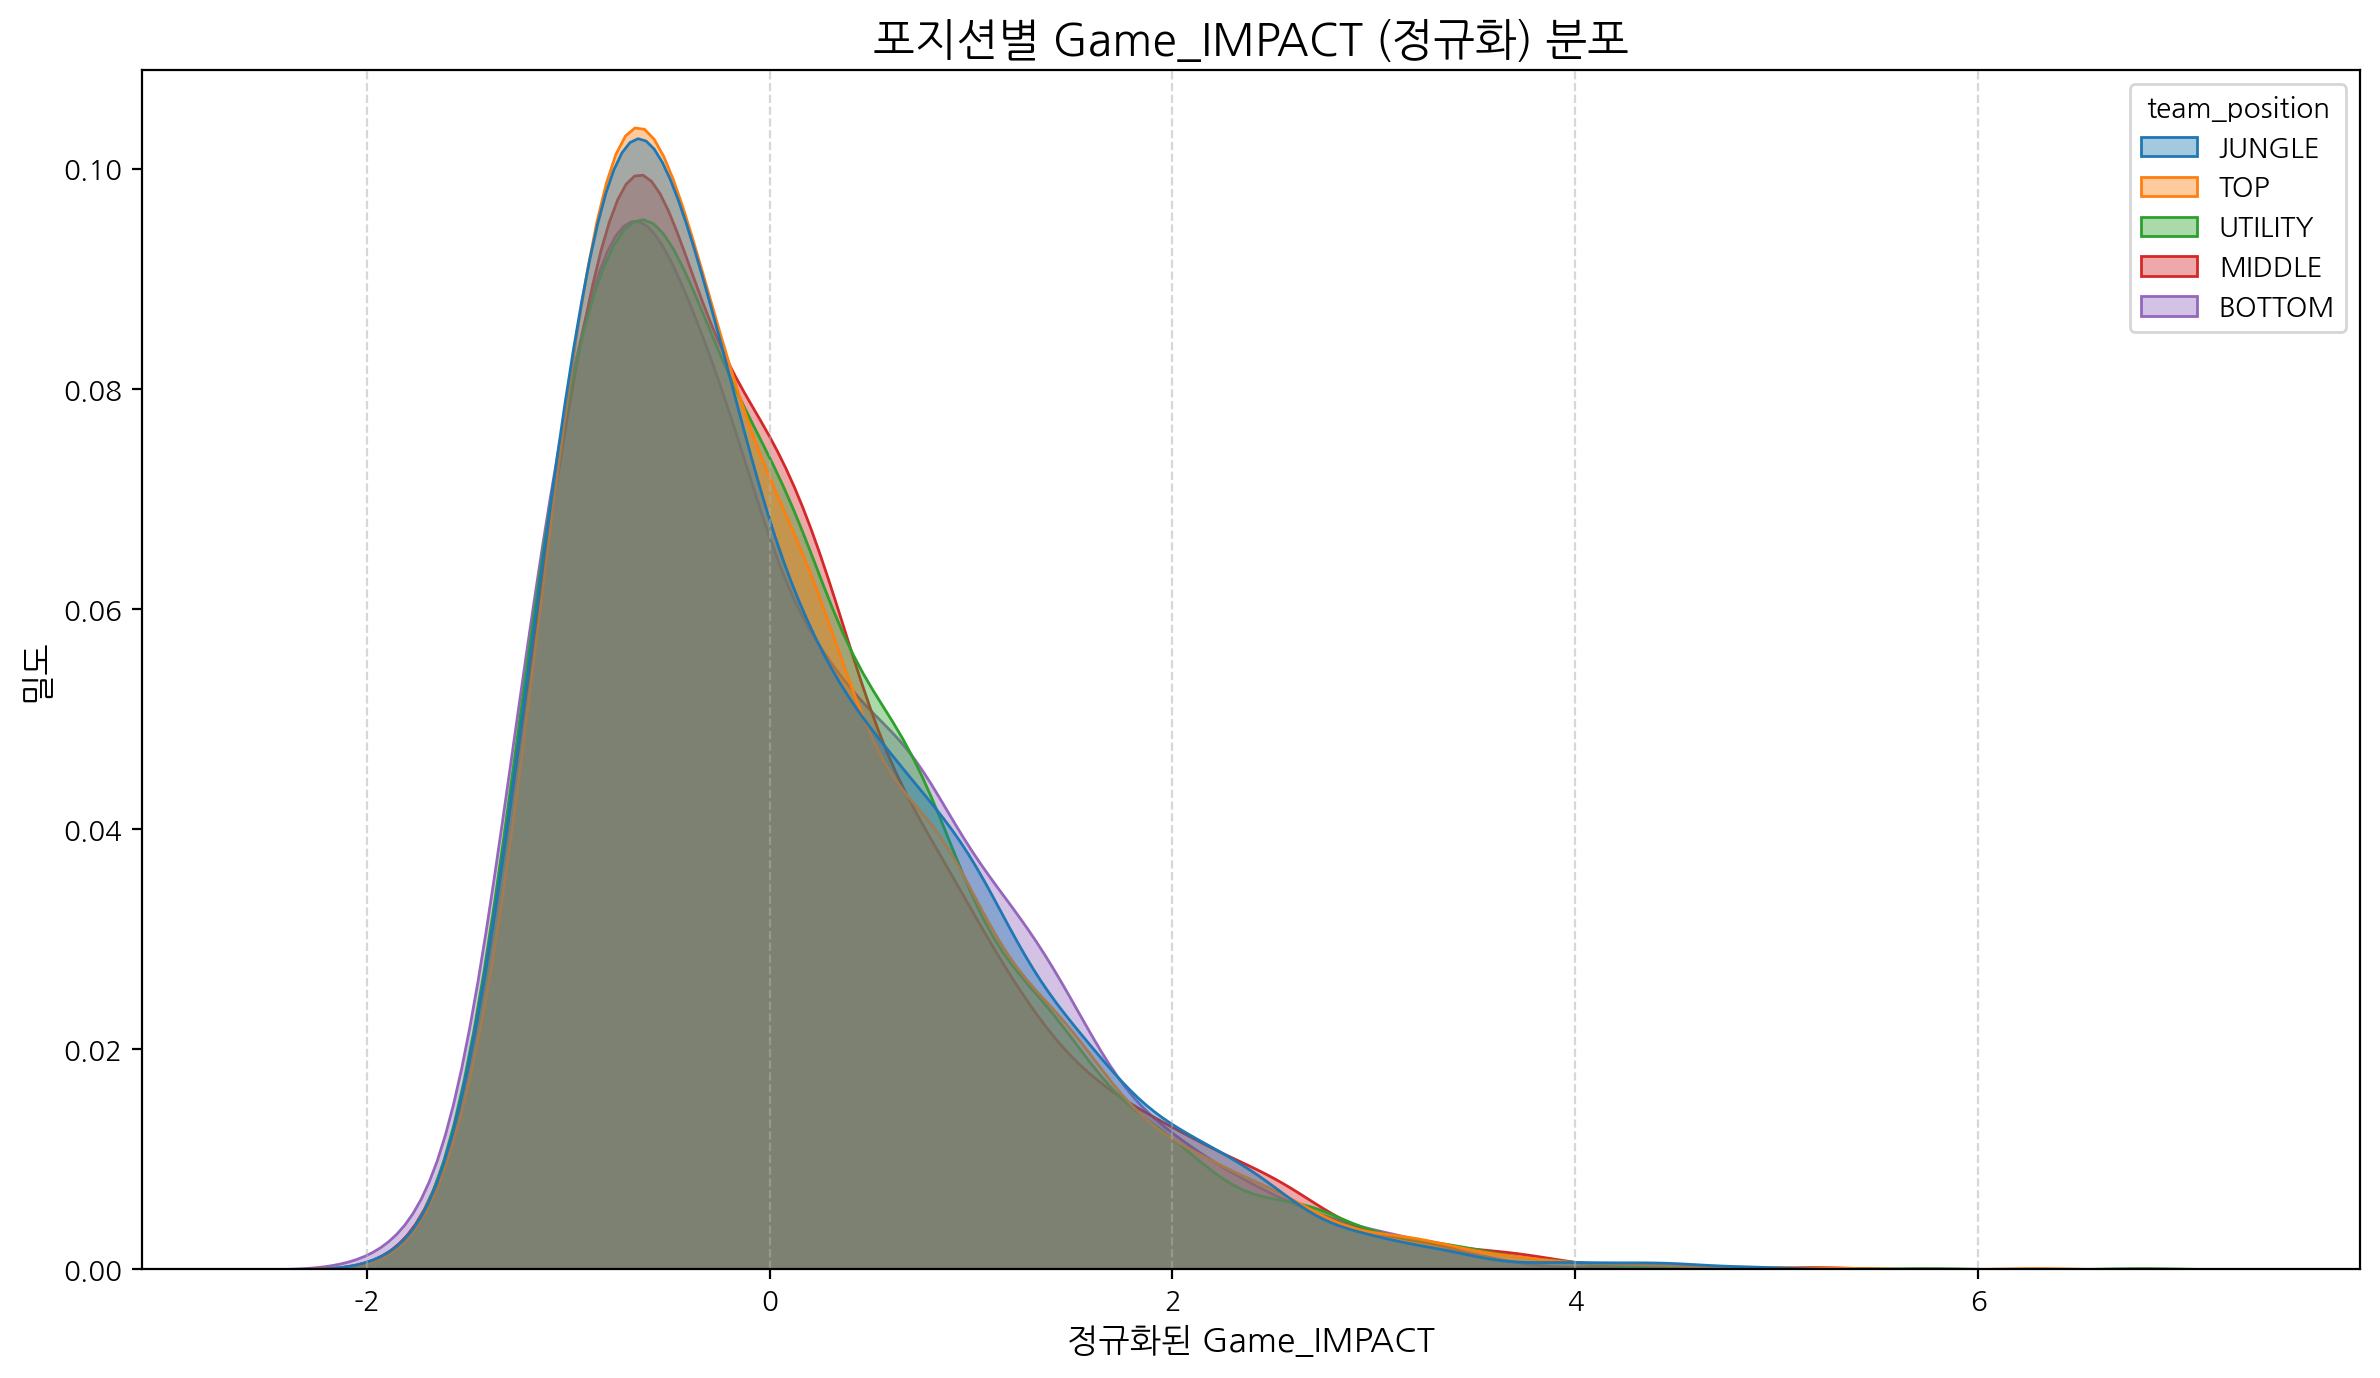

In [35]:
plt.figure(figsize=(12,7))
sns.kdeplot(data=mmr_df_cleaned_default, x='game_impact_normalized', hue='team_position', fill=True, alpha=0.4)
plt.title("포지션별 Game_IMPACT (정규화) 분포", fontsize=16)
plt.xlabel("정규화된 Game_IMPACT", fontsize=12)
plt.ylabel("밀도", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [36]:
# 게임별로 Game_IMPACT 합계 구하고 비율 조정
mmr_df_cleaned_default['game_impact_normalized'] = 0.0

for game_id, group in mmr_df_cleaned_default.groupby('game_id'):
    sum_gi = group['game_impact'].sum()
    
    if sum_gi == 0:
        # Game_IMPACT 합이 0인 경우는 그대로 0 유지
        mmr_df_cleaned_default.loc[group.index, 'game_impact_normalized'] = 0
    else:
        # 총합이 10이 되도록 스케일링
        scaling_factor = 10 / sum_gi
        mmr_df_cleaned_default.loc[group.index, 'game_impact_normalized'] = group['game_impact'] * scaling_factor


In [37]:
# Game_IMPACT를 게임별로 총합이 10이 되도록 정규화
def normalize_game_impact(df, game_id_col='game_id', gi_col='game_impact'):
    df = df.copy()
    df['game_impact_normalized'] = 0.0
    
    for game_id, group in df.groupby(game_id_col):
        sum_gi = group[gi_col].sum()
        
        if sum_gi == 0 or pd.isna(sum_gi): # 합계가 0이거나 NaN인 경우 처리
            df.loc[group.index, 'game_impact_normalized'] = 0.0
        else:
            scaling_factor = 10 / sum_gi
            # round(2) 함수 제거
            df.loc[group.index, 'game_impact_normalized'] = (group[gi_col] * scaling_factor).round(2)
    
    return df

# 적용
mmr_df_cleaned_default = normalize_game_impact(mmr_df_cleaned_default)

# 확인
print(mmr_df_cleaned_default[['game_id', 'player_id', 'game_impact', 'game_impact_normalized']].head(10))

# 게임별 합 검증
check = mmr_df_cleaned_default.groupby('game_id')['game_impact_normalized'].sum()
print("\n게임별 Game_IMPACT 정규화 합 (정확히 10이어야 함):")
print(check.describe()) # min, max, mean이 모두 10.0000...에 가까워질 것입니다.

         game_id player_id  game_impact  game_impact_normalized
0   1t_0530_0402    PLR_10     1.394496                    0.96
1   1t_0530_0402   PLR_203     0.879990                    0.60
2   1t_0530_0402    PLR_34     0.788416                    0.54
3   1t_0530_0402    PLR_50     0.612946                    0.42
4   1t_0530_0402   PLR_154     1.378169                    0.95
5   1t_0530_0402   PLR_225     2.154747                    1.48
6   1t_0530_0402    PLR_63     0.882722                    0.61
7   1t_0530_0402   PLR_319     1.001182                    0.69
9   1t_0530_0402    PLR_13     2.129432                    1.46
11  1t_0530_0402   PLR_372     3.325224                    2.29

게임별 Game_IMPACT 정규화 합 (정확히 10이어야 함):
count    1768.000000
mean        9.999966
std         0.009133
min         9.970000
25%         9.990000
50%        10.000000
75%        10.010000
max        10.030000
Name: game_impact_normalized, dtype: float64


In [38]:
print("## 한 game_id 내 동일한 player_id 존재 여부 확인 ##")

# game_id와 player_id를 기준으로 중복 확인
# 'duplicated()'는 첫 번째 중복을 제외하고 이후의 중복을 True로 표시합니다.
# keep=False로 설정하면 모든 중복된 항목을 True로 표시합니다.
duplicates_check = mmr_df_cleaned_default.duplicated(subset=['game_id', 'player_id'], keep=False)

# 중복된 game_id와 player_id 조합이 있는 행들만 필터링
duplicate_rows = mmr_df_cleaned_default[duplicates_check]

if not duplicate_rows.empty:
    # 중복된 game_id만 추출하여 고유한 game_id의 수를 확인
    games_with_duplicate_players = duplicate_rows['game_id'].unique()
    
    print(f"\n경고: 동일한 game_id 내에서 중복된 player_id를 가진 게임이 총 {len(games_with_duplicate_players)}개 발견되었습니다.")
    print("해당하는 game_id 및 중복된 player_id 목록 (일부):")
    
    # 각 중복된 game_id에 대해 상세 정보 출력 (최대 5개 게임만 예시로 출력)
    for game_id in games_with_duplicate_players[:5]:
        print(f"\nGame ID: {game_id}")
        # 해당 게임에서 중복된 player_id를 가진 모든 행 출력
        print(duplicate_rows[duplicate_rows['game_id'] == game_id][['player_id', 'team_position', 'game_impact_normalized']])
        print("-" * 30)
else:
    print("\n동일한 game_id 내에 중복된 player_id는 발견되지 않았습니다. 데이터가 깨끗합니다.")

## 한 game_id 내 동일한 player_id 존재 여부 확인 ##

동일한 game_id 내에 중복된 player_id는 발견되지 않았습니다. 데이터가 깨끗합니다.


## game_impact_relative 계산

---

In [95]:
# 새로운 컬럼 생성
mmr_df_cleaned_default['game_impact_relative'] = np.nan

# 그룹 기준: 같은 게임 + 같은 포지션
grouped = mmr_df_cleaned_default.groupby(['game_id', 'team_position'])

# 각 그룹에서 상대적 비율 계산
for (gid, pos), group in grouped:
    if len(group) == 2:
        total = group['game_impact'].sum()
        if total > 0:
            relative_scores = group['game_impact'] / total * 100
        else:
            # game_impact 합이 0이면 두 플레이어 모두 50으로 설정
            relative_scores = [50, 50]
        
        mmr_df_cleaned_default.loc[group.index, 'game_impact_relative'] = relative_scores


In [96]:
print(mmr_df_cleaned_default[['game_id', 'player_id', 'team_position', 'game_impact', 'game_impact_relative']].head(10))


         game_id player_id team_position  game_impact  game_impact_relative
0   1t_0530_0402    PLR_10        JUNGLE     1.394496             39.289953
1   1t_0530_0402   PLR_203           TOP     0.879990             20.926166
2   1t_0530_0402    PLR_34       UTILITY     0.788416             36.389801
3   1t_0530_0402    PLR_50        MIDDLE     0.612946             22.350901
4   1t_0530_0402   PLR_154       UTILITY     1.378169             63.610199
5   1t_0530_0402   PLR_225        JUNGLE     2.154747             60.710047
6   1t_0530_0402    PLR_63        BOTTOM     0.882722             46.855981
7   1t_0530_0402   PLR_319        BOTTOM     1.001182             53.144019
9   1t_0530_0402    PLR_13        MIDDLE     2.129432             77.649099
11  1t_0530_0402   PLR_372           TOP     3.325224             79.073834


In [ ]:
# 새로운 컬럼 초기화
mmr_df_cleaned_default['impact_vs_str'] = np.nan

NameError: name 'drop' is not defined

In [116]:
mmr_df_cleaned_default['impact_vs_str'] = np.nan # 새로운 컬럼 이름 제안

# 그룹핑
grouped = mmr_df_cleaned_default.groupby(['game_id', 'team_position'])

for (gid, pos), group in grouped:
    if len(group) == 2:
        # 각 플레이어의 원래 인덱스를 보존하면서 작업
        player_data = group[['player_id', 'game_impact']].copy()
        
        total = player_data['game_impact'].sum()
        
        # 비율 계산
        if total > 0:
            player_data['relative'] = (player_data['game_impact'] / total * 100).round(0).astype(int)
        else:
            player_data['relative'] = 50 # 총합 0이면 동률로
        
        # 그룹 내 두 플레이어의 데이터 추출
        # 원래 인덱스를 유지하면서 각 플레이어의 정보를 가져옵니다.
        idx0, idx1 = group.index[0], group.index[1]
        
        player0_id = player_data.loc[idx0, 'player_id']
        player0_impact = player_data.loc[idx0, 'game_impact']
        player0_relative = player_data.loc[idx0, 'relative']

        player1_id = player_data.loc[idx1, 'player_id']
        player1_impact = player_data.loc[idx1, 'game_impact']
        player1_relative = player_data.loc[idx1, 'relative']
        
        # 각 플레이어의 행에 맞는 문자열 생성
        # 플레이어 0의 행에 들어갈 문자열
        # (자신_ID vs 상대_ID: (자신_비율 : 상대_비율))
        impact_str_for_player0 = f"{player0_id} vs {player1_id}: ({player0_relative} : {player1_relative})"
        
        # 플레이어 1의 행에 들어갈 문자열
        # (자신_ID vs 상대_ID: (자신_비율 : 상대_비율))
        impact_str_for_player1 = f"{player1_id} vs {player0_id}: ({player1_relative} : {player0_relative})"
        
        # 데이터프레임에 반영
        mmr_df_cleaned_default.loc[idx0, 'impact_vs_str'] = impact_str_for_player0
        mmr_df_cleaned_default.loc[idx1, 'impact_vs_str'] = impact_str_for_player1

# 결과 확인 (새로운 컬럼 이름 사용)
print(mmr_df_cleaned_default[['game_id', 'player_id', 'team_position', 'game_impact', 'impact_vs_str']].head(10))



         game_id player_id team_position  game_impact  \
0   1t_0530_0402    PLR_10        JUNGLE     1.394496   
1   1t_0530_0402   PLR_203           TOP     0.879990   
2   1t_0530_0402    PLR_34       UTILITY     0.788416   
3   1t_0530_0402    PLR_50        MIDDLE     0.612946   
4   1t_0530_0402   PLR_154       UTILITY     1.378169   
5   1t_0530_0402   PLR_225        JUNGLE     2.154747   
6   1t_0530_0402    PLR_63        BOTTOM     0.882722   
7   1t_0530_0402   PLR_319        BOTTOM     1.001182   
9   1t_0530_0402    PLR_13        MIDDLE     2.129432   
11  1t_0530_0402   PLR_372           TOP     3.325224   

                    impact_vs_str  
0    PLR_10 vs PLR_225: (39 : 61)  
1   PLR_203 vs PLR_372: (21 : 79)  
2    PLR_34 vs PLR_154: (36 : 64)  
3     PLR_50 vs PLR_13: (22 : 78)  
4    PLR_154 vs PLR_34: (64 : 36)  
5    PLR_225 vs PLR_10: (61 : 39)  
6    PLR_63 vs PLR_319: (47 : 53)  
7    PLR_319 vs PLR_63: (53 : 47)  
9     PLR_13 vs PLR_50: (78 : 22)  
11  PLR_372 

In [117]:
import numpy as np
import pandas as pd
import re


# 'mmr_change' 컬럼 초기화
mmr_df_cleaned_default['mmr_change'] = 0

# game_impact_normalized 컬럼의 최소값과 최대값 계산
min_gi = mmr_df_cleaned_default['game_impact_normalized'].min()
max_gi = mmr_df_cleaned_default['game_impact_normalized'].max()

# min_gi와 max_gi가 동일한 경우 예외 처리
if min_gi == max_gi:
    print("경고: 'game_impact_normalized' 열의 모든 값이 동일합니다. MMR 변화량 스케일링이 제대로 작동하지 않을 수 있습니다.")
    min_gi_for_interp = 0
    max_gi_for_interp = 1 # 임의의 범위 설정하여 0이 아닌 값을 반환하도록 유도 (또는 0으로 고정)
else:
    min_gi_for_interp = min_gi
    max_gi_for_interp = max_gi


# MMR 변동값 스케일 함수 정의 (여기서 범위 조정)
def scale_mmr_change(gi_value, is_winner):
    if min_gi_for_interp == max_gi_for_interp:
        return 0

    if is_winner:
        # 승자의 변동 범위 조정: [-5, 40]
        # 평균적인 영향력의 승리자가 양수 MMR을 얻도록 상향 조정
        return np.interp(gi_value, [min_gi_for_interp, max_gi_for_interp], [0, 25])
    else:
        # 패자의 변동 범위 조정: [-25, 20]
        # 평균적인 영향력의 패자가 잃는 MMR 폭을 줄임
        return np.interp(gi_value, [min_gi_for_interp, max_gi_for_interp], [-25, 0])


# 게임 ID와 포지션별로 그룹화
grouped = mmr_df_cleaned_default.groupby(['game_id', 'team_position'])

# 각 그룹에 대해 MMR 변화량 계산
for (game_id, position), group in grouped:
    if len(group) != 2:
        continue

    idx1, idx2 = group.index.tolist()
    row1, row2 = group.loc[idx1], group.loc[idx2]

    win1 = row1['game_result'] == 1
    win2 = row2['game_result'] == 1

    val1, val2 = 0, 0
    try:
        impact_str = str(row1['impact_vs_str'])
        match = re.search(r'\(?\s*(\d+)\s*[:\s]*(\d+)\s*\)?', impact_str)
        if match:
            val1 = int(match.group(1))
            val2 = int(match.group(2))
        else:
            continue
    except (AttributeError, ValueError, TypeError):
        continue

    total_impact_vs = val1 + val2
    if total_impact_vs == 0:
        continue

    ratio1 = val1 / total_impact_vs
    ratio2 = val2 / total_impact_vs

    gi1 = row1['game_impact_normalized']
    gi2 = row2['game_impact_normalized']

    mmr_change_1_raw = scale_mmr_change(gi1, win1) * ratio1
    mmr_change_2_raw = scale_mmr_change(gi2, win2) * ratio2

    mmr_change_1 = int(round(mmr_change_1_raw))
    mmr_change_2 = int(round(mmr_change_2_raw))

    mmr_df_cleaned_default.loc[idx1, 'mmr_change'] = mmr_change_1
    mmr_df_cleaned_default.loc[idx2, 'mmr_change'] = mmr_change_2

# 최종 결과 확인
print("--- MMR Change 계산 결과 (상위 10개 행) ---")
print(mmr_df_cleaned_default[['game_id', 'player_id', 'team_position', 'game_result', 'game_impact_normalized', 'impact_vs_str', 'mmr_change']].head(10))

print("\n--- mmr_change 열 기술 통계 ---")
print(mmr_df_cleaned_default['mmr_change'].describe())

print("\n--- mmr_change 값이 0이 아닌 행의 개수 ---")
non_zero_count = (mmr_df_cleaned_default['mmr_change'] != 0).sum()
print(f"0이 아닌 MMR 변화량 값의 행 개수: {non_zero_count} / {len(mmr_df_cleaned_default)}")

print("\n--- mmr_change 값이 양수인 행의 개수 ---")
positive_count = (mmr_df_cleaned_default['mmr_change'] > 0).sum()
print(f"양수인 MMR 변화량 값의 행 개수: {positive_count} / {len(mmr_df_cleaned_default)}")

print("\n--- mmr_change 값이 음수인 행의 개수 ---")
negative_count = (mmr_df_cleaned_default['mmr_change'] < 0).sum()
print(f"음수인 MMR 변화량 값의 행 개수: {negative_count} / {len(mmr_df_cleaned_default)}")

--- MMR Change 계산 결과 (상위 10개 행) ---
         game_id player_id team_position  game_result  game_impact_normalized  \
0   1t_0530_0402    PLR_10        JUNGLE            0                    0.96   
1   1t_0530_0402   PLR_203           TOP            0                    0.60   
2   1t_0530_0402    PLR_34       UTILITY            0                    0.54   
3   1t_0530_0402    PLR_50        MIDDLE            0                    0.42   
4   1t_0530_0402   PLR_154       UTILITY            1                    0.95   
5   1t_0530_0402   PLR_225        JUNGLE            1                    1.48   
6   1t_0530_0402    PLR_63        BOTTOM            1                    0.61   
7   1t_0530_0402   PLR_319        BOTTOM            0                    0.69   
9   1t_0530_0402    PLR_13        MIDDLE            1                    1.46   
11  1t_0530_0402   PLR_372           TOP            1                    2.29   

                    impact_vs_str  mmr_change  
0    PLR_10 vs PLR_225: 

- mmr_change 컬럼 초기화: mmr_df_cleaned_default 데이터프레임에 mmr_change라는 새로운 컬럼을 생성하고 모든 값을 0으로 초기화합니다. 이는 MMR 변동량이 계산되지 않은 플레이어의 기본값이 0이 되도록 합니다.
- game_impact_normalized 범위 계산: game_impact_normalized 컬럼의 전체 데이터셋에 대한 최소값(min_gi)과 최대값(max_gi)을 계산합니다. 이 값들은 MMR 변동량을 스케일링하는 기준 범위로 사용됩니다.
- 동일 값 예외 처리: 만약 game_impact_normalized 컬럼의 모든 값이 동일하다면(min_gi == max_gi), np.interp 함수가 제대로 작동하지 않거나 의미 없는 결과를 반환할 수 있으므로, 이에 대한 경고 메시지를 출력하고 스케일링을 위한 임의의 유효 범위(0에서 1)를 설정합니다.

- 함수 목적: 이 함수는 플레이어의 game_impact_normalized 값과 승패 여부를 입력받아, 기본 MMR 변동량을 스케일링하여 반환합니다.
- np.interp 사용: np.interp(x, xp, fp) 함수는 xp 범위 내의 x 값을 fp 범위 내의 값으로 선형 보간하여 스케일링합니다.
    - x: 플레이어의 gi_value (game_impact_normalized).
    - xp: [min_gi_for_interp, max_gi_for_interp] (GI 값의 실제 범위).
    - fp: 목표 MMR 변동량 범위.
- 승자의 변동 범위 [0, 25]:
    - 플레이어가 승리했을 경우, game_impact_normalized 값이 최소(min_gi)이면 0점을, 최대(max_gi)이면 25점을 얻도록 스케일링됩니다.
    - 의미: 승리한 플레이어는 최소한 MMR을 잃지 않으며(0점 이상), 영향력이 높을수록 더 많은 MMR을 얻습니다.
- 패자의 변동 범위 [-25, 0]:
    - 플레이어가 패배했을 경우, game_impact_normalized 값이 최소(min_gi)이면 -25점을, 최대(max_gi)이면 0점을 잃도록 스케일링됩니다.
    - 의미: 패배한 플레이어는 MMR을 얻지 않으며(0점 이하), 영향력이 낮을수록 더 많은 MMR을 잃고, 영향력이 높을수록 잃는 MMR이 줄어들어 0점에 가까워집니다.

- 그룹화: mmr_df_cleaned_default를 game_id와 team_position으로 그룹화합니다. 이는 같은 게임에서 동일한 포지션에서 맞붙은 두 플레이어(예: 같은 게임의 탑 라이너 두 명)를 묶기 위함입니다.
- 2명 매칭 확인: if len(group) != 2: 조건문을 통해 그룹 내 플레이어가 정확히 2명일 경우에만 MMR 변동 계산을 수행합니다. 그렇지 않은 그룹은 건너뜁니다.
- 데이터 추출: 각 그룹에서 두 플레이어의 데이터(row1, row2), 승패 여부(win1, win2) 등을 추출합니다.
- impact_vs_str 파싱:
    - impact_vs_str 컬럼의 문자열(예: PLR_10 vs PLR_225: (39 : 61))에서 괄호 안의 두 숫자(val1, val2)를 정규표현식(re.search)을 사용하여 추출합니다.
    - try-except 블록을 사용하여 파싱 오류 발생 시 해당 그룹을 건너뛰어 코드의 안정성을 높입니다.
    - total_impact_vs가 0인 경우(두 기여도 값이 모두 0일 때) ZeroDivisionError를 방지하기 위해 건너뜁니다.
    - ratio1, ratio2는 val1과 val2를 합계(total_impact_vs)로 나눈 값으로, 각 플레이어의 상대적 기여도 비율을 나타냅니다.
- 최종 MMR 변화량 계산:
    - mmr_change_1_raw 및 mmr_change_2_raw는 scale_mmr_change 함수에서 얻은 기본 변동량에 ratio1 또는 ratio2를 곱하여 계산됩니다. 이 단계에서 개인의 영향력과 상대적 기여도가 모두 반영됩니다.
    - int(round(...)): 계산된 소수점 형태의 MMR 변화량(_raw)을 가장 가까운 정수로 반올림(round())한 후, 정수형(int())으로 변환합니다. 이는 "변동값은 정수로 고정한다"는 요구사항을 충족합니다.
    - 데이터프레임 업데이트: 계산된 최종 정수형 mmr_change 값을 해당 플레이어의 데이터프레임 행에 반영합니다.

In [119]:
# MMR 변동 계산 로직 (이전 코드에서 수정된 부분만 집중)

# ... (min_gi, max_gi, scale_mmr_change 함수 정의는 동일) ...

grouped = mmr_df_cleaned_default.groupby(['game_id', 'team_position'])

for (game_id, position), group in grouped:
    if len(group) != 2:
        continue

    # 디버깅을 위해 특정 게임과 포지션만 출력
    if game_id == '1t_0530_0402' and position == 'JUNGLE':
        print(f"\n--- 디버깅: Game ID: {game_id}, Position: {position} ---")
        print(group[['player_id', 'game_result', 'game_impact_normalized', 'impact_vs_str']])

    idx1, idx2 = group.index.tolist()
    row1, row2 = group.loc[idx1], group.loc[idx2]

    win1 = row1['game_result'] == 1
    win2 = row2['game_result'] == 1

    val1, val2 = 0, 0
    try:
        impact_str = str(row1['impact_vs_str'])
        match = re.search(r'\(?\s*(\d+)\s*[:\s]*(\d+)\s*\)?', impact_str)
        if match:
            val1 = int(match.group(1))
            val2 = int(match.group(2))
        else:
            if game_id == '1t_0530_0402' and position == 'JUNGLE':
                print(f"  파싱 실패로 건너뜀: {impact_str}")
            continue
    except (AttributeError, ValueError, TypeError) as e:
        if game_id == '1t_0530_0402' and position == 'JUNGLE':
                print(f"  파싱 오류 ({e})로 건너뜀: {impact_str}")
        continue

    total_impact_vs = val1 + val2
    if total_impact_vs == 0:
        if game_id == '1t_0530_0402' and position == 'JUNGLE':
                print(f"  total_impact_vs가 0이라 건너뜀: val1={val1}, val2={val2}")
        continue

    ratio1 = val1 / total_impact_vs
    ratio2 = val2 / total_impact_vs

    gi1 = row1['game_impact_normalized']
    gi2 = row2['game_impact_normalized']

    # 디버깅 출력: 각 플레이어의 스케일링 전/후 값 및 비율
    if game_id == '1t_0530_0402' and position == 'JUNGLE':
        print(f"\n  Player 1 (ID: {row1['player_id']}):")
        print(f"    GI: {gi1}, Win: {win1}")
        scaled_val1 = scale_mmr_change(gi1, win1)
        print(f"    Scaled Val (before ratio): {scaled_val1}")
        print(f"    Ratio: {ratio1}")
        mmr_change_1_raw = scaled_val1 * ratio1
        print(f"    Raw MMR Change: {mmr_change_1_raw}")
        print(f"    Rounded MMR Change: {int(round(mmr_change_1_raw))}")

        print(f"\n  Player 2 (ID: {row2['player_id']}):")
        print(f"    GI: {gi2}, Win: {win2}")
        scaled_val2 = scale_mmr_change(gi2, win2)
        print(f"    Scaled Val (before ratio): {scaled_val2}")
        print(f"    Ratio: {ratio2}")
        mmr_change_2_raw = scaled_val2 * ratio2
        print(f"    Raw MMR Change: {mmr_change_2_raw}")
        print(f"    Rounded MMR Change: {int(round(mmr_change_2_raw))}")

    mmr_change_1 = int(round(mmr_change_1_raw))
    mmr_change_2 = int(round(mmr_change_2_raw))

    mmr_df_cleaned_default.loc[idx1, 'mmr_change'] = mmr_change_1
    mmr_df_cleaned_default.loc[idx2, 'mmr_change'] = mmr_change_2


--- 디버깅: Game ID: 1t_0530_0402, Position: JUNGLE ---
  player_id  game_result  game_impact_normalized                 impact_vs_str
0    PLR_10            0                    0.96  PLR_10 vs PLR_225: (39 : 61)
5   PLR_225            1                    1.48  PLR_225 vs PLR_10: (61 : 39)

  Player 1 (ID: PLR_10):
    GI: 0.96, Win: False
    Scaled Val (before ratio): -18.424657534246577
    Ratio: 1.0
    Raw MMR Change: -18.424657534246577
    Rounded MMR Change: -18

  Player 2 (ID: PLR_225):
    GI: 1.48, Win: True
    Scaled Val (before ratio): 10.136986301369863
    Ratio: 0.0
    Raw MMR Change: 0.0
    Rounded MMR Change: 0


- MMR 변동 로직의 모든 계산 단계를 특정 데이터(1t_0530_0402 게임의 JUNGLE 포지션)에 대해 상세히 출력하여, 어떤 단계에서 예상과 다른 값이 나오는지, 특히 mmr_change가 0으로 나오는 원인(Ratio가 0이 되는 문제 등)을 파악하기 위해 설계된 디버깅.

In [120]:
import numpy as np
import pandas as pd
import re

# mmr_df_cleaned_default 데이터프레임이 이미 준비되어 있다고 가정합니다.

# 1. 'mmr_change' 컬럼 초기화
mmr_df_cleaned_default['mmr_change'] = 0

# 2. game_impact_normalized 컬럼의 최소값과 최대값 계산
min_gi = mmr_df_cleaned_default['game_impact_normalized'].min()
max_gi = mmr_df_cleaned_default['game_impact_normalized'].max()

# min_gi와 max_gi가 동일한 경우 예외 처리
if min_gi == max_gi:
    print("경고: 'game_impact_normalized' 열의 모든 값이 동일합니다. MMR 변화량 스케일링이 제대로 작동하지 않을 수 있습니다.")
    min_gi_for_interp = 0
    max_gi_for_interp = 1
else:
    min_gi_for_interp = min_gi
    max_gi_for_interp = max_gi

# MMR 변동값 스케일 함수 정의 (이전 답변에서 양수/음수 비율 조정을 위해 변경된 범위 유지)
def scale_mmr_change(gi_value, is_winner):
    if min_gi_for_interp == max_gi_for_interp:
        return 0

    if is_winner:
        # 승자의 변동 범위: [-5, 40]
        return np.interp(gi_value, [min_gi_for_interp, max_gi_for_interp], [-5, 40])
    else:
        # 패자의 변동 범위: [-25, 20]
        return np.interp(gi_value, [min_gi_for_interp, max_gi_for_interp], [-25, 20])


# 게임 ID와 포지션별로 그룹화
grouped = mmr_df_cleaned_default.groupby(['game_id', 'team_position'])

# 각 그룹에 대해 MMR 변화량 계산
for (game_id, position), group in grouped:
    if len(group) != 2: # 2명의 플레이어만 있는 그룹 처리
        continue

    idx1, idx2 = group.index.tolist()
    row1, row2 = group.loc[idx1], group.loc[idx2]

    win1 = row1['game_result'] == 1
    win2 = row2['game_result'] == 1

    # === 핵심 변경 부분: impact_vs_str 파싱 대신 game_impact_relative 직접 사용 ===
    # game_impact_relative는 0~100 사이의 백분율 값이라고 가정합니다.
    # 따라서 비율로 사용하려면 100으로 나눠야 합니다.
    ratio1 = row1['game_impact_relative'] / 100.0
    ratio2 = row2['game_impact_relative'] / 100.0

    # game_impact_relative 값이 유효한지 확인 (NaN이거나 합이 0인 경우)
    if pd.isna(ratio1) or pd.isna(ratio2) or (ratio1 + ratio2 == 0):
        # print(f"경고: game_impact_relative 값 문제 발생 (Game ID: {game_id}, Position: {position}). 건너뜁니다.")
        continue # 비율이 유효하지 않으면 건너뛰기
    # =======================================================================

    gi1 = row1['game_impact_normalized']
    gi2 = row2['game_impact_normalized']

    mmr_change_1_raw = scale_mmr_change(gi1, win1) * ratio1
    mmr_change_2_raw = scale_mmr_change(gi2, win2) * ratio2

    mmr_change_1 = int(round(mmr_change_1_raw))
    mmr_change_2 = int(round(mmr_change_2_raw))

    mmr_df_cleaned_default.loc[idx1, 'mmr_change'] = mmr_change_1
    mmr_df_cleaned_default.loc[idx2, 'mmr_change'] = mmr_change_2

# 최종 결과 확인 (이전과 동일한 출력 방식)
print("--- MMR Change 계산 결과 (상위 10개 행) ---")
print(mmr_df_cleaned_default[['game_id', 'player_id', 'team_position', 'game_result', 'game_impact_normalized', 'game_impact_relative', 'mmr_change']].head(10))

print("\n--- mmr_change 열 기술 통계 ---")
print(mmr_df_cleaned_default['mmr_change'].describe())

print("\n--- mmr_change 값이 0이 아닌 행의 개수 ---")
non_zero_count = (mmr_df_cleaned_default['mmr_change'] != 0).sum()
print(f"0이 아닌 MMR 변화량 값의 행 개수: {non_zero_count} / {len(mmr_df_cleaned_default)}")

print("\n--- mmr_change 값이 양수인 행의 개수 ---")
positive_count = (mmr_df_cleaned_default['mmr_change'] > 0).sum()
print(f"양수인 MMR 변화량 값의 행 개수: {positive_count} / {len(mmr_df_cleaned_default)}")

print("\n--- mmr_change 값이 음수인 행의 개수 ---")
negative_count = (mmr_df_cleaned_default['mmr_change'] < 0).sum()
print(f"음수인 MMR 변화량 값의 행 개수: {negative_count} / {len(mmr_df_cleaned_default)}")

--- MMR Change 계산 결과 (상위 10개 행) ---
         game_id player_id team_position  game_result  game_impact_normalized  \
0   1t_0530_0402    PLR_10        JUNGLE            0                    0.96   
1   1t_0530_0402   PLR_203           TOP            0                    0.60   
2   1t_0530_0402    PLR_34       UTILITY            0                    0.54   
3   1t_0530_0402    PLR_50        MIDDLE            0                    0.42   
4   1t_0530_0402   PLR_154       UTILITY            1                    0.95   
5   1t_0530_0402   PLR_225        JUNGLE            1                    1.48   
6   1t_0530_0402    PLR_63        BOTTOM            1                    0.61   
7   1t_0530_0402   PLR_319        BOTTOM            0                    0.69   
9   1t_0530_0402    PLR_13        MIDDLE            1                    1.46   
11  1t_0530_0402   PLR_372           TOP            1                    2.29   

    game_impact_relative  mmr_change  
0              39.289953         